# Reputation Era
### How does the reputation of artists changes in time?

This notebook contains the data mining and data analysis of the project Reputation Era, developed by Erica Andreose, Giorgia Crosilla and Daniele Spedicati in the context of the exam of Information Visualization. 

The project aims to explore the oscillations in reputation that different artists face during time through data. 

The concept of reputation is difficult to define and many definition could be given. First of all, we have considered differentiating the concepts of reputation and popularity where the former is more connected to the academic world and perception, while the latter is influenced by the consideration and fame among general people. 

To conduct a comprehensive analysis centered around the key concept of "reputation," various variables have been considered to develop a quantitative method for its measurement. The starting point considered is the paper <a href="https://www.science.org/doi/full/10.1126/science.aau7224">“Quantifying reputation and success in art”</a> which states “Recognition depends on variables like its attribution, the artist’s body of work, the display venue, and the work’s relationship to art history as a whole [...] are shaped by a network of experts, curators, collectors, and art historians whose judgments act as gatekeepers for museums, galleries, and auction houses” .
Moreover it highlights that the quantitative analysis of the reputation of an artist is negatively influenced by the “fragmented and secretive nature” of transaction records leading to a difficulty to complete quantitative analysis is difficult and, as in this project, limited to an analysis of a limited span of time. 

By considering all of this, we have determined the concept of reputation as constituted of these following variables:
- Auction houses sellings;
- Bibliography;
- Number of exhibitions.



# Reputation Era
### How does the reputation of artists changes in time?

This notebook contains the data mining and data analysis of the project Reputation Era, developed by Erica Andreose, Giorgia Crosilla and Daniele Spedicati in the context of the exam of Information Visualization. 

The project aims to explore the oscillations in reputation that different artists face during time through data. 

The concept of reputation is difficult to define and many definition could be given. First of all, we have considered differentiating the concepts of reputation and popularity where the former is more connected to the academic world and perception, while the latter is influenced by the consideration and fame among general people. 

To conduct a comprehensive analysis centered around the key concept of "reputation," various variables have been considered to develop a quantitative method for its measurement. The starting point considered is the paper <a href="https://www.science.org/doi/full/10.1126/science.aau7224">“Quantifying reputation and success in art”</a> which states “Recognition depends on variables like its attribution, the artist’s body of work, the display venue, and the work’s relationship to art history as a whole [...] are shaped by a network of experts, curators, collectors, and art historians whose judgments act as gatekeepers for museums, galleries, and auction houses” .
Moreover it highlights that the quantitative analysis of the reputation of an artist is negatively influenced by the “fragmented and secretive nature” of transaction records leading to a difficulty to complete quantitative analysis is difficult and, as in this project, limited to an analysis of a limited span of time. 

By considering all of this, we have determined the concept of reputation as constituted of these following variables:
- Auction houses sellings;
- Bibliography;
- Number of exhibitions.



## The Datasets
Even though these variables have been chosen for our analyses, they cannot be considered as complete sources of information for the following reasons:
- Auction houses sellings is a dataset taken from <a href="https://raw.githubusercontent.com/jasonshi10/art_auction_valuation/master/data.txt">repository</a> which has taken data webscraping the old website of <a href="https://web.archive.org/web/20141018210450/http://artsalesindex.artinfo.com/asi/search/artistLanding.ai">Blouin Art Sales index</a>. During 2014 that website made available a lot of auction data for free, now data is available only under subscription as other websites like Artsy. It cannot be considered as a complete dataset because it does not represent all artists and it limits data at a time span between 1990s and 2014. Moreover, it takes into consideration a limited number of auction houses. Unfortunately this dataset does not assign a unique identifier per single artwork sold, so we do not know if similar titles are actually referring to a single artwork or not, the same to be said in the case of titled “Unknown” artworks. 
- Bibliography has been extrapolated from data.bnf and Google Books API merging the two outputs and removing duplicates. The choice of using these sources is dependent on the available and functioning sparql endpoints and it has been influenced by the non-free availability of Worldcat API. 
- Since no dataset has been created with the purpose of collecting information on exhibitions during the years, we chose to extract partial information from exhibition catalogues. 


## Our Case studies - De Kooning and Klimt
For the development of our project we have considered two different case studies:
- The painter <b>Willem de Kooning</b> has been considered as "ground truth" because the <a href="https://www.dekooning.org/">website</a> of the Foundation dedicated to him reports all one-man exhibitions and monographs written on the artist. We consider this as an attempt to gather complete data on the artist and we used them to make a comparison between these data and the ones extrapolated from previously mentioned sources. 
- <b>Gustav Klimt</b> as a case study, where we used all the different sources to make our assumptions.


# Working with data

In [ ]:
#uncomment if you're using colab to install the following libraries
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install torch
# !pip install spacy
# pip install beautifulsoup4
# python -m spacy download en_core_web_sm

In [ ]:
# import all useful libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 1. Auctions dataset



In [ ]:
# import the auctions dataset as a Pandas DataFrame
pd.set_option('display.max_columns', None)
auctions = pd.read_csv("auctions.csv", sep=";", encoding="iso-8859-1")
auctions

,Column1,artist,country,yearOfBirth,yearOfDeath,name,year,price,material,height,width,link,source,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,0.0,Mario A,Swiss,1959,NaN,The world is beautyful #5,2004,53150.0,laserchrome_print_diasec,29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456055,http://artinfo-images-350.s3.amazonaws.com/asi...,yellows,980.0,25.0,6574.0,75.0,2156.0,37.0,402.0,10.0,NaN
1,1.0,Mario A,Swiss,1959,NaN,The world is beautyful #13,2004,73830.0,laserchrom_print_(diasec.),29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456059,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,19.0,6617.0,1521.0,465.0,152.0,728.0,0.0,NaN
2,2.0,A E Cremer,French,20thC,NaN,Spot Lights,NaN,20900.0,black-painted_metal,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/5250074,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2120.0,5.0,2017.0,0.0,1756.0,39.0,415.0,0.0,NaN
3,3.0,A G Schultz & Co.,American,est1890s,NaN,Sugar/Sweetmeat Baskets,NaN,6150.0,Sterling_Silver,6.5,5.75,http://artsalesindex.artinfo.com/asi/lots/5269624,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,18.0,830.0,1374.0,3574.0,358.0,1313.0,0.0,NaN
4,4.0,A G Schultz & Co.,American,est1890s,NaN,An American Silver Five-piece Tea And Coffee S...,1908,81250.0,silver,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/3900522,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2160.0,2.0,1126.0,0.0,627.0,125.0,1295.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44097,41290.0,Mark Rothko,American,1903.0,19700.0,Untitled,1961,17000000.0,oil_on_canvas,93.0,80.0,http://artsalesindex.artinfo.com/asi/lots/2495060,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1070.0,6.0,9899.0,0.0,0.0,14.0,32.0,0.0,1997-11-18 00:00:00
44098,41291.0,Mark Rothko,American,1903.0,19700.0,Untitled,1968,3000000.0,acrylic_on_paper_on_canvas,24.0,18.0,http://artsalesindex.artinfo.com/asi/lots/2495081,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1340.0,1.0,6856.0,0.0,0.0,56.0,45.0,0.0,1997-11-18 00:00:00
44099,41292.0,Mark Rothko,American,1903.0,19700.0,Untitled,1959,2800000.0,oil_on_paper_laid_on_masonite,38.0,25.0,http://artsalesindex.artinfo.com/asi/lots/2495098,http://artinfo-images-350.s3.amazonaws.com/177...,blacks,1100.0,7.0,5348.0,66.0,475.0,14.0,107.0,0.0,1997-11-18 00:00:00
44100,41293.0,Mark Rothko,American,1903.0,19700.0,"Green, White, Green on Blue",1969,3229380.0,oil_on_paper_on_board,71.0,41.0,http://artsalesindex.artinfo.com/asi/lots/2251703,http://artinfo-images-350.s3.amazonaws.com/S11...,blacks,250.0,8.0,9498.0,947.0,4295.0,22.0,197.0,0.0,1995-11-29 00:00:00


In [ ]:
for i, item in enumerate(auctions['artist']):
    if isinstance(item, str) and 'After  ' in item:
        auctions.at[i, 'artist'] = item.replace('After  ', '')
auctions

,Column1,artist,country,yearOfBirth,yearOfDeath,name,year,price,material,height,width,link,source,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,0.0,Mario A,Swiss,1959,NaN,The world is beautyful #5,2004,53150.0,laserchrome_print_diasec,29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456055,http://artinfo-images-350.s3.amazonaws.com/asi...,yellows,980.0,25.0,6574.0,75.0,2156.0,37.0,402.0,10.0,NaN
1,1.0,Mario A,Swiss,1959,NaN,The world is beautyful #13,2004,73830.0,laserchrom_print_(diasec.),29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456059,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,19.0,6617.0,1521.0,465.0,152.0,728.0,0.0,NaN
2,2.0,A E Cremer,French,20thC,NaN,Spot Lights,NaN,20900.0,black-painted_metal,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/5250074,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2120.0,5.0,2017.0,0.0,1756.0,39.0,415.0,0.0,NaN
3,3.0,A G Schultz & Co.,American,est1890s,NaN,Sugar/Sweetmeat Baskets,NaN,6150.0,Sterling_Silver,6.5,5.75,http://artsalesindex.artinfo.com/asi/lots/5269624,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,18.0,830.0,1374.0,3574.0,358.0,1313.0,0.0,NaN
4,4.0,A G Schultz & Co.,American,est1890s,NaN,An American Silver Five-piece Tea And Coffee S...,1908,81250.0,silver,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/3900522,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2160.0,2.0,1126.0,0.0,627.0,125.0,1295.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44097,41290.0,Mark Rothko,American,1903.0,19700.0,Untitled,1961,17000000.0,oil_on_canvas,93.0,80.0,http://artsalesindex.artinfo.com/asi/lots/2495060,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1070.0,6.0,9899.0,0.0,0.0,14.0,32.0,0.0,1997-11-18 00:00:00
44098,41291.0,Mark Rothko,American,1903.0,19700.0,Untitled,1968,3000000.0,acrylic_on_paper_on_canvas,24.0,18.0,http://artsalesindex.artinfo.com/asi/lots/2495081,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1340.0,1.0,6856.0,0.0,0.0,56.0,45.0,0.0,1997-11-18 00:00:00
44099,41292.0,Mark Rothko,American,1903.0,19700.0,Untitled,1959,2800000.0,oil_on_paper_laid_on_masonite,38.0,25.0,http://artsalesindex.artinfo.com/asi/lots/2495098,http://artinfo-images-350.s3.amazonaws.com/177...,blacks,1100.0,7.0,5348.0,66.0,475.0,14.0,107.0,0.0,1997-11-18 00:00:00
44100,41293.0,Mark Rothko,American,1903.0,19700.0,"Green, White, Green on Blue",1969,3229380.0,oil_on_paper_on_board,71.0,41.0,http://artsalesindex.artinfo.com/asi/lots/2251703,http://artinfo-images-350.s3.amazonaws.com/S11...,blacks,250.0,8.0,9498.0,947.0,4295.0,22.0,197.0,0.0,1995-11-29 00:00:00


## 1.1 Brief overview

First, we tally the frequency of each artist in the dataset to identify those with the most auction records. Then, we determine how often each artist has participated in auctions.

**Research question**: Which artist presents a significant amount of data suitable for experimentation, based on the frequency of auction records and their participation in auctions?

In [ ]:
# creating a dictionary with the frequency of each artist

from collections import Counter
liss = {}
for column_name in auctions.columns:
    if column_name == "artist":
        for value in auctions[column_name]:
            if value not in liss:
                liss[value] = 1
            else:
                liss[value] += 1
k = Counter(liss)
 
# Finding 20 highest values
high = k.most_common(20) 
 
print("Initial Dictionary:")
print(liss, "\n")
print ('Total artist', len(liss))
 
 
print("Dictionary with 3 highest values:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")

Initial Dictionary:
{'Mario A': 2, 'A E Cremer': 1, 'A G Schultz & Co.': 2, 'A H': 1, 'A H G': 1, 'A K': 1, 'A Kassen': 1, 'A Lao': 4, 'A M': 1, 'A Sun Wu': 4, "Maria A'Becket": 4, "A'erbai": 1, 'A-One': 2, 'A.CE': 1, 'A1one': 6, 'Dirk van der Aa': 6, 'Jorgen Aabye': 5, 'Christian Aabye-Talge': 1, 'Attributed to  Hans von Aachen': 2, 'Circle of  Hans von Aachen': 2, 'Studio of  Hans von Aachen': 1, 'Hans von Aachen': 2, 'Peder Pedersen Aadnes': 1, 'Arvid Aae': 2, 'Carl Frederic Aagaard': 4, 'Martin Aagaard': 2, 'H P Aaland': 1, 'Alvar Aalto': 11, nan: 2837, 'Ilmari Aalto': 4, 'Veikko Aaltona': 5, 'Aarre Aaltonen': 2, 'Waino Aaltonen': 7, 'Martin Aalund': 3, 'Asbjorn Aamodt': 2, 'Susanne Aamund': 1, 'Jos Aanraad': 3, 'Leny Aardse': 1, 'Eero Aarnio': 7, 'Jessie Aaron': 9, 'John Aaron': 1, 'Joseph Aaron': 5, 'Michel Aaron': 1, 'George Aarons': 4, 'Slim Aarons': 2, 'Carl Aarsleff': 2, 'Hans Aarsman': 1, 'Nicolaas Aartmann': 4, 'Pieter Jan Aarts': 1, 'Alf Jorgen Aas': 1, 'Nils Aas': 3, 'Wal

In our initial analysis, we observe a concentration of data on a small number of artists with a significant number of auction records, while many artists have only a few auction records. Consequently, we move forward by examining the distribution of artists within various ranges of auction activity on their works.

In [ ]:
# Explore the distribution of data in our dataset

# Extract keys with value 1
keys_with_value_1 = [key for key, value in k.items() if value == 1]

# Count of keys with value 1
count_keys_with_value_1 = len(keys_with_value_1)


# Extract keys with value between 1 and 5
keys_with_value_minor_5 = [key for key, value in k.items() if 1 < value <= 5]

# Count of keys with value 5
count_keys_with_value_minor_5 = len(keys_with_value_minor_5)


# extract keys with value between 5 and 10
keys_with_value_minor_10= [key for key, value in k.items() if 5 < value <= 10]

# Count of keys with value between 5 and 10
count_keys_with_value_minor_10 = len(keys_with_value_minor_10)


# extract keys with value greater than 10
keys_with_value_greater_10= [key for key, value in k.items() if value > 10]

# Count of keys with value greater than 10
count_keys_with_value_greater_10 = len(keys_with_value_greater_10)
    

# Organise data in a df

data = {'labels':['Artist with one auction', 'Artists with maximum 5 auctions', 'Artist with maximum 10 auctions', 'Artists with more than 10 auctions'],
        'values' : [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_greater_10]
}

auctions_count = pd.DataFrame(data)

# Calculate the sum of 'values' column
total_value = auctions_count['values'].sum()

# Add a new row with the label "Artists in the dataset" and the sum of all values
new_row = {'labels': ['Artists in the dataset'], 'values': [total_value]}
total_df = pd.DataFrame(new_row)
# Concatenate the original DataFrame with the new total row DataFrame
auctions_count = pd.concat([auctions_count, total_df], ignore_index=True)
# Calculate percentages
auctions_count['percentage'] = (auctions_count['values'] / total_value) * 100


auctions_count


,labels,values,percentage
0,Artist with one auction,4028,46.837209
1,Artists with maximum 5 auctions,3359,39.058140
2,Artist with maximum 10 auctions,1198,13.930233
3,Artists with more than 10 auctions,15,0.174419
4,Artists in the dataset,8600,100.000000


We represent this data with a donut chart to illustrate the percentage of coverage for each range of auction activity.

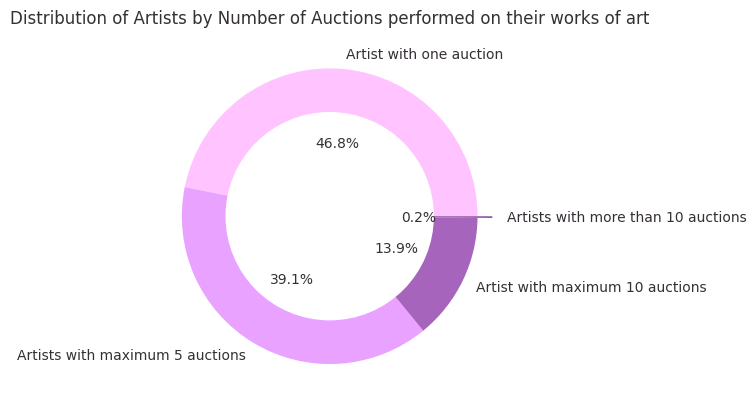

In [ ]:
#create donut chart from data above

import matplotlib.pyplot as plt

# settings
sizes = [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_greater_10]
labels = ['Artist with one auction', 'Artists with maximum 5 auctions', 'Artist with maximum 10 auctions', 'Artists with more than 10 auctions']
colors = ['#FFC3FF','#E9A2FF','#A664BC','#86469C']
explode = [0, 0, 0, 0.1]

# Create a pieplot
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})

# add a circle at the center to transform it into a donut chart
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Distribution of Artists by Number of Auctions performed on their works of art', color='#352f36')

plt.show()


This initial plot indicates that only a fraction of our dataset is substantial enough for meaningful data-driven research. Consequently, we need to narrow our focus to one of the 17 artists. The following code extracts this data.

In [ ]:
#create bar chart of frequency of auctions for artists with more than 10 auctions performed on their works.

#create dictionary with only above 10
greater_10_dict = {}
for key, value in high:
    if value > 10 :
        greater_10_dict[key] = value

data = {'artist': greater_10_dict.keys(), 'number of auctions': greater_10_dict.values()}


greater_than_10_df = pd.DataFrame(data)

greater_than_10_df

,artist,number of auctions
0,Pablo Picasso,9314
1,Andy Warhol,6996
2,NaN,2837
3,Gustav Klimt,424
4,Paul Cezanne,387
5,Willem de Kooning,381
6,Edvard Munch,371
7,Vincent van Gogh,133
8,Mark Rothko,133
9,Charles Eames,17


We visualize this data in a bar chart to observe the distribution differences.

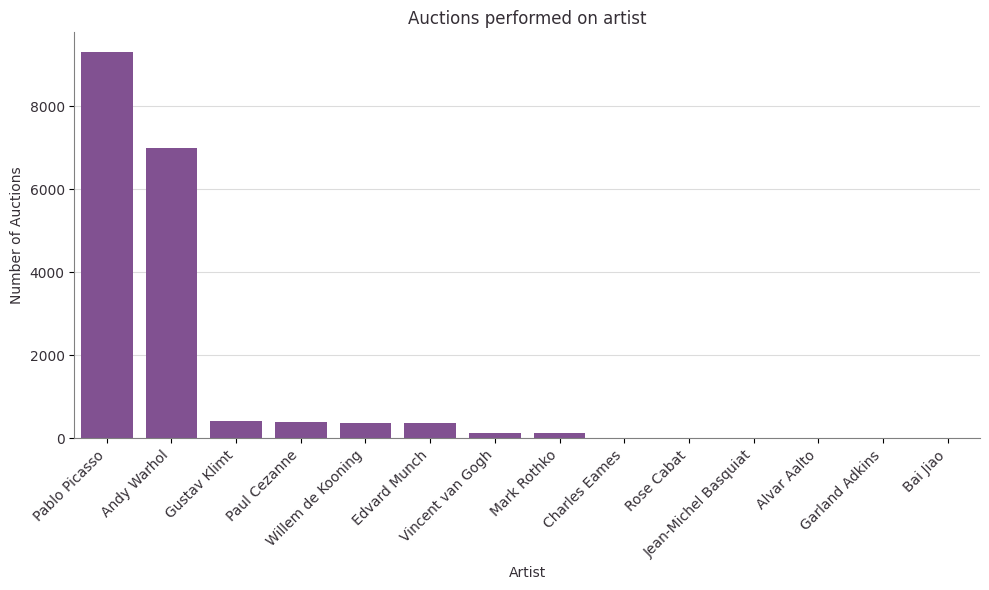

In [ ]:
# Plot artists with more than 10 auctions
plt.figure(figsize=(10, 6))

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

sns.barplot(x='artist', y='number of auctions', data=greater_than_10_df, color='#86469C', zorder=2)  # Set zorder for the bars
plt.xticks(rotation=45, ha='right', color='#352f36') 
plt.yticks(color='#352f36')
plt.title('Auctions performed on artist', color='#352f36')
plt.xlabel('Artist', color='#352f36')
plt.ylabel('Number of Auctions', color='#352f36')
sns.despine()
plt.grid(True, axis='y', linestyle='-', zorder=1)  # Add horizontal grid lines with lower zorder
plt.tight_layout()
plt.show()


We remove the outliers (Pablo Picasso and Andy Warhol) to better visualize the distribution for other artists.

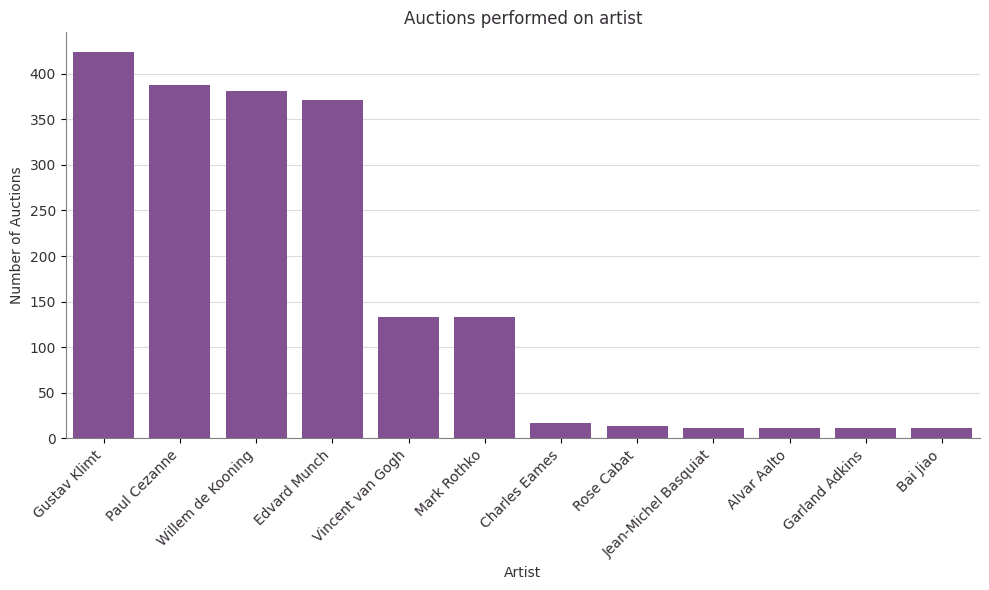

In [ ]:
# Plot without first two

greater_10_df_filtered = greater_than_10_df.iloc[2:]

plt.figure(figsize=(10, 6))

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

sns.barplot(x='artist', y='number of auctions', data=greater_10_df_filtered, color='#86469C', zorder=2)  # Set zorder for the bars
plt.xticks(rotation=45, ha='right', color='#352f36') 
plt.yticks(color='#352f36')
plt.title('Auctions performed on artist', color='#352f36')
plt.xlabel('Artist', color='#352f36')
plt.ylabel('Number of Auctions', color='#352f36')
sns.despine()
plt.grid(True, axis='y', linestyle='-', zorder=1)  # Add horizontal grid lines with lower zorder
plt.tight_layout()
plt.show()

The plot indicates a group of artists whose works have been sold in auctions a similar number of times. Hence, we can conduct an analysis among them to comprehend the variations in data between each artist. Our choice of artists has been taken considering this bar plot, where we can see that the number of Klimt and De Kooning auctions records are quite similar in respect also to the timespan of auction records added onto the dataset. 


In [ ]:
#save as csv
greater_10_df_filtered.to_csv('../docs//data/greater_10_filtered.csv', index=False)


## 1.2 Studying two artists: De Kooning and Klimt
## Times a work has been sold

In this section we analyse the mobility of works of De Kooning and Klimt. 

**Research question**: How many times have works by De Kooning and Klimt been sold, indicating their mobility in the market?

### 1.2.1 De Kooning

In [ ]:
# Count De Kooning frequency in the dataset

liss_dk = []
for column_name in auctions.columns:
    if column_name == "artist":
        for value in auctions[column_name]:
            if value == "Willem de Kooning":
                liss_dk.append(value)
print(len(liss_dk))

381


Here, we're exclusively retrieving results related to the chosen artists. Artworks lacking data about price and sold time have been removed from the dataset, reducing the number of considered examples to 307.

In [ ]:
# Auctions per work of art De Kooning

final_auctions_dk = auctions.loc[auctions["artist"] == "Willem de Kooning", ["artist", "name", "price", "soldtime"]].copy()

final_auctions_dk.dropna(subset=["price", "soldtime"], inplace=True)


# Extract the day from the "soldtime" column
final_auctions_dk["soldtime"] = final_auctions_dk["soldtime"].str.split("-").str[0]

final_auctions_dk.reset_index(drop=True, inplace=True)

# Save the DataFrame to a CSV file
final_auctions_dk.to_csv('auctions_data_DK.csv', index=False)

# Display the modified DataFrame
final_auctions_dk.head()


,artist,name,price,soldtime
0,Willem de Kooning,Untitled,1370000.0,2014
1,Willem de Kooning,Untitled,20450000.0,2014
2,Willem de Kooning,Untitled,1125000.0,2014
3,Willem de Kooning,Untitled XVIII,48690000.0,2014
4,Willem de Kooning,Untitled XXIV,175250000.0,2014


We compute the frequency of each work title to determine the number of times each work has been sold.

In [ ]:
#Check if there are works that have been sold more than once

name_counts = final_auctions_dk.groupby(['artist', 'name']).size().reset_index(name='count')

name_counts_sorted_dk = name_counts.sort_values(by='count', ascending=False)

name_counts_sorted_dk.reset_index(drop=True)

name_counts.head()


,artist,name,count
0,Willem de Kooning,Beach Scene (G.23),1
1,Willem de Kooning,Beach Scene (Graham 23),1
2,Willem de Kooning,Big,1
3,Willem de Kooning,Black And White Rome E,1
4,Willem de Kooning,Calm Digger (Graham 4),1


From this initial overview, it's evident that there are likely multiple works titled "Untitled" (as the probability of one work being sold 90 times in eight years is very low). Unfortunately, our dataset lacks a unique identifier for each work, making it impossible to disambiguate them. 

We proceed to examine the frequency of different transaction counts to understand the rate of data mobility.

In [ ]:
# count the number of works sold in how many times

# Count the occurrences of each count value
count_freq = name_counts_sorted_dk['count'].value_counts().sort_index()

# Create a DataFrame to store the count frequency data
count_data_dk = pd.DataFrame({'times_sold':count_freq.index , 'count': count_freq.values})

count_data_dk = count_data_dk.sort_values(by='times_sold', ascending=True)

# Modify the 'times_sold' column to become a string
count_data_dk['times_sold'] = 'sold ' + count_data_dk['times_sold'].astype(str) + ' times'

count_data_dk


,times_sold,count
0,sold 1 times,111
1,sold 2 times,22
2,sold 3 times,10
3,sold 4 times,1
4,sold 5 times,2
5,sold 6 times,3
6,sold 90 times,1


In [ ]:
# #This code shows the plot of the above mentioned data. 
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.


# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})


# plt.figure(figsize=(10, 6))
# sns.barplot(x='times_sold', y='count', data=count_data_dk, color='#E97D01', zorder = 4)

# plt.title('Frequency of Times a work has been sold', color='#352f36')
# plt.xlabel('Times Sold', color='#352f36')
# plt.ylabel('Number of works', color='#352f36')
# plt.xticks(rotation=45, color='#352f36')
# plt.yticks(color='#352f36')

# # Add exact value on top of each bar
# for index, value in enumerate(count_data_dk['count']):
#     plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='#352f36')

# # Plot the grid lines behind the bars
# plt.grid(True, axis='y', linestyle='-', zorder=0)  # Lower zorder for grid lines
# sns.despine()
# #
# plt.tight_layout()
# plt.show()




### 1.2.2 Klimt

We perform the same analysis on data about Klimt.

In [ ]:
# Count Klimt frequency

liss_k = []
for column_name in auctions.columns:
    if column_name == "artist":
        for value in auctions[column_name]:
            if value == "Gustav Klimt":
                liss_k.append(value)
print(len(liss_k))

424


In [ ]:
# Klimt data

final_auctions_k = auctions[["artist", "name", "price", "soldtime"]].copy()
final_auctions_k= final_auctions_k[final_auctions_k["artist"] == "Gustav Klimt"].copy()

final_auctions_k.reset_index(drop=True, inplace=True)

for idx, row in final_auctions_k.iterrows():
    if pd.isna(row["price"]) and pd.isna(row["soldtime"]):
        final_auctions_k.drop(idx, inplace=True)
        
dayy = []
for i in final_auctions_k['soldtime']:
    string_representation = str(i)
    split_parts = string_representation.split('-')
    day = split_parts[0]
    dayy.append(day)
final_auctions_k['soldtime'] = dayy
        

final_auctions_k.reset_index(drop=True, inplace=True)
final_auctions_k.to_csv('auctions_data_k.csv', index=False)
final_auctions_k

,artist,name,price,soldtime
0,Gustav Klimt,Vorgebeugt sitzende Aktfigur,174600.0,2014
1,Gustav Klimt,"Stehender Frauenakt Mit Erhobenem Linkem Bein,...",225000.0,2014
2,Gustav Klimt,Nach Links Sitzender Halbakt,200000.0,2014
3,Gustav Klimt,Allegory of Agriculture,200000.0,2014
4,Gustav Klimt,MÃ¤dchenbrustbild Von Vorne Mit HÃ¤ubchen (Por...,2691170.0,2014
...,...,...,...,...
251,Gustav Klimt,"Young nude with long, open hair",288000.0,2004
252,Gustav Klimt,Head and shoulders portrait of a lady glancing...,120140.0,2004
253,Gustav Klimt,Female nude bent over,192220.0,2004
254,Gustav Klimt,Lovers,180210.0,2004


In [ ]:
#Check if there are works that have been sold more than once

name_counts = final_auctions_k.groupby(['artist', 'name']).size().reset_index(name='count')

name_counts_sorted_k = name_counts.sort_values(by='count', ascending=False)

name_counts_sorted_k.reset_index(drop=True)

,artist,name,count
0,Gustav Klimt,Lovers,3
1,Gustav Klimt,Male nude,3
2,Gustav Klimt,Nude,3
3,Gustav Klimt,Adele Bloch-Bauer,2
4,Gustav Klimt,Seated nude,2
...,...,...,...
234,Gustav Klimt,Mada Primavesi,1
235,Gustav Klimt,Mannerkopf von vorne,1
236,Gustav Klimt,Mannerruckenakt,1
237,Gustav Klimt,Miss Lieser,1


In [ ]:
# count the number of works sold in how many times

# Count the occurrences of each count value
count_freq = name_counts_sorted_k['count'].value_counts().sort_index()

# Create a DataFrame to store the count frequency data
count_data_k = pd.DataFrame({'times_sold':count_freq.index , 'count': count_freq.values})

count_data_k = count_data_k.sort_values(by='times_sold', ascending=True)

# Modify the 'times_sold' column to become a string
count_data_k['times_sold'] = 'sold ' + count_data_k['times_sold'].astype(str) + ' times'

count_data_k


,times_sold,count
0,sold 1 times,225
1,sold 2 times,11
2,sold 3 times,3


In [ ]:
# #This code shows the plot of the above mentioned data. 
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

# plt.figure(figsize=(10, 6))
# sns.barplot(x='times_sold', y='count', data=count_data_k, color='#26408B', zorder=4)

# plt.title('Frequency of Times a work has been sold', color='#352f36')
# plt.xlabel('Times Sold', color='#352f36')
# plt.ylabel('Number of works', color='#352f36')
# plt.xticks(rotation=45, color='#352f36')
# plt.yticks(color='#352f36')


# # Add exact value on top of each bar
# for index, value in enumerate(count_data_k['count']):
#     plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='#352f36')

# # Remove right and top border
# sns.despine(right=True, top=True)

# plt.grid(True, axis='y', linestyle='-', zorder=0)
# plt.tight_layout()
# plt.show()


### 1.2.3 Compare data

To determine which artist's works are sold more times, we compare the number of art pieces that have been sold a certain number of times for each artist.

**Research questions**: Whose works are sold more times?

In [ ]:
#Combine data

# Left merge df_dk and df_k on 'times_sold' column
soldtime_merge_df = pd.merge(count_data_dk, count_data_k, on='times_sold', how='left')

# Fill NaN values with 0
soldtime_merge_df = soldtime_merge_df.fillna(0)

# Rename the 'count' columns
soldtime_merge_df = soldtime_merge_df.rename(columns={'count_x': 'de_kooning_count', 'count_y': 'klimt_count'})

# Convert count columns to integer data type
soldtime_merge_df['de_kooning_count'] = soldtime_merge_df['de_kooning_count'].astype(int)
soldtime_merge_df['klimt_count'] = soldtime_merge_df['klimt_count'].astype(int)

soldtime_merge_df


,times_sold,de_kooning_count,klimt_count
0,sold 1 times,111,225
1,sold 2 times,22,11
2,sold 3 times,10,3
3,sold 4 times,1,0
4,sold 5 times,2,0
5,sold 6 times,3,0
6,sold 90 times,1,0


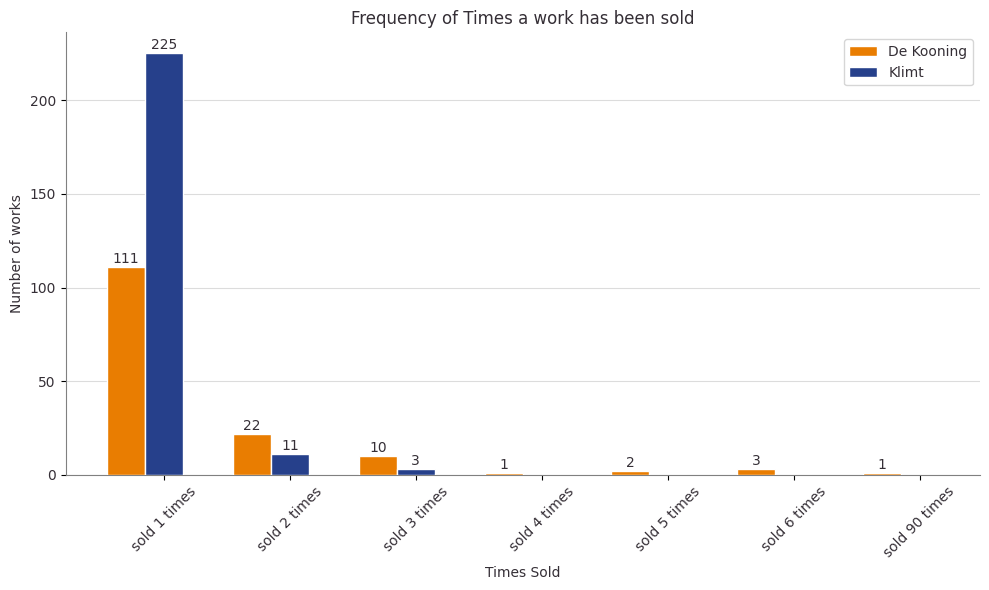

In [ ]:
# set width of bars
barWidth = 0.3

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})
 
# set heights of bars
bars1 = soldtime_merge_df['de_kooning_count']
bars2 = soldtime_merge_df['klimt_count']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='#E97D01', width=barWidth, edgecolor='white', label='De Kooning', zorder=4)
plt.bar(r2, bars2, color='#26408B', width=barWidth, edgecolor='white', label='Klimt', zorder=4)

for i, (dk_count, kl_count) in enumerate(zip(soldtime_merge_df['de_kooning_count'], soldtime_merge_df['klimt_count'])):
    if dk_count > 0:
        plt.text(i, dk_count + 0.5, str(dk_count), ha='center', va='bottom', color='#352f36')
    if kl_count > 0:
        plt.text(i + barWidth, kl_count + 0.5, str(kl_count), ha='center', va='bottom', color= '#352f36')
 
# Add xticks on the middle of the group bars
plt.title('Frequency of Times a work has been sold', color='#352f36')
plt.xlabel('Times Sold', color='#352f36')
plt.ylabel('Number of works', color='#352f36')
plt.yticks(color='#352f36')
plt.xticks([r + barWidth for r in range(len(bars1))], soldtime_merge_df['times_sold'], rotation=45, color='#352f36')

plt.grid(True, axis='y', linestyle='-', zorder=0)

# Remove right and top border
sns.despine(right=True, top=True)

plt.tight_layout()
 
# Create legend & Show graphic
legend = plt.legend()

# Set the color of the legend labels
for text in legend.get_texts():
    text.set_color('#352f36')

plt.show()

**Result**: This analysis highlights that although Klimt has more works sold, De Kooning's works tend to change ownership more frequently.

In [ ]:
#save as csv
soldtime_merge_df.to_csv('../docs/data/soldtime_merge_df.csv', index=False)


## 1.3 Sellings per year

In this section, we evaluate the distribution of auctions selling works of our two artists per year.

**Research question**: How many auctions for each artist have been performed per year?
### 1.3.1 De Kooning

In [ ]:
# Count the values in the 'soldtime' column
soldtime_counts_dk = final_auctions_dk['soldtime'].value_counts()

# Convert the Series to a DataFrame if needed
soldtime_counts_df = soldtime_counts_dk.reset_index()
soldtime_counts_df.columns = ['soldtime', 'count']

# Sort the DataFrame by the 'soldtime' column
soldtime_counts_df_sorted_dk = soldtime_counts_df.sort_values(by='soldtime')

# Display the sorted DataFrame
soldtime_counts_df_sorted_dk

,soldtime,count
1,2008,48
6,2009,17
5,2010,34
2,2011,45
3,2012,41
0,2013,82
4,2014,40


In [ ]:
# #This code shows the plot of the above mentioned data.
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.


# # Plot the timeline

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

# plt.figure(figsize=(10, 6))

# # Plot horizontal grid lines behind the line plot
# plt.grid(True, axis='y', linestyle='-', zorder=0)

# sns.lineplot(x="soldtime", y="count", data=soldtime_counts_df_sorted_dk, color='#E97D01') 

# plt.title('Sales per year', color='#352f36')
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Number of sales', color='#352f36')

# # Remove right and top border
# sns.despine(right=True, top=True)

# plt.yticks(color='#352f36')
# plt.xticks(color='#352f36')
# #
# plt.tight_layout()
# plt.show()


### 1.3.2 Klimt

In [ ]:
# Count the values in the 'soldtime' column
soldtime_counts_k = final_auctions_k['soldtime'].value_counts()

# Convert the Series to a DataFrame if needed
soldtime_counts_df = soldtime_counts_k.reset_index()
soldtime_counts_df.columns = ['soldtime', 'count']

# Sort the DataFrame by the 'soldtime' column
soldtime_counts_df_sorted_k = soldtime_counts_df.sort_values(by='soldtime')

# Display the sorted DataFrame
soldtime_counts_df_sorted_k

,soldtime,count
3,2004,21
0,2005,61
2,2006,32
1,2007,51
7,2008,15
6,2009,17
4,2010,18
8,2011,9
5,2012,17
10,2013,7


In [ ]:
# #This code shows the plot of the above mentioned data.
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.

# # Plot the timeline

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

# plt.figure(figsize=(10, 6))

# # Plot horizontal grid lines behind the line plot
# plt.grid(True, axis='y', linestyle='-', zorder=0)

# sns.lineplot(x="soldtime", y="count", data=soldtime_counts_df_sorted_dk, color='#26408B') 

# plt.title('Sales per year', color='#352f36')
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Number of sales', color='#352f36')

# # Remove right and top border
# sns.despine(right=True, top=True)

# plt.yticks(color='#352f36')
# plt.xticks(color='#352f36')

# plt.tight_layout()
# plt.show()

### 1.3.3 Compare data

Creating and displaying the change in the number of sales per year.


In [ ]:
# Convert 'soldtime' columns to int64 if they are not already
soldtime_counts_df_sorted_dk['soldtime'] = soldtime_counts_df_sorted_dk['soldtime'].astype('int64')
soldtime_counts_df_sorted_k['soldtime'] = soldtime_counts_df_sorted_k['soldtime'].astype('int64')

# Right merge the DataFrames on the 'soldtime' column
selling_per_year = pd.merge(soldtime_counts_df_sorted_dk, soldtime_counts_df_sorted_k, on='soldtime', how='right')

# Rename the count columns
selling_per_year.rename(columns={'count_x': 'de kooning count', 'count_y': 'klimt count'}, inplace=True)

# Replace NaN values with 0
selling_per_year.fillna(0, inplace=True)

# Convert the count columns to int64
selling_per_year['de kooning count'] = selling_per_year['de kooning count'].astype('int64')
selling_per_year['klimt count'] = selling_per_year['klimt count'].astype('int64')

# Sort by 'soldtime'
selling_per_year.sort_values(by='soldtime', inplace=True)

# Display the merged and sorted DataFrame
selling_per_year

,soldtime,de kooning count,klimt count
0,2004,0,21
1,2005,0,61
2,2006,0,32
3,2007,0,51
4,2008,48,15
5,2009,17,17
6,2010,34,18
7,2011,45,9
8,2012,41,17
9,2013,82,7


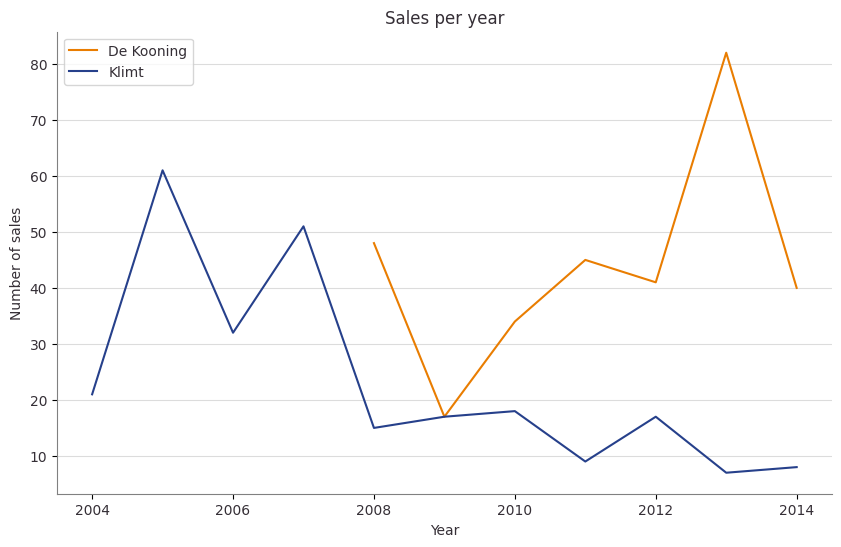

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure and axes
plt.figure(figsize=(10, 6))

# Filter out rows where "de kooning count" is not equal to 0
de_kooning_filtered = selling_per_year[selling_per_year['de kooning count'] != 0]

# Filter out rows where "klimt count" is not equal to 0
klimt_filtered = selling_per_year[selling_per_year['klimt count'] != 0]

# Plot "de kooning count"
if not de_kooning_filtered.empty:
    sns.lineplot(x="soldtime", y="de kooning count", data=de_kooning_filtered, color='#E97D01', zorder=4, label='De Kooning')

# Plot "klimt count" if "klimt count" is not empty
if not klimt_filtered.empty:
    sns.lineplot(x="soldtime", y="klimt count", data=klimt_filtered, color='#26408B', zorder=4, label='Klimt')

# Add labels and legend
plt.title('Sales per year', color='#352f36')
plt.xlabel('Year', color='#352f36')
plt.ylabel('Number of sales', color='#352f36')
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Create legend & Show graphic
plt.legend()

# Set the color of the legend labels
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('#352f36')

# Remove right and top border
sns.despine(right=True, top=True)

plt.grid(True, axis='y', linestyle='-', zorder=0)

# Show the plot
plt.show()


We observe that in the common time span (2008-2014), Klimt has experienced a decrease in sales, while the opposite trend can be observed for De Kooning. However, it's worth noting that in the last year considered (2014), De Kooning's sales were halved compared to the previous year.

In [ ]:
selling_per_year.to_csv('../docs/data/selling_per_year.csv', index=False)

## 1.4 Price of sellings

In this section we study the variation of price in time.

**Research question**: How do the prices change in time?
### 1.4.1 De Kooning

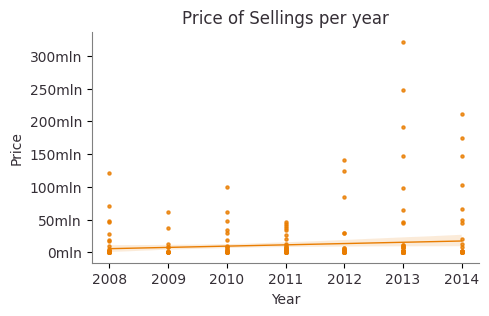

In [ ]:
# Plot sellings at time and price De Kooning
import matplotlib.ticker as ticker

# Convert 'soldtime' and 'price' columns to numeric data types if they are not already
final_auctions_dk['soldtime'] = pd.to_numeric(final_auctions_dk['soldtime'], errors='coerce')
final_auctions_dk['price'] = pd.to_numeric(final_auctions_dk['price'], errors='coerce')

# Drop rows with NaN values if any
final_auctions_dk = final_auctions_dk.dropna(subset=['soldtime', 'price'])

# Plot the scatter plot with regression line
plt.figure(figsize=(5, 3))
sns.regplot(x='soldtime', y='price', data=final_auctions_dk, color='#E97D01', scatter_kws={'s': 5}, line_kws={'linewidth': 1})

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
plt.gca().yaxis.set_major_formatter(formatter)

# Set the labels and title
plt.xlabel('Year', color='#352f36')
plt.ylabel('Price', color='#352f36')
plt.title('Price of Sellings per year', color='#352f36')
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Remove left and top border
sns.despine(right=True, top=True)

# Show the plot
plt.show()


Presented like this, it's challenging to grasp the precise values for each layer. Therefore, we round the data to the nearest 10 million.

In [ ]:
# Round the 'price' values to the nearest million
rounded_prices = (final_auctions_dk['price'] // 10000000) * 10000000

# Create a new DataFrame with 'soldtime', 'rounded_prices', and 'count'
rounded_prices_df_dk = final_auctions_dk.groupby(['soldtime', rounded_prices]).size().reset_index(name='count')

# Rename columns
rounded_prices_df_dk.rename(columns={rounded_prices.name: 'rounded_prices'}, inplace=True)

# Sort the DataFrame by 'soldtime'
rounded_prices_df_dk.sort_values(by='soldtime', inplace=True)

# Display the new DataFrame
rounded_prices_df_dk.head()





,soldtime,rounded_prices,count
0,2008,0.0,41
1,2008,10000000.0,2
2,2008,20000000.0,1
3,2008,40000000.0,2
4,2008,70000000.0,1


In [ ]:
# #This code shows the plot of the above mentioned data.
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.

# # Plot grouped count 

# # Define the two colors
# color1 = '#FCAC23'  # Yellow
# color2 = '#B53302'  # Red


# # Create a custom colormap gradient
# cmap = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])


# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_dk, legend=True, palette=cmap, sizes=(50,200))


# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)

# # Set the labels and title
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Price', color='#352f36')
# plt.title('Price of Sellings per year', color='#352f36')
# plt.xticks(color='#352f36')
# plt.yticks(color='#352f36')

# # Set the color of the legend labels
# legend = plt.legend(title = 'Number of sales',  loc='upper left')
# for text in legend.get_texts():
#     text.set_color('#352f36')


# # Show the plot
# plt.show()




### 1.4.2 Klimt

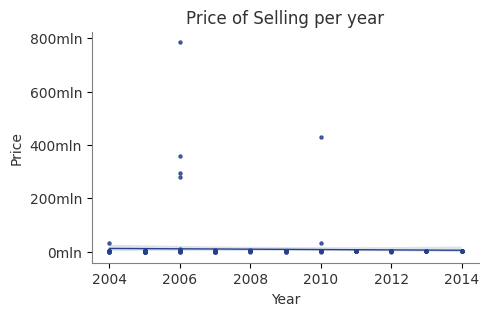

In [ ]:
# plot sellings at time and price Klimt

import matplotlib.ticker as ticker

# Convert 'soldtime' and 'price' columns to numeric data types if they are not already
final_auctions_k['soldtime'] = pd.to_numeric(final_auctions_k['soldtime'], errors='coerce')
final_auctions_k['price'] = pd.to_numeric(final_auctions_k['price'], errors='coerce')

# Drop rows with NaN values if any
final_auctions_k = final_auctions_k.dropna(subset=['soldtime', 'price'])

# Plot the scatter plot with regression line
plt.figure(figsize=(5, 3))
sns.regplot(x='soldtime', y='price', data=final_auctions_k, color='#26408B', scatter_kws={'s': 5}, line_kws={'linewidth': 1})

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
plt.gca().yaxis.set_major_formatter(formatter)

# Set the labels and title
plt.xlabel('Year', color='#352f36')
plt.ylabel('Price', color='#352f36')
plt.title('Price of Selling per year', color='#352f36')
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Remove left and top border
sns.despine(right=True, top=True)

# Show the plot
plt.show()



as for de Kooning, we now show de distribution of values to make more explicit the distribution.

In [ ]:
# Round the 'price' values to the nearest million
rounded_prices = (final_auctions_k['price'] // 10000000) * 10000000

# Create a new DataFrame with 'soldtime', 'rounded_prices', and 'count'
rounded_prices_df_k = final_auctions_k.groupby(['soldtime', rounded_prices]).size().reset_index(name='count')

# Rename columns
rounded_prices_df_k.rename(columns={rounded_prices.name: 'rounded_prices'}, inplace=True)

# Sort the DataFrame by 'soldtime'
rounded_prices_df_k.sort_values(by='soldtime', inplace=True)

# Display the new DataFrame
rounded_prices_df_k.head()

,soldtime,rounded_prices,count
0,2004,0.0,20
1,2004,30000000.0,1
2,2005,0.0,61
3,2006,0.0,27
4,2006,10000000.0,1


In [ ]:
# # Define the two colors
# color3 = '#81B1D5'  # Light blue
# color4 = '#0F084B'  # Dark blue


# # Create a custom colormap gradient
# cmap = LinearSegmentedColormap.from_list('custom_gradient', [color3, color4])


# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_k, legend=True, palette=cmap, sizes=(50,200))


# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)

# # Set the labels and title
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Price', color='#352f36')
# plt.title('Price of Sellings per year', color='#352f36')
# plt.xticks(color='#352f36')
# plt.yticks(color='#352f36')

# # Set the color of the legend labels
# legend = plt.legend(title = 'Number of sales')
# for text in legend.get_texts():
#     text.set_color('#352f36')


# # Show the plot
# plt.show()


### 1.4.1 Compare data

We now compare the data from the two artists.

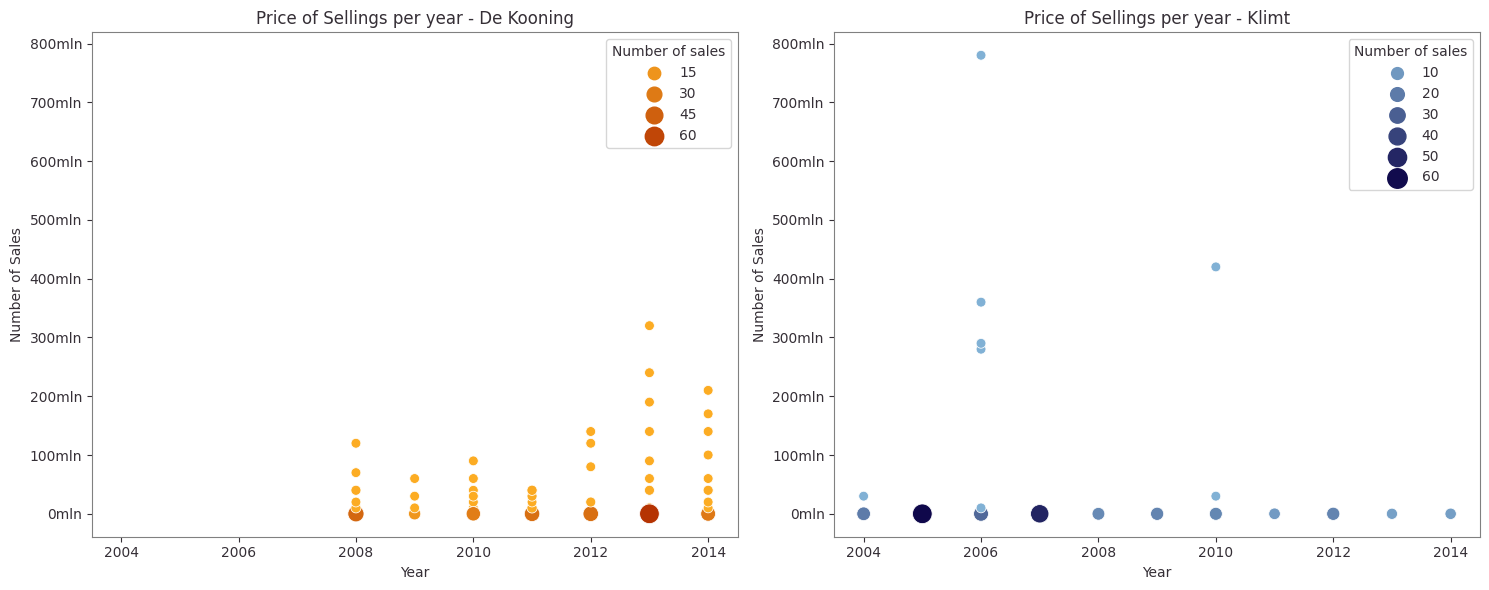

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

# Define the two colors
color1 = '#FCAC23'  # Yellow
color2 = '#B53302'  # Red

# Create a custom colormap gradient
cmap_orange = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])

# Define the two colors for the custom gradient
color3 = '#81B1D5'  # Light blue
color4 = '#0F084B'  # Dark blue

# Create a custom colormap gradient
cmap_blue = LinearSegmentedColormap.from_list('custom_gradient', [color3, color4])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for rounded_prices_df_dk
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_dk, ax=axs[0], legend=True, palette=cmap_orange, sizes=(50,200))
axs[0].set_title('Price of Sellings per year - De Kooning', color='#352f36')
axs[0].set_xlabel('Year', color='#352f36')
axs[0].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[0].tick_params(axis='x', colors='#352f36')
axs[0].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[0].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[0].yaxis.set_major_formatter(formatter)


# Plot for rounded_prices_df_k
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_k, ax=axs[1], legend=True, palette=cmap_blue, sizes=(50,200))
axs[1].set_title('Price of Sellings per year - Klimt', color='#352f36')
axs[1].set_xlabel('Year', color='#352f36')
axs[1].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[1].tick_params(axis='x', colors='#352f36')
axs[1].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[1].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[1].yaxis.set_major_formatter(formatter)

# Match x-axis limits of the second subplot to the first subplot
axs[0].set_xlim(axs[1].get_xlim())

# Match y-axis limits of the second subplot to the first subplot
axs[0].set_ylim(axs[1].get_ylim())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From this initial comparison, it appears that Klimt had significant market interest between 2005 and 2007, while the peak year for De Kooning was 2013, marked by numerous low-price auctions alongside a few high-priced ones.

This analysis shows us that the price for both Klimt and De Kooning works are pretty similar, and that interest in De Kooning is way higher.

## 1.5 Studying the mean
Here we study the distribution of the mean

### 1.5.1 De Kooning

In [ ]:
#mean price per year de Kooning
pd.options.display.float_format = '{:.2f}'.format

# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_dk = final_auctions_dk.groupby('soldtime')['price'].mean()


# Assuming 'mean_price_per_year_dk' is the Series containing mean price per year
mean_price_per_year_dk_df = mean_price_per_year_dk.reset_index()

# Rename the columns
mean_price_per_year_dk_df.columns = ['soldtime', 'mean']
# Print the mean price for each year
mean_price_per_year_dk_df

,soldtime,mean
0,2008,7798806.04
1,2009,7603057.65
2,2010,9788578.82
3,2011,7128407.11
4,2012,10849152.44
5,2013,15078419.76
6,2014,21186242.25


In [ ]:
# ##This code shows the plot of the above mentioned data.
# ##To make the notebook lighter we live it as not automatically runned
# ##To show it de comment the cell.

# # Plot the variation of mean price per year
# plt.figure(figsize=(10, 6))
# mean_price_per_year_dk.plot(kind='line', marker='o', color='#E97D01')

# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)

# plt.title('Mean of Price per Year', color='#352f36')  # Change title color
# plt.xlabel('Year', color='#352f36')  # Change xlabel color
# plt.ylabel('Mean of Price', color='#352f36')  # Change ylabel color
# plt.xticks(color='#352f36')  # Change xticks color
# plt.yticks(color='#352f36')  # Change yticks color
# plt.grid(axis='y')  # Show only horizontal grid
# sns.despine(right=True, top=True)  # Remove right and top border

# plt.tight_layout()
# plt.show()
# #

### 1.5.2 Klimt

In [ ]:
#median price per year Klimt
pd.options.display.float_format = '{:.2f}'.format


# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_k = final_auctions_k.groupby('soldtime')['price'].median()


# Assuming 'mean_price_per_year_k' is the Series containing mean price per year
mean_price_per_year_k_df = mean_price_per_year_k.reset_index()

# Rename the columns
mean_price_per_year_k_df.columns = ['soldtime', 'mean']
# Print the mean price for each year
mean_price_per_year_k_df

,soldtime,mean
0,2004,180210.00
1,2005,216270.00
2,2006,391455.00
3,2007,551400.00
4,2008,297770.00
5,2009,291190.00
6,2010,330920.00
7,2011,630620.00
8,2012,274550.00
9,2013,475000.00


In [ ]:
# ##This code shows the plot of the above mentioned data.
# ##To make the notebook lighter we live it as not automatically runned
# ##To show it de comment the cell.

# # Plot the variation of mean price per year
# plt.figure(figsize=(10, 6))
# mean_price_per_year_k.plot(kind='line', marker='o', color='#26408B')

# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) if x < 1000000 else '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)


# plt.title('Mean of Price per Year', color='#352f36')  # Change title color
# plt.xlabel('Year', color='#352f36')  # Change xlabel color
# plt.ylabel('Mean of Price', color='#352f36')  # Change ylabel color
# plt.xticks(color='#352f36')  # Change xticks color
# plt.yticks(color='#352f36')  # Change yticks color
# plt.grid(axis='y')  # Show only horizontal grid
# sns.despine(right=True, top=True)  # Remove right and top border

# plt.tight_layout()
# plt.show()

### 1.5.3 Compare Data

In [ ]:
combined_mean_price_per_year = mean_price_per_year_k_df.merge(mean_price_per_year_dk_df, on='soldtime', suffixes=('_k', '_dk'))
combined_mean_price_per_year

,soldtime,mean_k,mean_dk
0,2008,297770.00,7798806.04
1,2009,291190.00,7603057.65
2,2010,330920.00,9788578.82
3,2011,630620.00,7128407.11
4,2012,274550.00,10849152.44
5,2013,475000.00,15078419.76
6,2014,218885.00,21186242.25


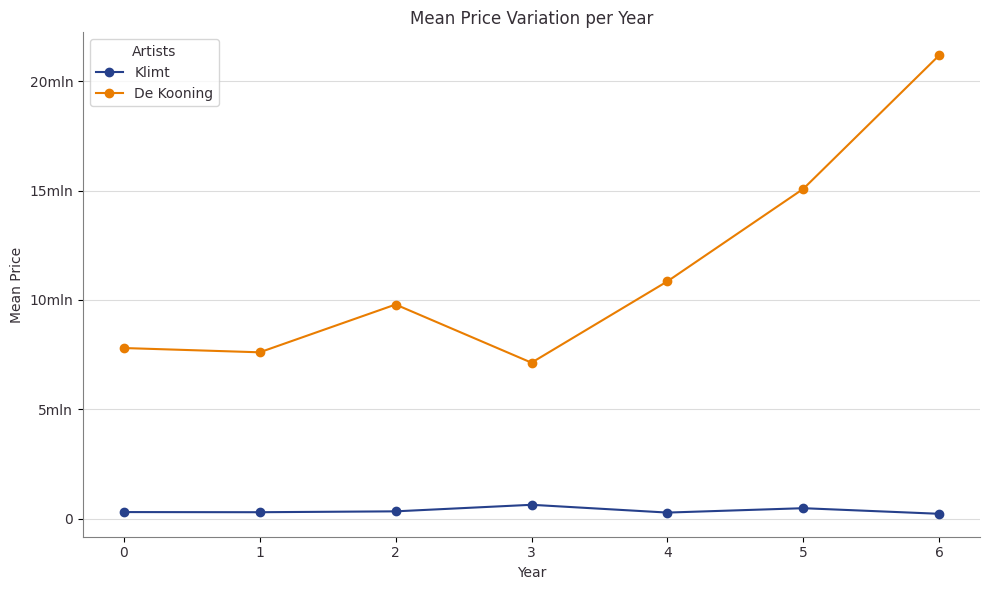

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the mean price variation per year for Klimt
plt.plot(combined_mean_price_per_year.index, combined_mean_price_per_year['mean_k'], marker='o', color='#26408B', label='Klimt')

# Plot the mean price variation per year for De Kooning
plt.plot(combined_mean_price_per_year.index, combined_mean_price_per_year['mean_dk'], marker='o', color='#E97D01', label='De Kooning')

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) if x < 1000000 else '{:,.0f}'.format(x/1000000) + 'mln')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Mean Price Variation per Year', color='#352f36')  # Change title color
plt.xlabel('Year', color='#352f36')  # Change xlabel color
plt.ylabel('Mean Price', color='#352f36')  # Change ylabel color
plt.xticks(color='#352f36')  # Change xticks color
plt.yticks(color='#352f36')  # Change yticks color
plt.grid(axis='y')  # Show only horizontal grid
sns.despine(right=True, top=True)  # Remove right and top border

# Set legend labels and colors
legend = plt.legend(loc='upper left', title='Artists')
plt.setp(legend.get_title(), color='#352f36')  # Set legend title color
for text in legend.get_texts():
    text.set_color('#352f36')  # Set legend label color

plt.tight_layout()
plt.show()



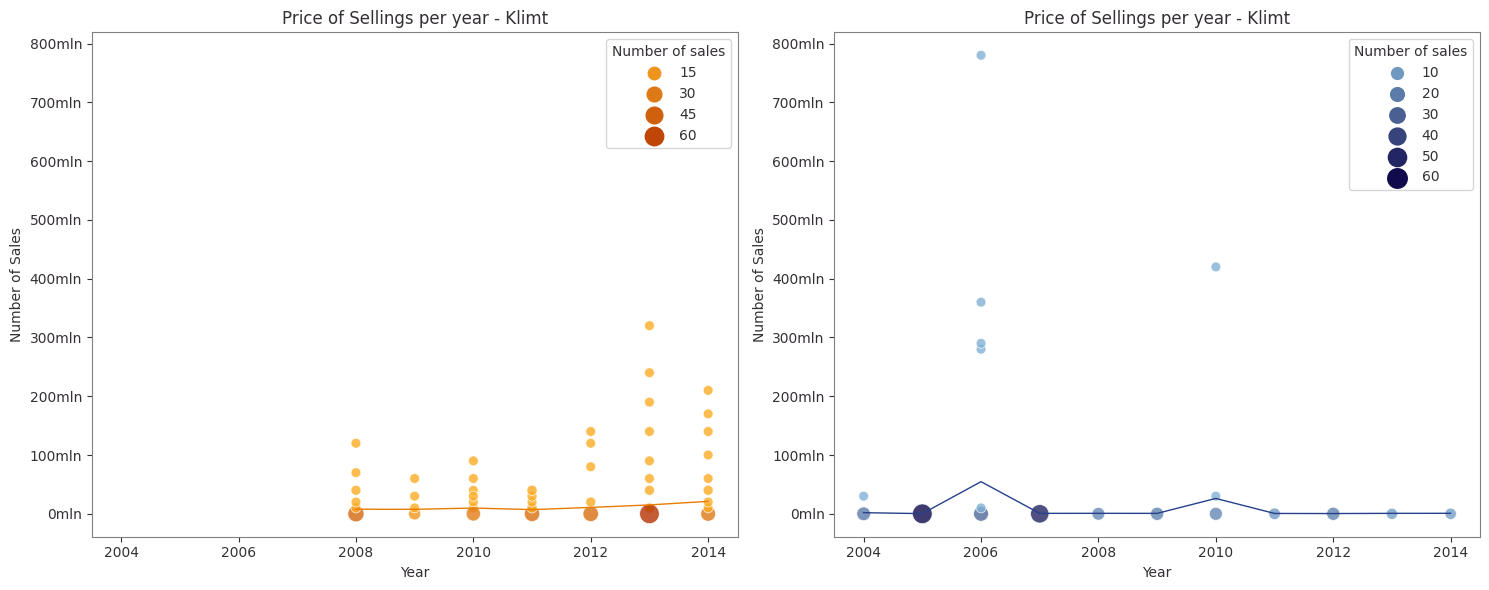

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Define the two colors for the custom gradient
color1 = '#FCAC23'  # Yellow
color2 = '#B53302'  # Red
color3 = '#81B1D5'  # Light blue
color4 = '#0F084B'  # Dark blue

# Create custom colormaps
cmap_orange = LinearSegmentedColormap.from_list('custom_gradient_orange', [color1, color2])
cmap_blue = LinearSegmentedColormap.from_list('custom_gradient_blue', [color3, color4])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for rounded_prices_df_dk
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_dk, ax=axs[0], legend=True, palette=cmap_orange, sizes=(50,200), alpha=0.8)
axs[0].set_title('Price of Sellings per year - Klimt', color='#352f36')
axs[0].set_xlabel('Year', color='#352f36')
axs[0].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[0].tick_params(axis='x', colors='#352f36')
axs[0].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[0].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Plot the line plot for mean price per year for final_auctions_dk
mean_price_per_year_dk = final_auctions_dk.groupby('soldtime')['price'].mean()
axs[0].plot(mean_price_per_year_dk.index, mean_price_per_year_dk.values, color='#E97D01', linestyle='-', linewidth=1)

# Plot for rounded_prices_df_k
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_k, ax=axs[1], legend=True, palette=cmap_blue, sizes=(50,200), alpha=0.8)
axs[1].set_title('Price of Sellings per year - Klimt', color='#352f36')
axs[1].set_xlabel('Year', color='#352f36')
axs[1].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[1].tick_params(axis='x', colors='#352f36')
axs[1].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[1].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Plot the line plot for mean price per year for final_auctions_k
mean_price_per_year_k = final_auctions_k.groupby('soldtime')['price'].mean()
axs[1].plot(mean_price_per_year_k.index, mean_price_per_year_k.values, color='#26408B', linestyle='-', linewidth=1)

# Match x-axis limits of the second subplot to the first subplot
axs[0].set_xlim(axs[1].get_xlim())

# Match y-axis limits of the second subplot to the first subplot
axs[0].set_ylim(axs[1].get_ylim())

# Format y-axis ticks

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[0].yaxis.set_major_formatter(formatter)

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[1].yaxis.set_major_formatter(formatter)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
rounded_prices_df_dk.to_csv('../docs/data/rounded_count_dk.csv', index=False)
mean_price_per_year_dk.to_csv('../docs/data/mean_price_per_year_dk.csv', index=False)
rounded_prices_df_k.to_csv('../docs/data/rounded_count_k.csv', index=False)
mean_price_per_year_k.to_csv('../docs/data/mean_price_per_year_k.csv', index=False)

# 2. Bibliography

## 2.1 Data Cleaning
### 2.1.1 data bnf
#### 2.1.1.1 De Kooning


Since accessing the sparql endpoint of data.bnf using python returns an empty html page, we performed the following query using the web endpoint  <a href="https://data.bnf.fr/sparql/">data.bnf</a>:
```
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT * 
WHERE {
  ?work dct:title ?title ;
        dct:publisher ?publisher;
        dct:date ?date;
        rdfs:seeAlso ?uri ;
        bnf-onto:isbn ?isbn;
        
  FILTER (bif:contains(?title, "De_Kooning"))}

```

The first query works at FRBR Work level, not allowing to extract directly the author of the work, because it's not an information contained at this level. After that a CSV containing dataset was downloaded and analyzed. 

The following query has been performed also:


```
PREFIX rdarelationships: <http://rdvocab.info/RDARelationshipsWEMI/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT distinct ?work ?title ?creatorname ?date ?isbn
WHERE {
  ?work dct:title ?title;
        dct:creator ?creator.
		?creator foaf:name ?creatorname.
  ?work dct:date ?date.
  ?work rdarelationships:expressionOfWork ?expression.
?manifestation rdarelationships:expressionManifested ?expression.
?manifestation bnf-onto:isbn ?isbn.  
  FILTER (bif:contains(?title, "De_Kooning"))}
```

This query works at the FRBR Manifestation level, it allows to gather all data needed for our needs but unfortunately the number of manifestations which have associated an author are a limited number. For this reason, we decided to stick with the query with more results, even though this could mean sacrificing some important metadata that could be used for analysis.


In [ ]:
import pandas as pd
bnf_dk = pd.read_csv("databnf_DK.csv")
pd.set_option('display.max_rows', None)
bnf_dk.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45692271m#about,Le rire de De Kooning,"Bordeaux : Olympique , 2019",2019,https://catalogue.bnf.fr/ark:/12148/cb45692271m,978-2-9557550-6-8
1,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714845817
2,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160
3,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714845814
4,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714873169


In [ ]:
#counting De Kooning occurrences in the title of the dataframe
liss = []
for column_name in bnf_dk.columns:
    if column_name == "title":
        for value in bnf_dk[column_name]:
            if "de Kooning" in value or "De Kooning" in value:
                liss.append(value)
print(len(liss))

row_count = bnf_dk.shape[0]

70


We are altering the structure of the identifier (ISBN) here, as it will later need to be standardized for comparison with results obtained from the Google API. The Google API provides various identifiers, not just ISBNs, so this standardization ensures that potential duplicates in the dataset which will combine data from data.bnf and Google can be detected only when a direct ISBN comparison is possible.

In [ ]:
for column_name in bnf_dk.columns:
    if column_name == "isbn":
        for i, value in enumerate(bnf_dk[column_name]):
            if "-" in value:
                # Replacing hyphens with empty string
                bnf_dk.at[i, column_name] = value.replace("-", "")
bnf_dk.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45692271m#about,Le rire de De Kooning,"Bordeaux : Olympique , 2019",2019,https://catalogue.bnf.fr/ark:/12148/cb45692271m,9782955755068
1,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714845817
2,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160
3,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714845814
4,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714873169


#### 2.1.2.1 Klimt

In this case the query performed is this:
```PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT * 
WHERE {
  ?work dct:title ?title ;
        dct:publisher ?publisher;
        dct:date ?date;
        rdfs:seeAlso ?uri ;
        bnf-onto:isbn ?isbn
  FILTER (bif:contains(?title, "Klimt"))}
  ```

 done on the web endpoint and then the CSV was downloaded. 

In [ ]:
bnf_k = pd.read_csv("databnf_KLI.csv")
pd.set_option('display.max_rows', None)
bnf_k.head()


,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,0878468528
1,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,9780878468522
2,http://data.bnf.fr/ark:/12148/cb35356100b#about,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,https://catalogue.bnf.fr/ark:/12148/cb35356100b,0-7148-1600-0
3,http://data.bnf.fr/ark:/12148/cb37494522j#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,https://catalogue.bnf.fr/ark:/12148/cb37494522j,0-7148-1600-0
4,http://data.bnf.fr/ark:/12148/cb39124684p#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,https://catalogue.bnf.fr/ark:/12148/cb39124684p,0-7148-2967-6


In [ ]:
for column_name in bnf_k.columns:
    if column_name == "isbn":
        for i, value in enumerate(bnf_k[column_name]):
            if "-" in value:
                # Replacing hyphens with empty string
                bnf_k.at[i, column_name] = value.replace("-", "")
bnf_k.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,0878468528
1,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,9780878468522
2,http://data.bnf.fr/ark:/12148/cb35356100b#about,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,https://catalogue.bnf.fr/ark:/12148/cb35356100b,0714816000
3,http://data.bnf.fr/ark:/12148/cb37494522j#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,https://catalogue.bnf.fr/ark:/12148/cb37494522j,0714816000
4,http://data.bnf.fr/ark:/12148/cb39124684p#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,https://catalogue.bnf.fr/ark:/12148/cb39124684p,0714829676


### 2.1.2 Query on Google Books Api
We used an HTTP request to query the Google Books API. The results produced are not completely coherent with the request, so after fetching the information, a further filtering was needed
#### 2.1.2.1 De Kooning

In [ ]:
import requests
import json

def fetch_books(query, max_results=40):
    base_url = "https://www.googleapis.com/books/v1/volumes"
    start_index = 0
    all_results = []

    while True:
        params = {
            "q": query,
            "startIndex": start_index,
            "maxResults": max_results
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if not items:
                break
            all_results.extend(items)
            start_index += max_results
        else:
            print("Failed to retrieve data. Status code:", response.status_code)
            break

    return all_results

books_dk = fetch_books("De Kooning")

# Saving JSON data to a file
with open("dkbooks.json", "w") as json_file:
    json.dump(books_dk, json_file, indent=4)

print("JSON data saved to dkbooks.json")

JSON data saved to dkbooks.json


In [ ]:
import json

# Load JSON data from file
with open("dkbooks.json", "r") as json_file:
    books_data_dk = json.load(json_file)

# Extract relevant fields from each book item
books_list_dk = []
for book in books_data_dk:
    book_info = {
        "Title": book["volumeInfo"].get("title", "N/A"),
        "Subtitle": book["volumeInfo"].get("subtitle", "N/A"),
        "Authors": ", ".join(book["volumeInfo"].get("authors", ["N/A"])),
        "Publisher": book["volumeInfo"].get("publisher", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "isbn": book["volumeInfo"].get("industryIdentifiers", [{}])[0].get("identifier", "N/A"),  # Retrieving ISBN
    }
    books_list_dk.append(book_info)

# Create DataFrame
books_df_dk = pd.DataFrame(books_list_dk)
books_df_dk.replace('N/A', np.nan, inplace= True)

# Display DataFrame
books_df_dk.head()


,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,"De Kooning, dipinti, disegni, sculture",NaN,Willem De Kooning,NaN,1985,UOM:39015015825683
1,De Kooning,NaN,NaN,NaN,1985,OCLC:12250843
2,Willem De Kooning,late paintings,"Willem De Kooning, Museo Carlo Bilotti",Mondadori Electa,2006,UOM:39015066851935
3,De Kooning,NaN,"Willem De Kooning, Gabriella Drudi",NaN,1972,UOM:39015045652768
4,De Kooning,A Retrospective,"Willem De Kooning, John Elderfield, Lauren Mah...",The Museum of Modern Art,2011,9780870707971


In [ ]:
#checking how many times De Kooning appears in the title
liss = []
for column_name in books_df_dk.columns:
    if column_name == "Title":
        for value in books_df_dk[column_name]:
            if "de Kooning" in value or "De Kooning" in value:
                liss.append(value)
print(len(liss))


145


Filtering has been done considering the title and in particular the surname of the author in order to avoid results related to his wife that were showing up consistenly. 

In [ ]:

books_dk = books_df_dk[books_df_dk["Title"].str.contains("de Kooning", case=False) & ~books_df_dk["Title"].str.contains("Elaine de Kooning", case=False)].copy()

books_dk.reset_index(drop=True, inplace=True)

books_dk.head()

,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,"De Kooning, dipinti, disegni, sculture",NaN,Willem De Kooning,NaN,1985,UOM:39015015825683
1,De Kooning,NaN,NaN,NaN,1985,OCLC:12250843
2,Willem De Kooning,late paintings,"Willem De Kooning, Museo Carlo Bilotti",Mondadori Electa,2006,UOM:39015066851935
3,De Kooning,NaN,"Willem De Kooning, Gabriella Drudi",NaN,1972,UOM:39015045652768
4,De Kooning,A Retrospective,"Willem De Kooning, John Elderfield, Lauren Mah...",The Museum of Modern Art,2011,9780870707971


In [ ]:
# Merge the two DataFrames on the 'ISBN' column
df_combined_dk= pd.merge(bnf_dk, books_dk, on='isbn', how='inner')

# Display the new DataFrame with rows where ISBN is found in both DataFrames
df_combined_dk


,work,title,publisher,date,uri,isbn,Title,Subtitle,Authors,Publisher,PublishedDate
0,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160,Willem de Kooning,A Way of Living,Judith Zilczer,Phaidon Press,2017-05-22
1,http://data.bnf.fr/ark:/12148/cb347640459#about,Willem De Kooning : Whitney museum of American...,"Paris : Centre Georges-Pompidou , 1984",1984,https://catalogue.bnf.fr/ark:/12148/cb347640459,2858502552,De Kooning,,"Claire Stoullig, Catherine Bompuis, Akademie d...",NaN,1984
2,http://data.bnf.fr/ark:/12148/cb37526494b#about,"Willem de Kooning : drawings, paintings, sculp...",New York : Whitney museum of American art ; Mu...,1983,https://catalogue.bnf.fr/ark:/12148/cb37526494b,0393018407,Willem de Kooning,"Drawings, Paintings, Sculpture, [mostra Itiner...","Paul Cummings, Willem De Kooning",NaN,1983
3,http://data.bnf.fr/ark:/12148/cb45288067c#about,"Willem De Kooning, Zao Wou-Ki : [exposition Lé...",New York : Lévy Gorvy,2017,https://catalogue.bnf.fr/ark:/12148/cb45288067c,1944379126,De Kooning - Zao Wou-KI,NaN,NaN,Dominique Levy Gallery,2017-03-28
4,http://data.bnf.fr/ark:/12148/cb42265321b#about,Willem de Kooning : the artist's materials,"Los Angeles : Getty conservation institute , c...",2010,https://catalogue.bnf.fr/ark:/12148/cb42265321b,9781606060216,Willem de Kooning,The Artist's Materials,Susan Lake,Getty Publications,2010
5,http://data.bnf.fr/ark:/12148/cb34982520m#about,"Willem de Kooning, recent paintings, 1983-1986...","London : Anthony d'Offay gallery , 1986",1986,https://catalogue.bnf.fr/ark:/12148/cb34982520m,094756408X,Willem de Kooning,"Recent Paintings, 1983-1986",Willem De Kooning,Anthony D'Offay Gallery,1986-01-01
6,http://data.bnf.fr/ark:/12148/cb347686735#about,"De Kooning : petit journal de l'exposition, 28...","Paris : Centre Georges Pompidou , 1984",1984,https://catalogue.bnf.fr/ark:/12148/cb347686735,285850234X,De Kooning,petit journal de l'exposition : Musee national...,"Musée national d'art moderne (Paris), Whitney ...",NaN,1984
7,http://data.bnf.fr/ark:/12148/cb38841654h#about,"Willem de Kooning : tracing the figure, [exhib...",Los Angeles : Museum of contemporary art ; Pri...,2002,https://catalogue.bnf.fr/ark:/12148/cb38841654h,069109618X,Willem de Kooning,Tracing the Figure,"Willem De Kooning, Cornelia H. Butler, Paul Sc...",Princeton University Press,2002
8,http://data.bnf.fr/ark:/12148/cb356992193#about,Willem De Kooning,"Paris : l'Échoppe , 1994",1994,https://catalogue.bnf.fr/ark:/12148/cb356992193,2840680297,Willem De Kooning,NaN,Edwin Denby,NaN,1994


This part creates a complete dataframe of records gathering information from both data.bnf and Google books API while dropping duplicates based on ISBN and merging together title and subtitle. This last step was done to allow a future comparison with exhibition catalogues. Moreover, in this case the dataset contains both data regarding books and exhibition classes, two types of publications that are furtherly distinguished and analyzed later on. 

In [ ]:
# Rename the 'Title' column in df2 to 'title'
books_dk.rename(columns={'Title': 'title'}, inplace=True)
books_dk.rename(columns={'PublishedDate': 'date'}, inplace=True)
books_dk.rename(columns={'Publisher': 'publisher'}, inplace=True)
# Concatenate the DataFrames vertically
combined_df = pd.concat([bnf_dk, books_dk], ignore_index=True)

# Drop duplicates based on 'isbn' column
final_books_dk = combined_df.drop_duplicates(subset='isbn')
final_books_dk = combined_df.drop_duplicates(subset=['title', 'publisher', 'date'], keep='first')
# Reset index of the new DataFrame
final_books_dk.reset_index(drop=True, inplace=True)
final_books_dk.drop(columns=['work', 'uri'], inplace=True)
index_column = final_books_dk.columns.get_loc('Subtitle')

# Move the column to position 2
new_column_order = list(final_books_dk.columns)
new_column_order.insert(1, new_column_order.pop(index_column))
final_books_dk = final_books_dk[new_column_order]

for i, date_value in enumerate(final_books_dk['date']):
    # Convert integer to string before splitting
    date_str = str(date_value)
    # Split the date string by '-'
    date_components = date_str.split('-')[0]
    if '*' in date_components:
        date_components = date_components.replace('*', '')  # Update here
    # Update the 'date' column with the list of components
    final_books_dk.at[i, 'date'] = date_components
    
for i in final_books_dk['Subtitle']:
    if pd.isna(i):
        final_books_dk['Subtitle'].replace({pd.NA: ''}, inplace=True)

# Merge the values of 'title' and 'Subtitle' columns
final_books_dk['title'] = final_books_dk['title'] + '. ' + final_books_dk['Subtitle']
final_books_dk.drop(columns=['Subtitle'], inplace=True)


final_books_dk.to_csv('bibliographic_data_DK.csv', index=False)
final_books_dk.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18472\1877912511.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_books_dk.drop(columns=['work', 'uri'], inplace=True)


,title,publisher,date,isbn,Authors
0,Le rire de De Kooning.,"Bordeaux : Olympique , 2019",2019,9782955755068,NaN
1,A way of living : the art of Willem De Kooning.,"London : Phaidon Press Limited , 2017",2014,0714845817,NaN
2,"Hartung et les peintres lyriques : Schneider, ...",Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN
3,Willem de Kooning : drawing seeing-seeing draw...,"New York : Arena , 1998",1998,0965728080,NaN
4,"Les irascibles : Pollock, De Kooning, Rothko e...","Paris : le Cherche midi , DL 2023",2023,9782749176703,NaN


#### 2.1.2.2 Klimt

In [ ]:
import requests
import json

def fetch_books(query, max_results=40):
    base_url = "https://www.googleapis.com/books/v1/volumes"
    start_index = 0
    all_results = []

    while True:
        params = {
            "q": query,
            "startIndex": start_index,
            "maxResults": max_results
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if not items:
                break
            all_results.extend(items)
            start_index += max_results
        else:
            print("Failed to retrieve data. Status code:", response.status_code)
            break

    return all_results

books_k = fetch_books("Klimt")

# Saving JSON data to a file
with open("klimt_books.json", "w") as json_file:
    json.dump(books_k, json_file, indent=4)

print("JSON data saved to klimt_books.json")

JSON data saved to klimt_books.json


In [ ]:
import json

# Load JSON data from file
with open("klimt_books.json", "r") as json_file:
    books_data_k = json.load(json_file)

# Extract relevant fields from each book item
books_list_k = []
for book in books_data_k:
    book_info = {
        "Title": book["volumeInfo"].get("title", "N/A"),
        "Subtitle": book["volumeInfo"].get("subtitle", "N/A"),
        "Authors": ", ".join(book["volumeInfo"].get("authors", ["N/A"])),
        "Publisher": book["volumeInfo"].get("publisher", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "isbn": book["volumeInfo"].get("industryIdentifiers", [{}])[0].get("identifier", "N/A"),  # Retrieving ISBN
    }
    books_list_k.append(book_info)

# Create DataFrame
books_df_k = pd.DataFrame(books_list_k)
books_df_k.replace('N/A', np.nan, inplace= True)

# Display DataFrame
books_df_k.head()

,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,Klimt,la secessione e l'Italia,NaN,NaN,2021,8857246574
1,Gustav Klimt,NaN,Gustav Klimt,NaN,1981,8820204649
2,Gustav Klimt. Tutti i dipinti,NaN,Tobias G. Natter,NaN,2018,383656291X
3,Klimt,NaN,"Gustav Klimt, Cecilia Bernardini",NaN,1980,UCSC:32106008329085
4,L'opera completa di Klimt,NaN,"Gustav Klimt, Johannes Dobai, Sergio Coradeschi",NaN,1978,PSU:000032538878


In [ ]:
#checking how many times "Klimt" appears in the title column
liss = []
for column_name in books_df_k.columns:
    if column_name == "Title":
        for value in books_df_k[column_name]:
            if "Klimt" in value or "Klimt" in value:
                liss.append(value)
print(len(liss))

206


In [ ]:
books_k = books_df_k[books_df_k["Title"].str.contains("Klimt", case=False)]

books_k.reset_index(drop=True, inplace=True)

books_k.head()


,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,Klimt,la secessione e l'Italia,NaN,NaN,2021,8857246574
1,Gustav Klimt,NaN,Gustav Klimt,NaN,1981,8820204649
2,Gustav Klimt. Tutti i dipinti,NaN,Tobias G. Natter,NaN,2018,383656291X
3,Klimt,NaN,"Gustav Klimt, Cecilia Bernardini",NaN,1980,UCSC:32106008329085
4,L'opera completa di Klimt,NaN,"Gustav Klimt, Johannes Dobai, Sergio Coradeschi",NaN,1978,PSU:000032538878


In [ ]:
# Merge the two DataFrames on the 'ISBN' column
df_combined_k= pd.merge(bnf_k, books_k, on='isbn', how='inner')

# Display the new DataFrame with rows where ISBN is found in both DataFrames
df_combined_k


,work,title,publisher,date,uri,isbn,Title,Subtitle,Authors,Publisher,PublishedDate
0,http://data.bnf.fr/ark:/12148/cb45640630m#about,Klimt lost,Wien : Czernin Verlag,2018,https://catalogue.bnf.fr/ark:/12148/cb45640630m,3707606414,Klimt Lost,Reihe Klimt Villa,"Niko Wahl, Marion Krammer",NaN,2018-04-25
1,http://data.bnf.fr/ark:/12148/cb46858502q#about,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,https://catalogue.bnf.fr/ark:/12148/cb46858502q,9791259580344,Klimt e i maestri «segreti» della Ricci Oddi. ...,NaN,E. Pontiggia,NaN,2021
2,http://data.bnf.fr/ark:/12148/cb46855667v#about,"Klimt : la secessione e l'Italia, [mostra al P...","Milano : Skira , 2021",2021,https://catalogue.bnf.fr/ark:/12148/cb46855667v,8857246574,Klimt,la secessione e l'Italia,NaN,NaN,2021
3,http://data.bnf.fr/ark:/12148/cb43818271g#about,"Klimt : alle origini di un mito, [mostra, Mila...","Milano : 24 ore cultura , impr. 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43818271g,8866481939,Klimt,alle origini di un mito,Alfred Weidinger,24 Ore Cultura,2014
4,http://data.bnf.fr/ark:/12148/cb43818271g#about,"Klimt : alle origini di un mito, [mostra, Mila...","Milano : 24 ore cultura , impr. 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43818271g,8866481939,Klimt,alle origini di un mito,Alfred Weidinger,24 Ore Cultura,2014
5,http://data.bnf.fr/ark:/12148/cb442786023#about,"Klimt : up close and personal, paintings, lett...","Wien : Brandstätter , cop. 2012",2012,https://catalogue.bnf.fr/ark:/12148/cb442786023,3850336298,Klimt,"Up Close and Personal : Paintings, Letters, In...","Gustav Klimt, Tobias Günter Natter, Franz Smol...",Christian Brandstatter,2012
6,http://data.bnf.fr/ark:/12148/cb43812128m#about,"L'ossessione nordica : Böcklin, Klimt, Munch ...","Venezia : Marsilio , 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43812128m,8831717847,"L'ossessione nordica. Klimt, Böcklin, Munch e ...",NaN,"Giandomenico Romanelli, A. Tiddia",NaN,2014
7,http://data.bnf.fr/ark:/12148/cb472430726#about,"Klimt e l'arte italiana : [mostra, Museo d'art...","Cinisello Balsamo, Milano : Silvana editoriale",2023,https://catalogue.bnf.fr/ark:/12148/cb472430726,8836654703,Klimt e l'arte italiana. Ediz. illustrata,NaN,"Beatrice Avanzi, V. Sgarbi",NaN,2023
8,http://data.bnf.fr/ark:/12148/cb40941041p#about,"Schiele, Klimt, Kokoschka e gli amici viennesi...","Milano : Skira ; Trento : MART, Museo di arte ...",2006,https://catalogue.bnf.fr/ark:/12148/cb40941041p,8876249508,"Schiele, Klimt, Kokoschka e gli amici viennesi...",NaN,"Tobias Günter Natter, Tomas Sharman, Thomas Tr...",NaN,2006


In [ ]:
# Rename the 'Title' column in df2 to 'title'
books_k.rename(columns={'Title': 'title'}, inplace=True)
books_k.rename(columns={'PublishedDate': 'date'}, inplace=True)
books_k.rename(columns={'Publisher': 'publisher'}, inplace=True)
# Concatenate the DataFrames vertically
combined_df = pd.concat([bnf_k, books_k], ignore_index=True)

# Drop duplicates based on 'isbn' column
final_books_k = combined_df.drop_duplicates(subset='isbn')
final_books_k = combined_df.drop_duplicates(subset=['title', 'publisher', 'date'], keep='first')
# Reset index of the new DataFrame
final_books_k.reset_index(drop=True, inplace=True)
final_books_k.drop(columns=['work', 'uri'], inplace=True)
index_column = final_books_k.columns.get_loc('Subtitle')

# Move the column to position 2
new_column_order = list(final_books_k.columns)
new_column_order.insert(1, new_column_order.pop(index_column))
final_books_k = final_books_k[new_column_order]

for i, date_value in enumerate(final_books_k['date']):
    # Convert integer to string before splitting
    date_str = str(date_value)
    # Split the date string by '-'
    date_components = date_str.split('-')[0]
    if '*' in date_components:
        date_components = date_components.replace('*', '')  # Update here
    # Update the 'date' column with the list of components
    final_books_k.at[i, 'date'] = date_components
    
for i in final_books_k['Subtitle']:
    if pd.isna(i):
        final_books_k['Subtitle'].replace({pd.NA: ''}, inplace=True)

# Merge the values of 'title' and 'Subtitle' columns
final_books_k['title'] = final_books_k['title'] + '. ' + final_books_k['Subtitle']
final_books_k.drop(columns=['Subtitle'], inplace=True)

final_books_k.to_csv('bibliographic_data_KLI.csv', index=False)
# Display the new DataFrame with unique rows based on ISBN and consistent column name 'title'
final_books_k.head()


C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3625924875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_k.rename(columns={'Title': 'title'}, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3625924875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_k.rename(columns={'PublishedDate': 'date'}, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3625924875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,title,publisher,date,isbn,Authors
0,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN
1,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,0714816000,NaN
2,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,0714816000,NaN
3,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,0714829676,NaN
4,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2015",2015,0714868787,NaN


## 2.2. Bibliography visualization
### 2.2.1 Pubblications per year
Here, we analyze the number of publications about the authors per year.
**Research question**: How many publication about the author per year?

#### 2.2.1.1 De Kooning


In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.


# final_books_dk = final_books_dk.sort_values(by="date")

# plt.figure(figsize=(10, 6))
# sns.histplot(data=final_books_dk, x="date", color='#E97D01', kde=True, zorder = 4)

# plt.title("Distribution of Publication per Years", color='#352f36')  # Change title color
# plt.xlabel("Year", color='#352f36')  # Change xlabel color
# plt.ylabel("Number of Publications", color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# plt.grid(axis='y', linestyle='-', alpha=0.7, zorder = 0)  # Add horizontal grid
# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()  # Adjust layout to prevent label overlap
# plt.show()

#### 2.2.1.2 Klimt

In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.


# plt.figure(figsize=(10, 6))
# sns.histplot(data=final_books_k, x="date", color='#26408B', kde=True, zorder = 4)

# plt.title("Distribution of Publication per Years", color='#352f36')  # Change title color
# plt.xlabel("Year", color='#352f36')  # Change xlabel color
# plt.ylabel("Number of Publications", color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# plt.grid(axis='y', linestyle='-', alpha=0.7, zorder = 0)  # Add horizontal grid
# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()  # Adjust layout to prevent label overlap
# plt.show()


#### 2.2.1.3 Comparing Data

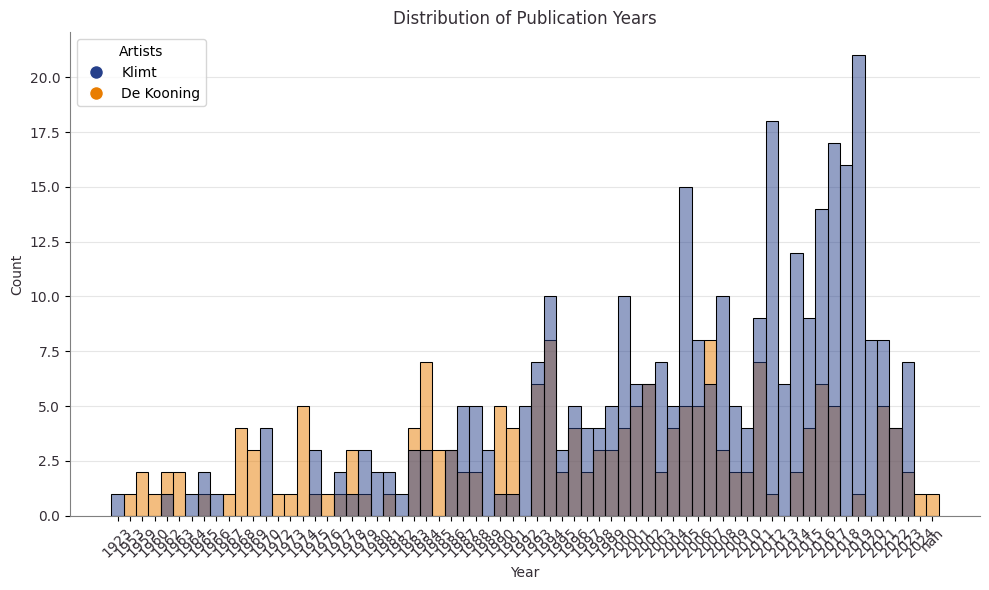

In [ ]:
# create histogram of publication per year
from matplotlib.lines import Line2D
# Concatenate the dataframes and add a 'category' column to differentiate between them
run_final_books_k = final_books_k.copy()
run_final_books_dk = final_books_dk.copy()
run_final_books_k['category'] = 'Klimt'
run_final_books_dk['category'] = 'De Kooning'
combined_df = pd.concat([run_final_books_k, run_final_books_dk])

# Sort the combined dataframe by date
combined_df = combined_df.sort_values(by="date")

# Plot the combined histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="date", hue="category", palette={'Klimt': '#26408B', 'De Kooning': '#E97D01'}, zorder=4)
plt.title("Distribution of Publication Years", color='#352f36')
plt.xlabel("Year", color='#352f36')
plt.ylabel("Count", color='#352f36')
plt.xticks(rotation=45, color='#352f36')  # Rotate the x-axis tick labels by 45 degrees
plt.yticks(color='#352f36')

plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=0)

sns.despine(right=True, top=True)

plt.tight_layout()  # Adjust layout to prevent label overlap

# Add custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#26408B', markersize=10, label='Klimt'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#E97D01', markersize=10, label='De Kooning')
]
plt.legend(handles=legend_elements, loc='upper left', title='Artists')
plt.show()




It's evident that Klimt garnered more interest starting from the 1990s. De Kooning's attention, on the other hand, remained highly variable.

In [ ]:
combined_df.to_csv('../docs/data/comparison_publication_per_year.csv')


# 3. Exhibition
## 3.1 Data Cleaning

This section checks how many bibliographic records are actually in the exhibition catalogues. Since no type of publication or genre was specified/extracted from data, we manually recognized exhibition catalogues by extracting specific keywords from the title. 

### 3.1.1 De Kooning

In [ ]:
# Create a mask for rows containing specified keywords in 'title', 'subtitle', or 'description' columns
mask = final_books_dk['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue |catalogo|exposition|retrospective|Ausstellung', case=False, na=False) 

# Create the exhibitions DataFrame containing rows where keywords are present
exhibitions_dataframe_dk = final_books_dk[mask]

# Remove the rows where keywords are present from the original DataFrame
dfbooks_dk = final_books_dk[~mask]

# Reset index of the original DataFrame
dfbooks_dk.reset_index(drop=True, inplace=True)

# Reset index of the exhibitions DataFrame
exhibitions_dataframe_dk.reset_index(drop=True, inplace=True)

print("\nExhibitions DataFrame:")
exhibitions_dataframe_dk.head()



Exhibitions DataFrame:


,title,publisher,date,isbn,Authors
0,"Hartung et les peintres lyriques : Schneider, ...",Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN
1,Willem de Kooning : drawing seeing-seeing draw...,"New York : Arena , 1998",1998,0965728080,NaN
2,École de New York : expressionnisme abstrait a...,"[Nice] : Nice musées , impr. 2005",2005,2913548695,NaN
3,"Action/abstraction : Pollock, de Kooning, and ...","New York : the Jewish museum , cop. 2008",2008,9780300122152,NaN
4,Burri : lo spazio di materia - tra Europa e US...,Città di Castello : Fondazione Palazzo Albizzi...,2016,8894063984,NaN


Spacy library has been used in order to perform Name Entity Recognition over the titles of the exhibition catalogues, to extract exhibition locations. Retrieving this kind of data could be useful to understand where or in which specific venues exhibitions have taken place. In this case we have used the ‘en_core_web_sm’ dataset because it was the most accurate one among those that we tried to use. In fact, even though dataset data is multilingual, Spacy’s multilingual dataset did not perform well on our titles. 

In [ ]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_sm")


# Process Text and Extract Location Names
def extract_location(text):
    doc = nlp(text)
    locations = [entity.text for entity in doc.ents if entity.label_ == 'GPE']
    return locations

# Apply the extract_location function to the 'title' and 'Subtitle' columns and store the result in a new column 'locations'
exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk.apply(lambda row: extract_location(row['title']), axis=1)

# Convert the list of extracted locations into a comma-separated string
exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk['Exhibit locations'].apply(lambda x: ', '.join(x))

exhibitions_dataframe_dk.to_csv('exhibitions_data_DK.csv', index=False)
exhibitions_dataframe_dk.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18472\1738927528.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk.apply(lambda row: extract_location(row['title']), axis=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\1738927528.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk['Exhibit locations'].apply(lambda x: ', '.join(x))


,title,publisher,date,isbn,Authors,Exhibit locations
0,"Hartung et les peintres lyriques : Schneider, ...",Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN,"Gottlieb, De Kooning, Degottex, Mathieu, Polke..."
1,Willem de Kooning : drawing seeing-seeing draw...,"New York : Arena , 1998",1998,0965728080,NaN,"New York, Andover, Mass., Ohio, Columbus"
2,École de New York : expressionnisme abstrait a...,"[Nice] : Nice musées , impr. 2005",2005,2913548695,NaN,Nice
3,"Action/abstraction : Pollock, de Kooning, and ...","New York : the Jewish museum , cop. 2008",2008,9780300122152,NaN,"New York, Saint Louis, Buffalo, N.Y."
4,Burri : lo spazio di materia - tra Europa e US...,Città di Castello : Fondazione Palazzo Albizzi...,2016,8894063984,NaN,"Afro, Andre, Arman, Beuys, Capograssi, Castell..."


In [ ]:
total_rows = len(final_books_dk)

# Count rows where 'title', 'subtitle', or 'description' contain specified keywords
keyword_rows = final_books_dk[final_books_dk['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False)]

# Get the count of rows containing the specified keywords
keyword_rows_count_dk = len(keyword_rows)

keyword_rows_not_count_dk = total_rows - keyword_rows_count_dk

percentage_keyword_rows_k = (keyword_rows_count_dk / total_rows) * 100

percentage_not_keyword_rows_k = ((keyword_rows_count_dk) /total_rows)* 100

data = {
    'key': ['not exhibition', 'exhibition'],
    'count': [keyword_rows_not_count_dk, keyword_rows_count_dk],
    'percentage': [percentage_not_keyword_rows_k, percentage_keyword_rows_k]
}

total_count = keyword_rows_not_count_dk + keyword_rows_count_dk
total_percentage = 100

total_row = pd.DataFrame({'key': ['Total'], 'count': [total_count], 'percentage': [total_percentage]})

# Create the DataFrame
count_exhib_percentage_dk = pd.DataFrame(data)

# Concatenate the total row DataFrame with the existing DataFrame
count_exhib_percentage_dk = pd.concat([count_exhib_percentage_dk, total_row], ignore_index=True)
count_exhib_percentage_dk


,key,count,percentage
0,not exhibition,145,17.14
1,exhibition,30,17.14
2,Total,175,100.00


### 3.1.2 Klimt

In [ ]:
total_rows = len(final_books_k)

# Count rows where 'title', 'subtitle', or 'description' contain specified keywords
keyword_rows = final_books_k[final_books_k['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False)]

# Get the count of rows containing the specified keywords
keyword_rows_count_k = len(keyword_rows)

keyword_rows_not_count_k = total_rows - keyword_rows_count_k

percentage_keyword_rows_k = (keyword_rows_count_k / total_rows) * 100

percentage_not_keyword_rows_k = ((keyword_rows_count_k) /total_rows)* 100

data = {
    'key': ['not exhibition', 'exhibition'],
    'count': [keyword_rows_not_count_k, keyword_rows_count_k],
    'percentage': [percentage_not_keyword_rows_k, percentage_keyword_rows_k]
}

total_count = keyword_rows_not_count_k + keyword_rows_count_k
total_percentage = 100

total_row = pd.DataFrame({'key': ['Total'], 'count': [total_count], 'percentage': [total_percentage]})

# Create the DataFrame
count_exhib_percentage_k = pd.DataFrame(data)

# Concatenate the total row DataFrame with the existing DataFrame
count_exhib_percentage_k = pd.concat([count_exhib_percentage_k, total_row], ignore_index=True)
count_exhib_percentage_k

,key,count,percentage
0,not exhibition,286,11.18
1,exhibition,36,11.18
2,Total,322,100.00


In [ ]:
# Assuming df is your original DataFrame

# Create a mask for rows containing specified keywords in 'title', 'subtitle', or 'description' columns
mask = final_books_k['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue |catalogo|exposition|retrospective|Ausstellung', case=False, na=False) 

# Create the exhibitions DataFrame containing rows where keywords are present
exhibitions_dataframe_k = final_books_k[mask]

# Remove the rows where keywords are present from the original DataFrame
dfbooks_k = final_books_k[~mask]

# Reset index of the original DataFrame
dfbooks_k.reset_index(drop=True, inplace=True)

# Reset index of the exhibitions DataFrame
exhibitions_dataframe_k.reset_index(drop=True, inplace=True)
exhibitions_dataframe_k.to_csv('exhibitions_data_KLI.csv', index=False)

# Display the exhibitions DataFrame containing rows where keywords are present
print("\nExhibitions DataFrame:")
exhibitions_dataframe_k.head()


Exhibitions DataFrame:


,title,publisher,date,isbn,Authors
0,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN
1,"Gustav Klimt : papiers érotiques, [exposition,...",[Paris] : Gallimard : Fondation Dina Vierny-Mu...,2005,2070118053,NaN
2,"Il simbolismo : da Moreau a Gauguin a Klimt, m...","Ferrara : Ferrara arte , impr. 2007",2007,8889793066,NaN
3,Heiliger Frühling : Gustav Klimt und die Anfän...,"Wien ; München : C. Brandstätter , 1999",1999,3854478569,NaN
4,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,9791259580344,NaN


In [ ]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_sm")

def extract_location(text):
    doc = nlp(text)
    locations = [entity.text for entity in doc.ents if entity.label_ == 'GPE']
    return locations


# Apply the extract_location function to the 'title' and  columns and store the result in a new column 'locations'
exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k.apply(lambda row: extract_location(row['title'] ), axis=1)

# Convert the list of extracted locations into a comma-separated string
exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k['Exhibit locations'].apply(lambda x: ', '.join(x))

exhibitions_dataframe_k.to_csv('exhibitions_data_KLI.csv', index=False)
exhibitions_dataframe_k.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18472\4180117119.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k.apply(lambda row: extract_location(row['title'] ), axis=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\4180117119.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k['Exhibit locations'].apply(lambda x: ', '.join(x))


,title,publisher,date,isbn,Authors,Exhibit locations
0,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN,"Vienna, Boston"
1,"Gustav Klimt : papiers érotiques, [exposition,...",[Paris] : Gallimard : Fondation Dina Vierny-Mu...,2005,2070118053,NaN,Paris
2,"Il simbolismo : da Moreau a Gauguin a Klimt, m...","Ferrara : Ferrara arte , impr. 2007",2007,8889793066,NaN,"Ferrara, Ferrara, giugno-16"
3,Heiliger Frühling : Gustav Klimt und die Anfän...,"Wien ; München : C. Brandstätter , 1999",1999,3854478569,NaN,"Farbe, Ausstellung"
4,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,9791259580344,NaN,"Piacenza, Galleria, Ricci Oddi"


## 3.2 Visualization


### 3.2.1 Distribtion of exhibition catalogue over materials

Here, we examine how many of our extracted data from the web pertain to exhibitions catalogue.

**Research question**: What is the distribution and the percentage of data extracted that are catalogues?

#### 3.2.1.1 De Kooning

In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.

# Plot the percentage of exhibition in data extracted online
# # settings
# sizes = [keyword_rows_count_dk, keyword_rows_not_count_dk]
# labels = ['Exhibitions', 'Not Exhibition']
# colors = ['#B53302','#E97D01']
# # explode = [0, 0.1]
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5)

# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in online data - De Kooning', color = '#352f36')

# plt.show()

#### 3.2.1.2 Klimt

In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.

# Plot the percentage of exhibition in data extracted online
# # settings
# sizes = [keyword_rows_count_k, keyword_rows_not_count_k]
# labels = ['Exhibitions', 'Not Exhibition']
# colors = ['#0F084B','#26408B']
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in online data - Klimt', color = '#352f36')

# plt.show()

#### 3.2.1.3 Comparing Data

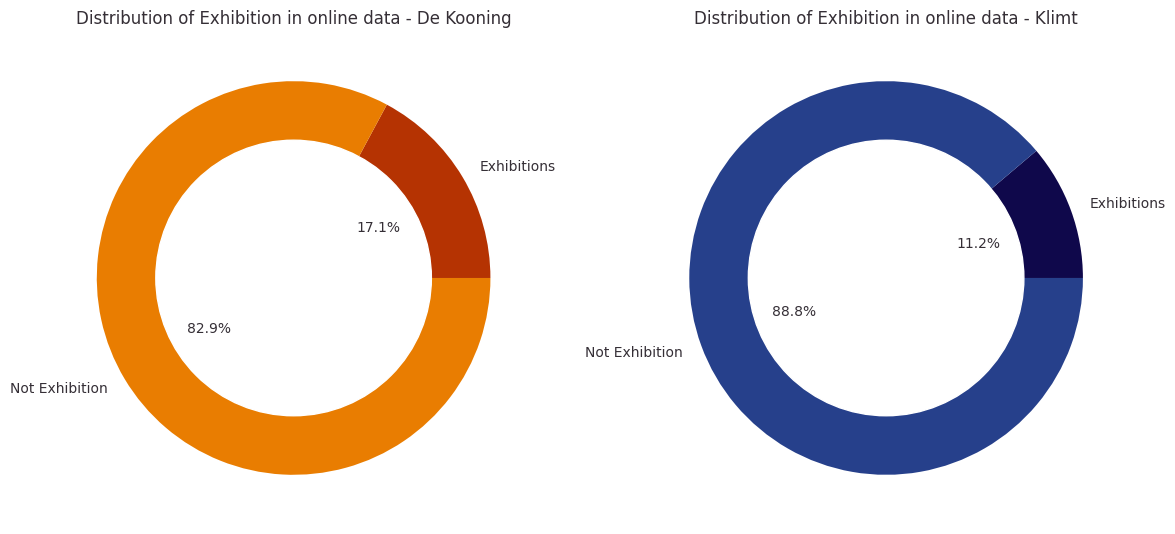

In [ ]:
# Plot the percentage of exhibition in data extracted online

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for De Kooning
sizes_dk = [keyword_rows_count_dk, keyword_rows_not_count_dk]
labels_dk = ['Exhibitions', 'Not Exhibition']
colors_dk = ['#B53302', '#E97D01']
axes[0].pie(sizes_dk, labels=labels_dk, colors=colors_dk, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[0].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[0].set_title('Distribution of Exhibition in online data - De Kooning', color='#352f36')

# Plot for Klimt
sizes_k = [keyword_rows_count_k, keyword_rows_not_count_k]
labels_k = ['Exhibitions', 'Not Exhibition']
colors_k = ['#0F084B', '#26408B']
axes[1].pie(sizes_k, labels=labels_k, colors=colors_k, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[1].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[1].set_title('Distribution of Exhibition in online data - Klimt', color='#352f36')

plt.tight_layout()
plt.show()


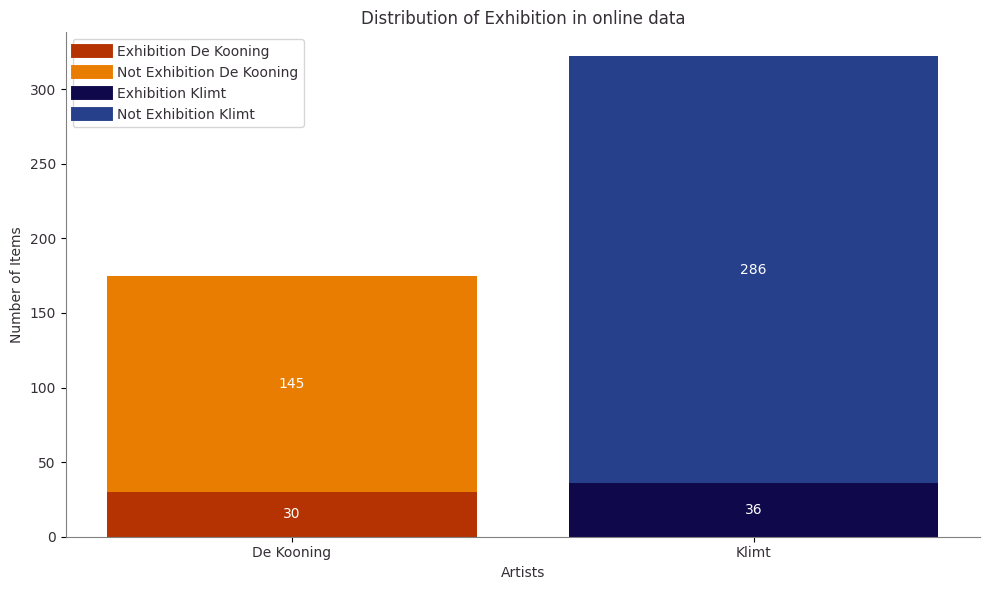

In [ ]:
# Define data
categories = ['De Kooning', 'Klimt']
exhibition_counts = [keyword_rows_count_dk, keyword_rows_count_k]
not_exhibition_counts = [keyword_rows_not_count_dk, keyword_rows_not_count_k]

# Define colors
exhibition_colors = ['#B53302', '#0F084B']
not_exhibition_colors = ['#E97D01', '#26408B']

# Create stacked bar plot
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(categories))

# Plot the bars for 'Exhibition'
bars_exhibition = plt.bar(index, exhibition_counts, color=exhibition_colors, label='Exhibition')

# Plot the bars for 'Not Exhibition' on top of 'Exhibition'
bars_not_exhibition = plt.bar(index, not_exhibition_counts, color=not_exhibition_colors, bottom=exhibition_counts, label='Not Exhibition')

# Add value labels for each bar
for i in range(len(categories)):
    plt.text(index[i], exhibition_counts[i] / 2, str(exhibition_counts[i]), color='white', ha='center', va='center')
    plt.text(index[i], exhibition_counts[i] + not_exhibition_counts[i] / 2, str(not_exhibition_counts[i]), color='white', ha='center', va='center')

plt.xlabel('Artists', color='#352f36')  # Change xlabel color
plt.ylabel('Number of Items', color='#352f36')  # Change ylabel color
plt.title('Distribution of Exhibition in online data', color='#352f36')  # Change title color
plt.xticks(index, categories, color='#352f36')  # Change xticks color
plt.yticks(color='#352f36')  # Change yticks color

# Create custom legend for both sets of bars
legend_elements = [
    Line2D([0], [0], color='#B53302', lw=10, label='Exhibition De Kooning'),
    Line2D([0], [0], color='#E97D01', lw=10, label='Not Exhibition De Kooning'),
    Line2D([0], [0], color='#0F084B', lw=10, label='Exhibition Klimt'),
    Line2D([0], [0], color='#26408B', lw=10, label='Not Exhibition Klimt')
]
legend = plt.legend(handles=legend_elements, loc='upper left')
for text in legend.get_texts():
    text.set_color('#352f36')  # Set legend label color

# Remove top and right margin
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()


The relatively consistent amount of data prompts us to consider that some patterns or insights might emerge despite the limitations.

### 3.2.2 Exhibitions per year

Here, we observe the number of exhibitions per year for one artist.

**Research question**: How many exhibitons per year of each?
#### 3.2.2.1 De Kooning


In [ ]:
# Assuming 'date' is the column name and exhibitions_dataframe_k is your DataFrame
date_counts_dk = exhibitions_dataframe_dk.groupby('date').size().reset_index(name='count')
date_counts_dk = date_counts_dk.sort_values(by='date')

# Display the DataFrame
date_counts_dk.head()

,date,count
0,1968,1
1,1969,1
2,1974,1
3,1976,1
4,1983,1


In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.

# #Plot exhhibition over time
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=date_counts_dk, x='date', y='count', color='#E97D01')
# plt.title('Exhibitions Count Over Time', color='#352f36')  # Change title color
# plt.xlabel('Date', color='#352f36')  # Change xlabel color
# plt.ylabel('Count', color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()
# plt.show()


#### 3.2.2.2 Klimt

In [ ]:
# Assuming 'date' is the column name and exhibitions_dataframe_k is your DataFrame
date_counts_k = exhibitions_dataframe_k.groupby('date').size().reset_index(name='count')
date_counts_k = date_counts_k.sort_values(by='date')

# Display the DataFrame
date_counts_k.head()

,date,count
0,1965,1
1,1966,1
2,1970,1
3,1984,1
4,1994,1


In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.


# plt.figure(figsize=(10, 6))
# sns.lineplot(data=date_counts_k, x='date', y='count', color='#26408B')
# plt.title('Exhibitions Count Over Time', color='#352f36')  # Change title color
# plt.xlabel('Date', color='#352f36')  # Change xlabel color
# plt.ylabel('Count', color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()
# plt.show()


#### 3.2.2.3 Comparing Data

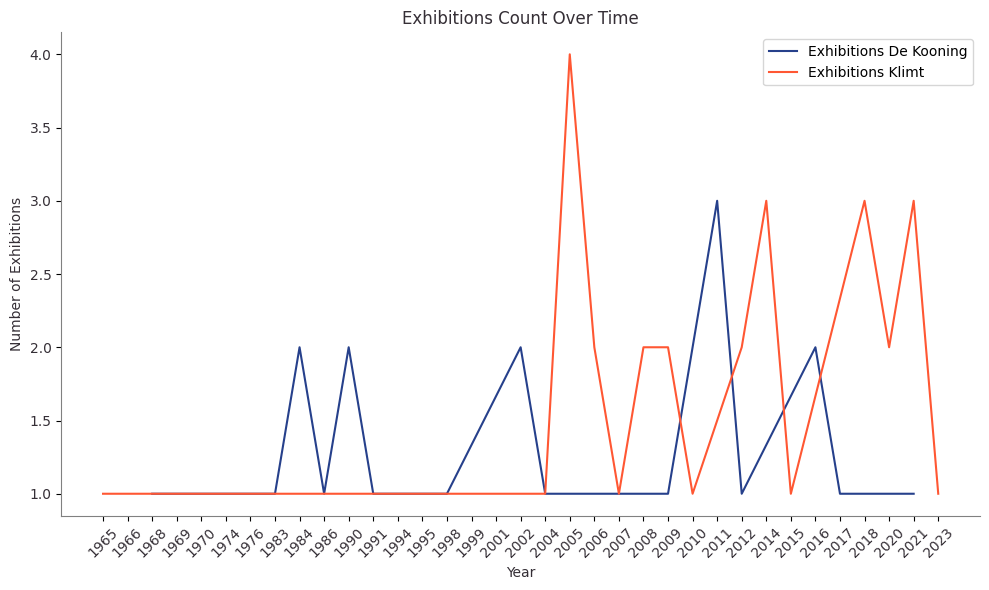

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Outer merge the DataFrames on the 'date' column
merged_df = pd.merge(date_counts_dk, date_counts_k, on='date', how='outer')

# Rename the count columns
merged_df.rename(columns={'count_x': 'Exhibitions De Kooning', 'count_y': 'Exhibitions Klimt'}, inplace=True)

# Sort by 'date'
merged_df.sort_values(by='date', inplace=True)

sns.lineplot(data=merged_df, x='date', y='Exhibitions De Kooning', color='#26408B', label='Exhibitions De Kooning')
sns.lineplot(data=merged_df, x='date', y='Exhibitions Klimt', color='#FF5733', label='Exhibitions Klimt')

plt.title('Exhibitions Count Over Time', color='#352f36')  # Change title color
plt.xlabel('Year', color='#352f36')  # Change xlabel color
plt.ylabel('Number of Exhibitions', color='#352f36')  # Change ylabel color
plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
plt.yticks(color='#352f36')  # Change yticks color

sns.despine(right=True, top=True)  # Remove top and right margin

plt.legend()
plt.tight_layout()
plt.show()



The available data is quite limited, making it challenging to extract meaningful insights.

In [ ]:
merged_df.to_csv('../docs/data/comparison_exhibition_per_year.csv')

### 3.2.3 Publication and Exhibitions per Year
Here we explore the relationship between data coming from section bibliography and exhibitions
**Research question**: How many publication and Exhibition per year?

In [ ]:
# Exhibitions per year

exhibtion_date_count = date_counts_dk.sort_values(by="date")
exhibtion_date_count.head()

,date,count
0,1968,1
1,1969,1
2,1974,1
3,1976,1
4,1983,1


In [ ]:
final_books_dk

import pandas as pd

# Drop rows with 'nan' strings in the 'date' column
final_books_dk = final_books_dk[final_books_dk['date'] != 'nan']

# Convert the "date" column to integers
final_books_dk['date'] = final_books_dk['date'].astype(int)

# Count the values in the 'date' column
date_counts = final_books_dk['date'].value_counts().reset_index()

# Rename the columns
date_counts.columns = ['date', 'count']

publication_date_count = date_counts.sort_values(by="date")
publication_date_count.head()


,date,count
45,1953,1
35,1959,2
42,1960,1
30,1962,2
37,1963,2


In [ ]:
# merge publication_date_count and exhibition_date count
# Merge the DataFrames on the 'year' column
# Convert columns to integers if they are not already
publication_date_count['date'] = publication_date_count['date'].astype(int)
exhibtion_date_count['date'] = exhibtion_date_count['date'].astype(int)

# Merge the DataFrames on the 'year' column
merged_data = pd.merge(publication_date_count, exhibtion_date_count, on='date', suffixes=('_publication', '_exhibition'), how='inner')

# Drop rows with any NaN values
merged_data = merged_data.dropna()


merged_data


,date,count_publication,count_exhibition
0,1968,4,1
1,1969,3,1
2,1974,5,1
3,1976,1,1
4,1983,4,1
5,1984,7,2
6,1986,3,1
7,1990,5,2
8,1991,4,1
9,1994,8,1


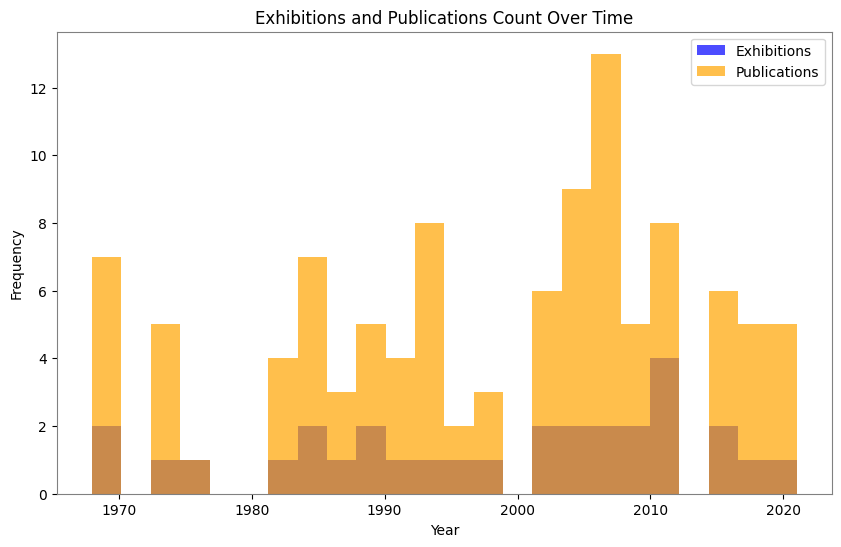

In [ ]:
# RICONTROLLA
# Plotting histograms for count of exhibitions and count of publications on the same graph
plt.figure(figsize=(10, 6))

# Plot histogram for count of exhibitions
plt.hist(merged_data['date'], bins=merged_data['date'].nunique(), weights=merged_data['count_exhibition'], color='blue', alpha=0.7, label='Exhibitions')

# Plot histogram for count of publications
plt.hist(merged_data['date'], bins=merged_data['date'].nunique(), weights=merged_data['count_publication'], color='orange', alpha=0.7, label='Publications')

plt.title('Exhibitions and Publications Count Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

plt.show()


There appears to be no clear correlation between the frequency of exhibitions and publications over time.

# 4. De Kooning - a "ground truth" case

It exists a web site of De Kooning storing many data about this author, between this also exhibitions and publications. Therefore, we decided to use it as a "Ground truth", a dataset that can be compared with the data extracted from the web to see how much they and our approach can be trusted.
## 4.1 Data Mining
### Complete list of De Kooning's one-man exibitions. 
In our research we considered also the number of exibitions and the venue of the exibitions as parameters in order to check whether the reputation of the artist has changed over the years. However, no complete dataset on artists' exhibitions was found. In order to get an idea on how many exibitions have been covered on catalogues, and, in particular, how many exhibitions are traced by bibliographic records on BnF and Gallica, we needed a "ground truth" to state if those sources of information could be somehow comprehensive. 

The case study is Willem de Kooning, since all data about exibitions are uploaded on the website of the Willem de Kooning Foundation. 
The result of the webscraping are shown here, with a total of 131 exhibitions, 81 possess a catalogue. 

In bibliography_DK.ipynb extraction from SPARQL endpoint of BnF and Google Books API has been done in order to get all bibliographic records on De Kooning - 31 of them are records on exhibitions. So 39% of exibitions with catalogue are present in that dataset, 23% of the total exhibitions are covered. There's also the need to say that the bibliographic records extracted do not concern only one-man shows, so they include further shows that are not present in the dataset reported here below. 


### 4.1.1 Exhibition

In [ ]:
import requests 
from bs4 import BeautifulSoup as bs 

URLs = [
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1940',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1950',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1960',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1970',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1980',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1990',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/2000',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/2010'
] 

titles_list = []

for url in URLs: 
    req = requests.get(url) 
    soup = bs(req.text, 'html.parser') 
    
    titles = soup.find_all('p', class_="unit_title spacing_03") 
    
    for title in titles:
        titles_list.append(title.text.strip().replace("\xa0\n", ";").replace("\xa0", ";").replace('\n',';'))


titles_list

['de Kooning;Charles Egan Gallery, New York, New York, (4/12/1948 to 5/12/1948), no catalogue.',
 'Willem de Kooning;Charles Egan Gallery, New York, New York, (4/1/1951 to 4/30/1951), no catalogue.',
 'Willem de Kooning:  Paintings on the Theme of the Woman;Sidney Janis Gallery, New York, New York, (3/16/1953 to 4/11/1953), no catalogue.',
 'Retrospective (de Kooning, 1935-53);Organized by School of the Museum of Fine Arts, Boston, Massachusetts, (4/21/1953 to 7/3/1953), catalogue.',
 'Recent Oils by Willem de Kooning;Martha Jackson Gallery, New York, New York, (11/9/1955 to 12/3/1955), catalogue.',
 'Willem de Kooning:  Recent Paintings;Sidney Janis Gallery, New York, New York, (4/2/1956 to 4/28/1956), no catalogue.',
 'Willem de Kooning;Sidney Janis Gallery, New York, New York, (5/4/1959 to 6/1/1959), no catalogue.',
 'Willem de Kooning;Paul Kantor Gallery, Beverly Hills, California, (4/3/1961 to 4/29/1961), catalogue.',
 'Recent Paintings by Willem de Kooning;Sidney Janis Gallery, N

In [ ]:
replacements = {
    "Inc.": "Inc.",
    "and": "and",
    "Science": "Science",
    "Ontario": "",
    "The": "The",
    "Palazzo": "Palazzo",
    "Droll": "Droll",
    "Fourcade": " Fourcade",
    "University": "University",
    "Ishibashi": "Ishibashi",
    "Smithsonian": "Smithsonian",
    "Millbrook": "Millbrook",
    "Seattle": " Seattle",
    "World": "World",
    "Carnegie": "Carnegie",
    "Akademie ": "Akademie ",
    "Berkeley": "Berkeley",
    "Wellesley": "Wellesley",
    "Mitchell-Innes": "Mitchell-Innes",
    "Art": "Art",
    "Colorado": "Colorado"
}

new_list = []

# Iterate through each string in the original list
for item in titles_list:
    # Replace ';(' with ' ('
    item = item.replace(';(', ' (')
    
    # Find the index of the first occurrence of "catalogue." or "brochure."
    catalogue_index = item.find("catalogue.")
    brochure_index = item.find("brochure.")
    
    # Determine the index of the first occurrence among "catalogue." and "brochure."
    if catalogue_index != -1 and brochure_index != -1:
        first_occurrence_index = min(catalogue_index, brochure_index)
    elif catalogue_index != -1:
        first_occurrence_index = catalogue_index
    elif brochure_index != -1:
        first_occurrence_index = brochure_index
    else:
        first_occurrence_index = len(item)
    
    # Slice the string up to the first occurrence
    item = item[:first_occurrence_index + len("catalogue.")]
    
    parts = item.split(';')

    if len(parts) == 2:
        second_part = parts[1]
        # Iterate through each keyword in the replacements dictionary
        for keyword, replacement in replacements.items():
            if ", " in second_part and keyword in second_part:
                # Get the index of the keyword
                keyword_index = second_part.index(keyword)
                # Get the index of the last ", " before the keyword
                comma_index = second_part.rfind(", ", 0, keyword_index)
                # Replace ", " with " " before the keyword
                if comma_index != -1:  # Ensure ", " was found before the keyword
                    second_part = second_part[:comma_index] + " " + second_part[comma_index + 2:]
                # Replace the keyword with the corresponding replacement
                second_part = second_part.replace(keyword, replacement)
        # Split the second part (after ';') by ','
        second_parts = second_part.split(',')
        # Remove the third element if the length is greater than 5
        if len(second_parts) > 5:
            del second_parts[1]
        # Create a sublist with the first part and the second parts
        sublist = [parts[0]] + second_parts
        # Append the sublist to the new list
        new_list.append(sublist)

print(new_list)


[['de Kooning', 'Charles Egan Gallery', ' New York', ' New York', ' (4/12/1948 to 5/12/1948)', ' no catalogue.'], ['Willem de Kooning', 'Charles Egan Gallery', ' New York', ' New York', ' (4/1/1951 to 4/30/1951)', ' no catalogue.'], ['Willem de Kooning:  Paintings on the Theme of the Woman', 'Sidney Janis Gallery', ' New York', ' New York', ' (3/16/1953 to 4/11/1953)', ' no catalogue.'], ['Retrospective (de Kooning, 1935-53)', 'Organized by School of the Museum of Fine Arts', ' Boston', ' Massachusetts', ' (4/21/1953 to 7/3/1953)', ' catalogue.'], ['Recent Oils by Willem de Kooning', 'Martha Jackson Gallery', ' New York', ' New York', ' (11/9/1955 to 12/3/1955)', ' catalogue.'], ['Willem de Kooning:  Recent Paintings', 'Sidney Janis Gallery', ' New York', ' New York', ' (4/2/1956 to 4/28/1956)', ' no catalogue.'], ['Willem de Kooning', 'Sidney Janis Gallery', ' New York', ' New York', ' (5/4/1959 to 6/1/1959)', ' no catalogue.'], ['Willem de Kooning', 'Paul Kantor Gallery', ' Beverly H

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initialize empty lists for each column
exhibition = []
venue = []
city = []
state = []
date = []
catalogue = []

# Populate the lists from the data in x
for i in new_list:
    if len(i) >= 6:
        exhibition.append(i[0])
        venue.append(i[1])
        city.append(i[2])
        state.append(i[3])
        date.append(i[4])
        catalogue.append(i[5])


exhibition_one_date_df_website = pd.DataFrame(columns=["Exhibition_name", "Venue", "City", 'State', 'date', 'catalogue'])

exhibition_one_date_df_website['Exhibition_name'] = exhibition
exhibition_one_date_df_website['Venue'] = venue
exhibition_one_date_df_website['City'] = city
exhibition_one_date_df_website['State'] = state
exhibition_one_date_df_website['date'] = date
exhibition_one_date_df_website['catalogue'] = catalogue

for i, item in enumerate(exhibition_one_date_df_website['catalogue']): #modificato oggi
    if "." in item:
        x = item.split('.')
        exhibition_one_date_df_website.at[i, 'catalogue'] = x[0]

exhibition_one_date_df_website.head()

,Exhibition_name,Venue,City,State,date,catalogue
0,de Kooning,Charles Egan Gallery,New York,New York,(4/12/1948 to 5/12/1948),no catalogue
1,Willem de Kooning,Charles Egan Gallery,New York,New York,(4/1/1951 to 4/30/1951),no catalogue
2,Willem de Kooning: Paintings on the Theme of ...,Sidney Janis Gallery,New York,New York,(3/16/1953 to 4/11/1953),no catalogue
3,"Retrospective (de Kooning, 1935-53)",Organized by School of the Museum of Fine Arts,Boston,Massachusetts,(4/21/1953 to 7/3/1953),catalogue
4,Recent Oils by Willem de Kooning,Martha Jackson Gallery,New York,New York,(11/9/1955 to 12/3/1955),catalogue


In [ ]:
import pandas as pd

for i, item in enumerate(exhibition_one_date_df_website['date']):

    parts = item.strip('()').split(' to ')
    modified_dates = []
    for date_str in parts:
        if "??/??" in date_str:
            month_and_year = date_str.split('/')[-1]  # Extract month and year
            modified_date = "01/01/" + month_and_year  # Replace day with "01"
            modified_dates.append(modified_date)
        elif '??' in date_str:
            month_and_year = date_str.split('/')[0] + '/01/' + date_str.split('/')[-1]
            modified_dates.append(month_and_year)
        else:
            modified_dates.append(date_str)
    exhibition_one_date_df_website.at[i, 'date'] = ' to '.join(modified_dates)
    

def extract_starting_range(date_str):
    # Split the date range string by ' to ' or '-'
    dates = date_str.strip('( )').split(' to ')
    if len(dates) == 1:  # If ' to ' is not found, try splitting by '-'
        dates = date_str.strip('( )').split('\u2013')
    if len(dates) < 2:
        return None  
    
    starting_date = dates[0]
    
    # Convert the starting date to datetime format and extract the date part
    return pd.to_datetime(starting_date, errors='coerce').date()


def extract_ending_range(date_str):
    dates = date_str.strip('( )').split(' to ')
    if len(dates) == 1:  # If ' to ' is not found, try splitting by '-'
        dates = date_str.strip('( )').split('\u2013')
    if len(dates) < 2:
        return None  
    ending_date = dates[1]
    
    # Convert the ending date to datetime format and extract the date part
    return pd.to_datetime(ending_date, errors='coerce').date()

exhibition_df_website = exhibition_one_date_df_website.copy()
# Apply the function to the 'date' column to create a new column with datetime objects
exhibition_df_website['startingdate'] = exhibition_df_website['date'].apply(extract_starting_range)
exhibition_df_website['endingdate'] = exhibition_df_website['date'].apply(extract_ending_range)



exhibition_df_website.reset_index(drop=True, inplace=True)

# df.drop('date', axis=1, inplace=True)

# Display the filtered DataFrame
exhibition_df_website.head()



,Exhibition_name,Venue,City,State,date,catalogue,startingdate,endingdate
0,de Kooning,Charles Egan Gallery,New York,New York,(4/12/1948 to 5/12/1948,no catalogue,1948-04-12,1948-05-12
1,Willem de Kooning,Charles Egan Gallery,New York,New York,(4/1/1951 to 4/30/1951,no catalogue,1951-04-01,1951-04-30
2,Willem de Kooning: Paintings on the Theme of ...,Sidney Janis Gallery,New York,New York,(3/16/1953 to 4/11/1953,no catalogue,1953-03-16,1953-04-11
3,"Retrospective (de Kooning, 1935-53)",Organized by School of the Museum of Fine Arts,Boston,Massachusetts,(4/21/1953 to 7/3/1953,catalogue,1953-04-21,1953-07-03
4,Recent Oils by Willem de Kooning,Martha Jackson Gallery,New York,New York,(11/9/1955 to 12/3/1955,catalogue,1955-11-09,1955-12-03


### 4.1.2 Monograph

In [ ]:
import requests 
from bs4 import BeautifulSoup as bs 

URLs = [
    'https://www.dekooning.org/the-artist/bibliography/monographs/1950',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1960',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1970',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1980',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1990',
    'https://www.dekooning.org/the-artist/bibliography/monographs/2000',
    'https://www.dekooning.org/the-artist/bibliography/monographs/2010',
    'https://www.dekooning.org/the-artist/bibliography/monographs/2020'
] 

titles_li = []

for url in URLs: 
    req = requests.get(url) 
    soup = bs(req.text, 'html.parser') 
    
    titles = soup.find_all('div', class_="unit_copy spacing_03") 
    
    for title in titles:
        titles_li.append(title.text.strip().replace("\xa0\n", ";").replace("\xa0", ";").replace('\n',';').replace('\t', '').replace(':;;', ': ').replace(";;With", " With")) 

titles_li



['Greenberg, Clement.;;de Kooning, 1935-53.;;Exh. cat.;;Boston: School of the Museum of Fine Arts,;;1953.',
 'Recent Oils by Willem de Kooning. With a foreword by Kenneth B. Sawyer.;;Exh. cat.;;New York: Martha Jackson Gallery,;;1955.',
 'Hess, Thomas B.;;Willem de Kooning.;;The Great American Artists Series.;;New York: George Braziller,;;1959.',
 'Janis, Harriet, and Rudi Blesh.;;de Kooning.;;New York: Grove Press,;;1960.',
 'Odets, Clifford.;;Willem de Kooning.;;Exh. cat.;;Beverly Hills: Paul Kantor Gallery,;;1961.',
 'Hess, Thomas B.;;Recent Paintings by Willem de Kooning.;;Exh. cat.;;New York: Sidney Janis Gallery,;;1962.',
 "Goodman, Merle.;;'Woman' Drawings by Willem de Kooning.;;Exh. cat.;;Buffalo: James Goodman Gallery,;;1964.",
 'Willem de Kooning: Retrospective, Drawings, 1936-1963.;;Exh. cat.;;New York: Allan Stone Gallery,;;1964.',
 'Ashton, Dore, and Willem de Kooning.;;Willem de Kooning.;;Exh. cat.;;Northampton: Smith College Museum of Art,;;1965.',
 'de Kooning/Cornell.;

In [ ]:
import re
new_li = []

# Iterate through each string in the original list
for item in titles_li:

# Split the string 'item' using either ';;' or ', 1' as the delimiter
    parts = re.split(r';;|; ;', item)

    new_li.append(parts)

print(new_li)

[['Greenberg, Clement.', 'de Kooning, 1935-53.', 'Exh. cat.', 'Boston: School of the Museum of Fine Arts,', '1953.'], ['Recent Oils by Willem de Kooning. With a foreword by Kenneth B. Sawyer.', 'Exh. cat.', 'New York: Martha Jackson Gallery,', '1955.'], ['Hess, Thomas B.', 'Willem de Kooning.', 'The Great American Artists Series.', 'New York: George Braziller,', '1959.'], ['Janis, Harriet, and Rudi Blesh.', 'de Kooning.', 'New York: Grove Press,', '1960.'], ['Odets, Clifford.', 'Willem de Kooning.', 'Exh. cat.', 'Beverly Hills: Paul Kantor Gallery,', '1961.'], ['Hess, Thomas B.', 'Recent Paintings by Willem de Kooning.', 'Exh. cat.', 'New York: Sidney Janis Gallery,', '1962.'], ['Goodman, Merle.', "'Woman' Drawings by Willem de Kooning.", 'Exh. cat.', 'Buffalo: James Goodman Gallery,', '1964.'], ['Willem de Kooning: Retrospective, Drawings, 1936-1963.', 'Exh. cat.', 'New York: Allan Stone Gallery,', '1964.'], ['Ashton, Dore, and Willem de Kooning.', 'Willem de Kooning.', 'Exh. cat.', '

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initialize empty lists for each column
author = []
title = []
type = []
publisher = []
date = []

# Populate the lists from the data in x
for i in new_li:
    if len(i) == 5:
        author.append(i[0])
        title.append(i[1])
        if 'Exh.' in  i[2]  or 'PhD ' in i[2] or 'Series' in i[2]:
            type.append(i[2])
        else:
            type.append('')
        publisher.append(i[3])
        date.append(i[4])
    elif len(i) ==4:
        if 'de Kooning' in i[1]:
            author.append(i[0])
            title.append(i[1])
            type.append('')
            publisher.append(i[2])
            date.append(i[3])
        elif 'de Kooning' in i[0] :
            author.append('')
            title.append(i[0])
            type.append(i[1])
            publisher.append(i[2])
            date.append(i[3])
        
        

# Create DataFrame
pubblication_df_website = pd.DataFrame({"author": author, "title": title, "type": type, 'publisher': publisher, 'date': date})
pubblication_df_website['publisher'] = pubblication_df_website['publisher'].str.split(',').str[0]
pubblication_df_website['date'] = pubblication_df_website['date'].str.extract(r'(\d{4})')

pubblication_df_website.head()


,author,title,type,publisher,date
0,"Greenberg, Clement.","de Kooning, 1935-53.",Exh. cat.,Boston: School of the Museum of Fine Arts,1953
1,,Recent Oils by Willem de Kooning. With a forew...,Exh. cat.,New York: Martha Jackson Gallery,1955
2,"Hess, Thomas B.",Willem de Kooning.,The Great American Artists Series.,New York: George Braziller,1959
3,"Janis, Harriet, and Rudi Blesh.",de Kooning.,,New York: Grove Press,1960
4,"Odets, Clifford.",Willem de Kooning.,Exh. cat.,Beverly Hills: Paul Kantor Gallery,1961


## 4.2 Visualization
In this section we try to see the actual representativeness of the data extracted from the web for what concers the publications and the exhibition catalogues of De Kooning. The specific **reserch questions** will be:

- How many Exhibitions catalogue are in the web site? How much this value differs from the data obtained?


### 4.2.1 Different coverage of Data

We already calculated the value of data on web

In [ ]:
#This code shows the plot of the above mentioned data.
#To make the notebook lighter we live it as not automatically runned
#To show it de comment the cell.

# # Plot the percentage of exhibition in data extracted online
# # settings
# sizes = [keyword_rows_count_dk, keyword_rows_not_count_dk]
# labels = ['Exhibitions', 'Not Exhibition']
# colors = ['#B53302','#E97D01']
# # explode = [0, 0.1]
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5)

# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in online data - De Kooning', color = '#352f36')

# plt.show()

We perform the same calculation on data coming from the web site

In [ ]:
# Percentage of  catalogue in bibliographic data
# Filter rows where 'type' is 'exh.cat'
exh_cat_df = pubblication_df_website[pubblication_df_website['type'] == 'Exh. cat.']

# Count of all other rows
other_count = len(pubblication_df_website) - len(exh_cat_df)

# Create a new DataFrame with counts
exhibition_in_bibl_count_df = pd.DataFrame({'type': ['Exh. cat.', 'others'], 'count': [len(exh_cat_df), other_count]})

# Display the result DataFrame
exhibition_in_bibl_count_df

,type,count
0,Exh. cat.,102
1,others,42


In [ ]:
# Exhibitions in web
exhibitions_in_site = exhibition_in_bibl_count_df['count'][0]
other_in_site = exhibition_in_bibl_count_df['count'][1]

exhibitions_in_site

102

In [ ]:
#This code shows the plot of the above mentioned data.
#To make the notebook lighter we live it as not automatically runned
#To show it de comment the cell.

# # settings
# sizes = [exhibitions_in_site, other_in_site]
# labels = ['Exhibitions cat. in website', 'Other texts']
# colors = ['#B53302','#E97D01']
# # explode = [0, 0.1]
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})

# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in Foundation data', color = '#352f36')

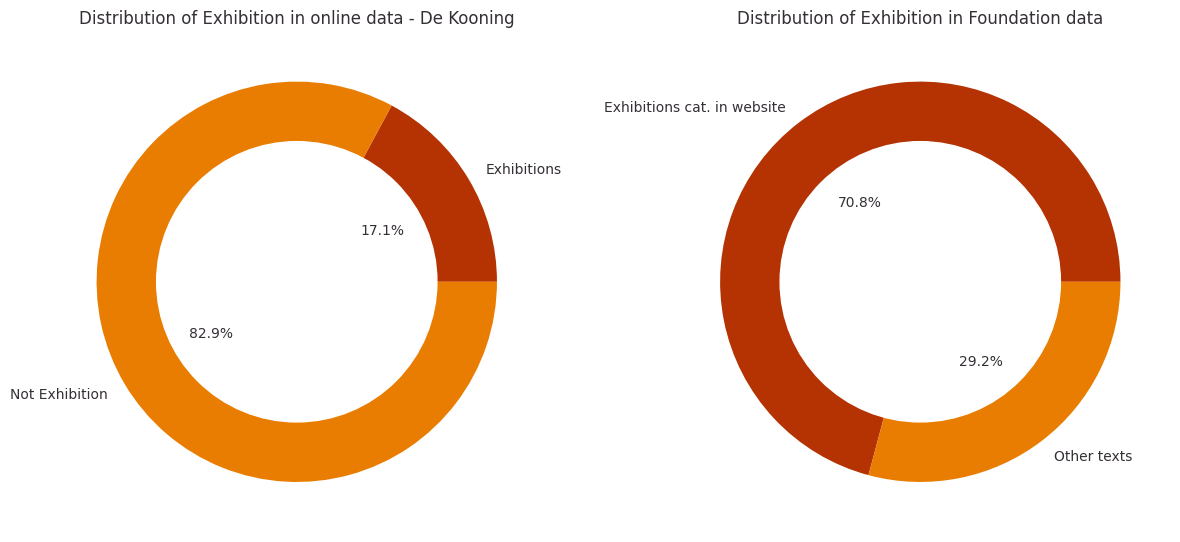

In [ ]:
# Plot the percentage of exhibition in data extracted online

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for De Kooning
sizes_dk = [keyword_rows_count_dk, keyword_rows_not_count_dk]
labels_dk = ['Exhibitions', 'Not Exhibition']
colors_dk = ['#B53302', '#E97D01']
axes[0].pie(sizes_dk, labels=labels_dk, colors=colors_dk, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[0].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[0].set_title('Distribution of Exhibition in online data - De Kooning', color='#352f36')

# Plot for Klimt
sizes_k = sizes = [exhibitions_in_site, other_in_site]
labels_k = ['Exhibitions cat. in website', 'Other texts']
colors_k = ['#B53302', '#E97D01']
axes[1].pie(sizes_k, labels=labels_k, colors=colors_k, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[1].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[1].set_title('Distribution of Exhibition in Foundation data', color='#352f36')

plt.tight_layout()
plt.show()

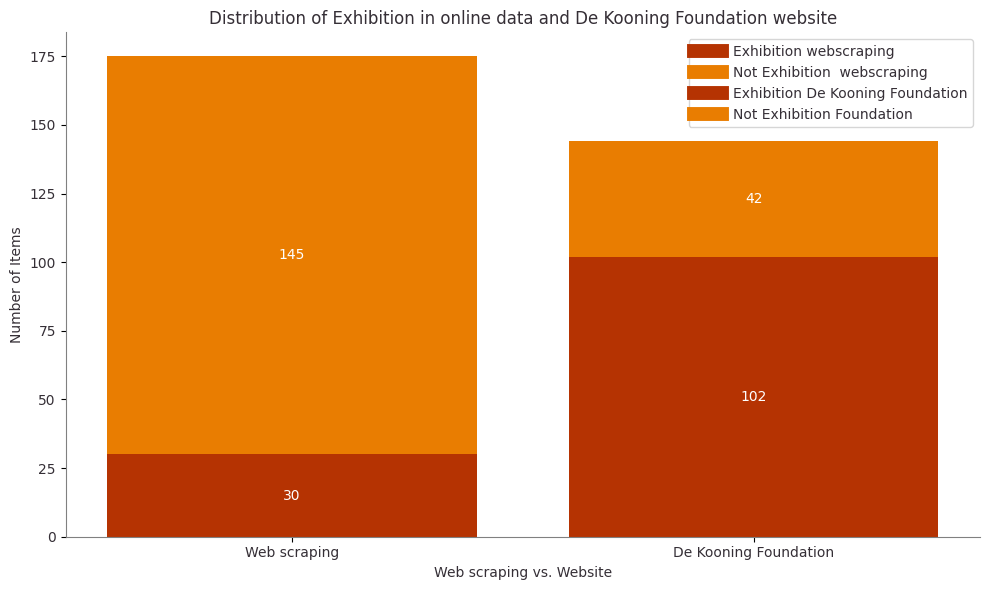

In [ ]:
# Define data
categories = ['Web scraping', 'De Kooning Foundation']
exhibition_counts = [keyword_rows_count_dk, exhibitions_in_site]
not_exhibition_counts = [keyword_rows_not_count_dk, other_in_site]

# Define colors
exhibition_colors = ['#B53302', '#B53302']
not_exhibition_colors = ['#E97D01', '#E97D01']

# Create stacked bar plot
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(categories))

# Plot the bars for 'Exhibition'
bars_exhibition = plt.bar(index, exhibition_counts, color=exhibition_colors, label='Exhibition')

# Plot the bars for 'Not Exhibition' on top of 'Exhibition'
bars_not_exhibition = plt.bar(index, not_exhibition_counts, color=not_exhibition_colors, bottom=exhibition_counts, label='Not Exhibition')

# Add value labels for each bar
for i in range(len(categories)):
    plt.text(index[i], exhibition_counts[i] / 2, str(exhibition_counts[i]), color='white', ha='center', va='center')
    plt.text(index[i], exhibition_counts[i] + not_exhibition_counts[i] / 2, str(not_exhibition_counts[i]), color='white', ha='center', va='center')

plt.xlabel('Web scraping vs. Website', color='#352f36')  # Change xlabel color
plt.ylabel('Number of Items', color='#352f36')  # Change ylabel color
plt.title('Distribution of Exhibition in online data and De Kooning Foundation website', color='#352f36')  # Change title color
plt.xticks(index, categories, color='#352f36')  # Change xticks color
plt.yticks(color='#352f36')  # Change yticks color

# Create custom legend for both sets of bars
legend_elements = [
    Line2D([0], [0], color='#B53302', lw=10, label='Exhibition webscraping'),
    Line2D([0], [0], color='#E97D01', lw=10, label='Not Exhibition  webscraping'),
    Line2D([0], [0], color='#B53302', lw=10, label='Exhibition De Kooning Foundation'),
    Line2D([0], [0], color='#E97D01', lw=10, label='Not Exhibition Foundation')
]
legend = plt.legend(handles=legend_elements, loc='upper right')
for text in legend.get_texts():
    text.set_color('#352f36')  # Set legend label color

# Remove top and right margin
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()


The disparity in distribution and proportion of our data suggests that our web scraping method may not be effective, as not all exhibition catalogues contain the word or similar terms in their title.

### 4.2.2 Pubblication per year

In [ ]:
#publications per year in website
# Get the count of each unique year
count_series = pubblication_df_website['date'].value_counts()

# Convert the Series to a DataFrame
pubblication_per_year_website_df = count_series.reset_index()

# Rename the columns to 'year' and 'count'
pubblication_per_year_website_df.columns = ['date', 'count']

# Sort the DataFrame by the 'year' column
result_df = pubblication_per_year_website_df.sort_values(by='date')

result_df.reset_index(drop=True, inplace=True)
pubblication_per_year_website_df.head()


,date,count
0,1995,6
1,1978,6
2,2006,5
3,1975,5
4,1984,5


In [ ]:
# Exhibitions with catalogue per year

# Drop rows where 'date' column has value 'Exh. cat'
new_publication_df_website = pubblication_df_website[pubblication_df_website['type'] != 'Exh. cat.']
new_publication_df_website

# Get the count of each unique year
count_series = new_publication_df_website['date'].value_counts()

# Convert the Series to a DataFrame
result_df_no_cat = count_series.reset_index()

# Rename the columns to 'year' and 'count'
result_df_no_cat.columns = ['date', 'count']

# Sort the DataFrame by the 'year' column
result_df_no_cat = result_df_no_cat.sort_values(by='date')

result_df_no_cat

result_df_no_cat.reset_index(drop=True, inplace=True)

result_df_no_cat

,date,count
0,1959,1
1,1960,1
2,1971,1
3,1972,2
4,1973,2
5,1975,1
6,1976,1
7,1982,1
8,1983,1
9,1985,2


In [ ]:
# Exhibition in website per year
# Concatenate 'startingdate' and 'endingdate' columns to create a single column containing all dates

timeline_df = exhibition_df_website.copy()
timeline_df['startingdate'] = pd.to_datetime(timeline_df['startingdate'])
timeline_df['endingdate'] = pd.to_datetime(timeline_df['endingdate'])
timeline_df['diff'] = timeline_df['endingdate'] - timeline_df['startingdate']

all_dates = pd.concat([timeline_df['startingdate'], timeline_df['endingdate']])

# Extract the year from each date
all_years = pd.to_datetime(all_dates).dt.year

# Count the occurrences of each year
year_counts = all_years.value_counts().sort_index()

# Convert year_counts Series to DataFrame
year_counts_df = pd.DataFrame({'Year': year_counts.index, 'count': year_counts.values})



year_counts_df.head()

,Year,count
0,1948.00,2
1,1951.00,2
2,1953.00,4
3,1955.00,2
4,1956.00,2


## 4.3 Correlation ground truth
**Research question**: Is there a correlation between publication and exhibition in our data?

In [ ]:
# compare exhibition and pubblication 
import pandas as pd

# Ensure 'date' column in df_1 is integer
result_df_no_cat['date'] = result_df_no_cat['date'].astype(int)

# Ensure 'Year' column in df_2 is integer
year_counts_df['Year'] = year_counts_df['Year'].astype(int)

# Merge the dataframes with suffixes
merged_df_no_cat = pd.merge(result_df_no_cat, year_counts_df, how='outer', left_on='date', right_on='Year', suffixes=('_df1', '_df2'))

# Substitute values in 'date' column with values from 'Year' column
merged_df_no_cat['date'] = merged_df_no_cat['date'].fillna(merged_df_no_cat['Year'])

# Convert the 'date' column back to integer type
merged_df_no_cat['date'] = merged_df_no_cat['date'].astype(int)

# Sort values based on date
merged_df_no_cat.sort_values(by='date', inplace=True)

# Drop the 'Year' column as it's no longer needed
merged_df_no_cat.drop(columns=['Year'], inplace=True)

merged_df_no_cat.fillna(0, inplace=True)

merged_df_no_cat.head()


,date,count_df1,count_df2
30,1948,0.00,2.00
31,1951,0.00,2.00
32,1953,0.00,4.00
33,1955,0.00,2.00
34,1956,0.00,2.00


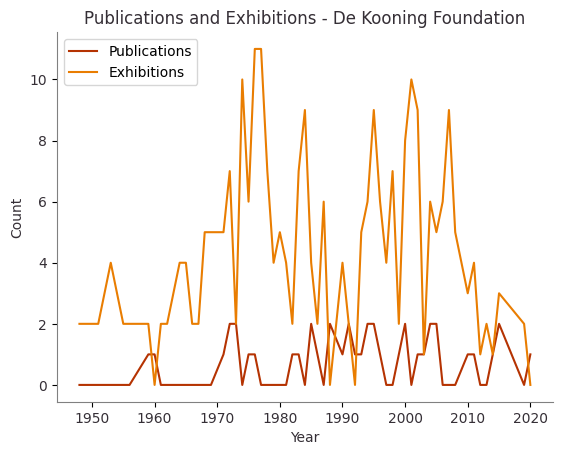

In [ ]:
# Plot line for count_df1
plt.plot(merged_df_no_cat['date'], merged_df_no_cat['count_df1'], label='Publications', color='#B53302')

# Plot line for count_df2
plt.plot(merged_df_no_cat['date'], merged_df_no_cat['count_df2'], label='Exhibitions', color='#E97D01')

# Add labels and title
plt.xlabel('Year', color='#352f36')
plt.ylabel('Count', color='#352f36')
plt.title('Publications and Exhibitions - De Kooning Foundation', color='#352f36')

# Add legend
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change color of ticks
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Show plot
plt.show()


In [ ]:
# compare exhibition and pubblication 
import pandas as pd

# Ensure 'date' column in df_1 is integer
result_df['date'] = result_df['date'].astype(int)

# Ensure 'Year' column in df_2 is integer
year_counts_df['Year'] = year_counts_df['Year'].astype(int)

# Merge the dataframes with suffixes
merged_df = pd.merge(result_df, year_counts_df, how='outer', left_on='date', right_on='Year', suffixes=('_df1', '_df2'))

# Substitute values in 'date' column with values from 'Year' column
merged_df['date'] = merged_df['date'].fillna(merged_df['Year'])

# Convert the 'date' column back to integer type
merged_df['date'] = merged_df['date'].astype(int)

# Sort values based on date
merged_df.sort_values(by='date', inplace=True)

# Drop the 'Year' column as it's no longer needed
merged_df.drop(columns=['Year'], inplace=True)

merged_df.fillna(0, inplace=True)

merged_df.head()

,date,count_df1,count_df2
56,1948,0.00,2.00
57,1951,0.00,2.00
0,1953,1.00,4.00
1,1955,1.00,2.00
58,1956,0.00,2.00


# 5. Conclusion

## Conclusions

Our conclusions indicate that there is no correlation between publication, exhibition, and auctions based on our data analysis. Possible reasons for this could include:
- Insufficient data: The analysis may have been conducted with an inadequate amount of data. Both quantitative and qualitative data in larger quantities may be required to draw more accurate conclusions.
- Incorrect variables: It's possible that the variables chosen for analysis are not the most appropriate for measuring reputation in the art world. Reconsidering the selection of variables may be necessary.
- Lack of actual correlation: even if the chosen variables are correct, it's plausible that there simply isn't a significant correlation between publication, exhibition, and auction success in terms of an artist's reputation. This suggests that these aspects of an artist's career may operate independently of each other when it comes to determining reputation.

Other parameters that could have been taken into consideration are:
- Buyers and sellers in the auction records if they’re contained in the original dataset.
- The art historians that have talked about the artist and if they have influenced the other variables in some way
- Venues in which the artworks are present, in particular considering also the prestige of the venue. 
- Expand the research considering scientific articles and not only monographs or exhibition catalogues. 


In [ ]:
# 1. df auction data

mean_price_per_year_dk_df.head()

,soldtime,mean
0,2008,7798806.04
1,2009,7603057.65
2,2010,9788578.82
3,2011,7128407.11
4,2012,10849152.44


In [ ]:
# 2. df n of publication and exhibitions

merged_df_no_cat.head()

,date,count_df1,count_df2
30,1948,0.00,2.00
31,1951,0.00,2.00
32,1953,0.00,4.00
33,1955,0.00,2.00
34,1956,0.00,2.00


In [ ]:
# 3. merge df

# Convert necessary columns to integers
mean_price_per_year_dk_df['soldtime'] = mean_price_per_year_dk_df['soldtime'].astype(int)
merged_df_no_cat['date'] = merged_df_no_cat['date'].astype(int)

# Perform the merge
merged_data = pd.merge(mean_price_per_year_dk_df, merged_df_no_cat, left_on='soldtime', right_on='date', how='left')
merged_data = merged_data.drop(columns=['date'])

# Fill NaN values with 0
merged_data = merged_data.fillna(0)

merged_data['count_df1_left'] = -merged_data['count_df1']
merged_data['count_df2_left'] = 0

merged_data


# soldtime	mean	count	count_df1	              count_df2	          count_df1_left	count_df2_left
# Age	                    Male, Male_Width       Female,Female_Width       Male_Left              Female_Left

,soldtime,mean,count_df1,count_df2,count_df1_left,count_df2_left
0,2008,7798806.04,0.00,5.00,-0.00,0
1,2009,7603057.65,0.00,0.00,-0.00,0
2,2010,9788578.82,1.00,3.00,-1.00,0
3,2011,7128407.11,1.00,4.00,-1.00,0
4,2012,10849152.44,0.00,1.00,-0.00,0
5,2013,15078419.76,0.00,2.00,-0.00,0
6,2014,21186242.25,1.00,1.00,-1.00,0


C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3984483335.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar_1 = plt.colorbar(sm_1)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3984483335.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar_2 = plt.colorbar(sm_2)


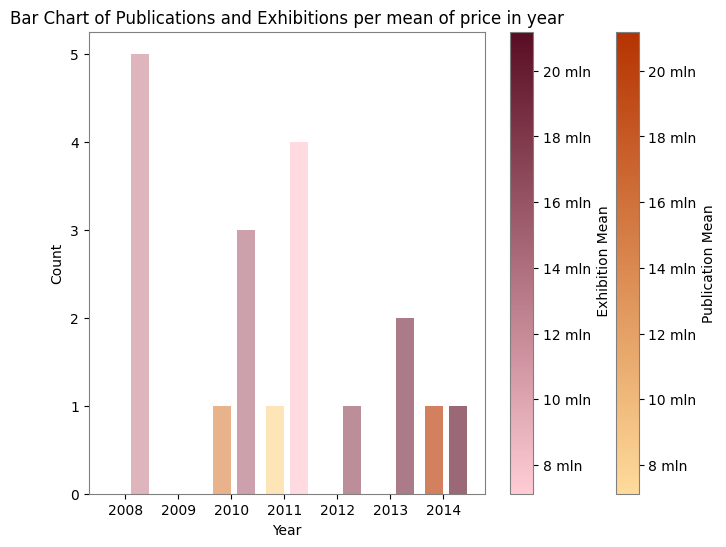

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame with the columns mentioned
# df = your_dataframe_here

# Create a custom colormap based on the 'mean' values
colors_1 = ['#FEDB9B', '#F4C385', '#E9AB6F', '#DF9359', '#D47B44', '#CA632E', '#BF4B18', '#B53302'] # Define colors for the gradient
cmap_1 = LinearSegmentedColormap.from_list('custom_cmap_1', colors_1)

colors_2 = ['#FFCCD5', '#E7B1BB', '#D095A2', '#B87A88', '#A05F6F', '#884455', '#71283C', '#590D22']
cmap_2 = LinearSegmentedColormap.from_list('custom_cmap_2', colors_2)

# Sort 'mean' values and associate each with a color
sorted_mean_values = sorted(merged_data["mean"])
color_map_1 = {}
for i in range(len(sorted_mean_values)):
    color_map_1[sorted_mean_values[i]] = colors_1[i]

color_map_2 = {}
for i in range(len(sorted_mean_values)):
    color_map_2[sorted_mean_values[i]] = colors_2[i]

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the width of the bars
bar_width = 0.35

# Iterate through each data point
for i, sold_time in enumerate(merged_data['soldtime']):
    # Get the mean value for the current sold time
    mean_value = merged_data.loc[i, 'mean']
    # Get the color from the color_map
    color_1 = color_map_1[mean_value]
    color_2 = color_map_2[mean_value]
    # Plot count_df1
    bar1 = plt.bar(sold_time, merged_data.loc[i, 'count_df1'], width=bar_width, alpha=0.7, label='count_df1', color=color_1)
    
    # Plot count_df2 next to count_df1 with an additional offset for space
    bar2 = plt.bar(sold_time + bar_width + 0.1, merged_data.loc[i, 'count_df2'], width=bar_width, alpha=0.7, label='count_df2', color=color_2)

# Create ScalarMappable objects for colormap
sm_1 = ScalarMappable(cmap=cmap_1)
sm_1.set_array(merged_data['mean'])  # Set the range of values for the colormap

sm_2 = ScalarMappable(cmap=cmap_2)
sm_2.set_array(merged_data['mean'])  # Set the range of values for the colormap

# Add colorbars
cbar_1 = plt.colorbar(sm_1)
cbar_1.set_label('Publication Mean')

cbar_2 = plt.colorbar(sm_2)
cbar_2.set_label(' Exhibition Mean')

# Define function to format tick labels
def format_millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f mln' % (x*1e-6)

# Set formatter for colorbar tick labels to display numbers in millions
cbar_1.ax.yaxis.set_major_formatter(FuncFormatter(format_millions))
cbar_2.ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Chart of Publications and Exhibitions per mean of price in year')

# Adjust x-axis ticks if necessary
plt.xticks(merged_data['soldtime'] + bar_width / 2, merged_data['soldtime'])

# Show plot
plt.show()


## The Datasets
Even though these variables have been chosen for our analyses, they cannot be considered as complete sources of information for the following reasons:
- Auction houses sellings is a dataset taken from <a href="https://raw.githubusercontent.com/jasonshi10/art_auction_valuation/master/data.txt">repository</a> which has taken data webscraping the old website of <a href="https://web.archive.org/web/20141018210450/http://artsalesindex.artinfo.com/asi/search/artistLanding.ai">Blouin Art Sales index</a>. During 2014 that website made available a lot of auction data for free, now data is available only under subscription as other websites like Artsy. It cannot be considered as a complete dataset because it does not represent all artists and it limits data at a time span between 1990s and 2014. Moreover, it takes into consideration a limited number of auction houses. Unfortunately this dataset does not assign a unique identifier per single artwork sold, so we do not know if similar titles are actually referring to a single artwork or not, the same to be said in the case of titled “Unknown” artworks. 
- Bibliography has been extrapolated from data.bnf and Google Books API merging the two outputs and removing duplicates. The choice of using these sources is dependent on the available and functioning sparql endpoints and it has been influenced by the non-free availability of Worldcat API. 
- Since no dataset has been created with the purpose of collecting information on exhibitions during the years, we chose to extract partial information from exhibition catalogues. 


## Our Case studies - De Kooning and Klimt
For the development of our project we have considered two different case studies:
- The painter <b>Willem de Kooning</b> has been considered as "ground truth" because the <a href="https://www.dekooning.org/">website</a> of the Foundation dedicated to him reports all one-man exhibitions and monographs written on the artist. We consider this as an attempt to gather complete data on the artist and we used them to make a comparison between these data and the ones extrapolated from previously mentioned sources. 
- <b>Gustav Klimt</b> as a case study, where we used all the different sources to make our assumptions.


# Working with data

In [ ]:
#uncomment if you're using colab to install the following libraries
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install torch
# !pip install spacy
# pip install beautifulsoup4
# python -m spacy download en_core_web_sm

In [ ]:
# import all useful libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 1. Auctions dataset



In [ ]:
# import the auctions dataset as a Pandas DataFrame
pd.set_option('display.max_columns', None)
auctions = pd.read_csv("auctions.csv", sep=";", encoding="iso-8859-1")
auctions

,Column1,artist,country,yearOfBirth,yearOfDeath,name,year,price,material,height,width,link,source,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,0.0,Mario A,Swiss,1959,NaN,The world is beautyful #5,2004,53150.0,laserchrome_print_diasec,29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456055,http://artinfo-images-350.s3.amazonaws.com/asi...,yellows,980.0,25.0,6574.0,75.0,2156.0,37.0,402.0,10.0,NaN
1,1.0,Mario A,Swiss,1959,NaN,The world is beautyful #13,2004,73830.0,laserchrom_print_(diasec.),29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456059,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,19.0,6617.0,1521.0,465.0,152.0,728.0,0.0,NaN
2,2.0,A E Cremer,French,20thC,NaN,Spot Lights,NaN,20900.0,black-painted_metal,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/5250074,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2120.0,5.0,2017.0,0.0,1756.0,39.0,415.0,0.0,NaN
3,3.0,A G Schultz & Co.,American,est1890s,NaN,Sugar/Sweetmeat Baskets,NaN,6150.0,Sterling_Silver,6.5,5.75,http://artsalesindex.artinfo.com/asi/lots/5269624,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,18.0,830.0,1374.0,3574.0,358.0,1313.0,0.0,NaN
4,4.0,A G Schultz & Co.,American,est1890s,NaN,An American Silver Five-piece Tea And Coffee S...,1908,81250.0,silver,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/3900522,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2160.0,2.0,1126.0,0.0,627.0,125.0,1295.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44097,41290.0,Mark Rothko,American,1903.0,19700.0,Untitled,1961,17000000.0,oil_on_canvas,93.0,80.0,http://artsalesindex.artinfo.com/asi/lots/2495060,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1070.0,6.0,9899.0,0.0,0.0,14.0,32.0,0.0,1997-11-18 00:00:00
44098,41291.0,Mark Rothko,American,1903.0,19700.0,Untitled,1968,3000000.0,acrylic_on_paper_on_canvas,24.0,18.0,http://artsalesindex.artinfo.com/asi/lots/2495081,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1340.0,1.0,6856.0,0.0,0.0,56.0,45.0,0.0,1997-11-18 00:00:00
44099,41292.0,Mark Rothko,American,1903.0,19700.0,Untitled,1959,2800000.0,oil_on_paper_laid_on_masonite,38.0,25.0,http://artsalesindex.artinfo.com/asi/lots/2495098,http://artinfo-images-350.s3.amazonaws.com/177...,blacks,1100.0,7.0,5348.0,66.0,475.0,14.0,107.0,0.0,1997-11-18 00:00:00
44100,41293.0,Mark Rothko,American,1903.0,19700.0,"Green, White, Green on Blue",1969,3229380.0,oil_on_paper_on_board,71.0,41.0,http://artsalesindex.artinfo.com/asi/lots/2251703,http://artinfo-images-350.s3.amazonaws.com/S11...,blacks,250.0,8.0,9498.0,947.0,4295.0,22.0,197.0,0.0,1995-11-29 00:00:00


In [ ]:
for i, item in enumerate(auctions['artist']):
    if isinstance(item, str) and 'After  ' in item:
        auctions.at[i, 'artist'] = item.replace('After  ', '')
auctions

,Column1,artist,country,yearOfBirth,yearOfDeath,name,year,price,material,height,width,link,source,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,0.0,Mario A,Swiss,1959,NaN,The world is beautyful #5,2004,53150.0,laserchrome_print_diasec,29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456055,http://artinfo-images-350.s3.amazonaws.com/asi...,yellows,980.0,25.0,6574.0,75.0,2156.0,37.0,402.0,10.0,NaN
1,1.0,Mario A,Swiss,1959,NaN,The world is beautyful #13,2004,73830.0,laserchrom_print_(diasec.),29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456059,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,19.0,6617.0,1521.0,465.0,152.0,728.0,0.0,NaN
2,2.0,A E Cremer,French,20thC,NaN,Spot Lights,NaN,20900.0,black-painted_metal,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/5250074,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2120.0,5.0,2017.0,0.0,1756.0,39.0,415.0,0.0,NaN
3,3.0,A G Schultz & Co.,American,est1890s,NaN,Sugar/Sweetmeat Baskets,NaN,6150.0,Sterling_Silver,6.5,5.75,http://artsalesindex.artinfo.com/asi/lots/5269624,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,18.0,830.0,1374.0,3574.0,358.0,1313.0,0.0,NaN
4,4.0,A G Schultz & Co.,American,est1890s,NaN,An American Silver Five-piece Tea And Coffee S...,1908,81250.0,silver,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/3900522,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2160.0,2.0,1126.0,0.0,627.0,125.0,1295.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44097,41290.0,Mark Rothko,American,1903.0,19700.0,Untitled,1961,17000000.0,oil_on_canvas,93.0,80.0,http://artsalesindex.artinfo.com/asi/lots/2495060,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1070.0,6.0,9899.0,0.0,0.0,14.0,32.0,0.0,1997-11-18 00:00:00
44098,41291.0,Mark Rothko,American,1903.0,19700.0,Untitled,1968,3000000.0,acrylic_on_paper_on_canvas,24.0,18.0,http://artsalesindex.artinfo.com/asi/lots/2495081,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1340.0,1.0,6856.0,0.0,0.0,56.0,45.0,0.0,1997-11-18 00:00:00
44099,41292.0,Mark Rothko,American,1903.0,19700.0,Untitled,1959,2800000.0,oil_on_paper_laid_on_masonite,38.0,25.0,http://artsalesindex.artinfo.com/asi/lots/2495098,http://artinfo-images-350.s3.amazonaws.com/177...,blacks,1100.0,7.0,5348.0,66.0,475.0,14.0,107.0,0.0,1997-11-18 00:00:00
44100,41293.0,Mark Rothko,American,1903.0,19700.0,"Green, White, Green on Blue",1969,3229380.0,oil_on_paper_on_board,71.0,41.0,http://artsalesindex.artinfo.com/asi/lots/2251703,http://artinfo-images-350.s3.amazonaws.com/S11...,blacks,250.0,8.0,9498.0,947.0,4295.0,22.0,197.0,0.0,1995-11-29 00:00:00


## 1.1 Brief overview

First, we tally the frequency of each artist in the dataset to identify those with the most auction records. Then, we determine how often each artist has participated in auctions.

**Research question**: Which artist presents a significant amount of data suitable for experimentation, based on the frequency of auction records and their participation in auctions?

In [ ]:
# creating a dictionary with the frequency of each artist

from collections import Counter
liss = {}
for column_name in auctions.columns:
    if column_name == "artist":
        for value in auctions[column_name]:
            if value not in liss:
                liss[value] = 1
            else:
                liss[value] += 1
k = Counter(liss)
 
# Finding 20 highest values
high = k.most_common(20) 
 
print("Initial Dictionary:")
print(liss, "\n")
print ('Total artist', len(liss))
 
 
print("Dictionary with 3 highest values:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")

Initial Dictionary:
{'Mario A': 2, 'A E Cremer': 1, 'A G Schultz & Co.': 2, 'A H': 1, 'A H G': 1, 'A K': 1, 'A Kassen': 1, 'A Lao': 4, 'A M': 1, 'A Sun Wu': 4, "Maria A'Becket": 4, "A'erbai": 1, 'A-One': 2, 'A.CE': 1, 'A1one': 6, 'Dirk van der Aa': 6, 'Jorgen Aabye': 5, 'Christian Aabye-Talge': 1, 'Attributed to  Hans von Aachen': 2, 'Circle of  Hans von Aachen': 2, 'Studio of  Hans von Aachen': 1, 'Hans von Aachen': 2, 'Peder Pedersen Aadnes': 1, 'Arvid Aae': 2, 'Carl Frederic Aagaard': 4, 'Martin Aagaard': 2, 'H P Aaland': 1, 'Alvar Aalto': 11, nan: 2837, 'Ilmari Aalto': 4, 'Veikko Aaltona': 5, 'Aarre Aaltonen': 2, 'Waino Aaltonen': 7, 'Martin Aalund': 3, 'Asbjorn Aamodt': 2, 'Susanne Aamund': 1, 'Jos Aanraad': 3, 'Leny Aardse': 1, 'Eero Aarnio': 7, 'Jessie Aaron': 9, 'John Aaron': 1, 'Joseph Aaron': 5, 'Michel Aaron': 1, 'George Aarons': 4, 'Slim Aarons': 2, 'Carl Aarsleff': 2, 'Hans Aarsman': 1, 'Nicolaas Aartmann': 4, 'Pieter Jan Aarts': 1, 'Alf Jorgen Aas': 1, 'Nils Aas': 3, 'Wal

In our initial analysis, we observe a concentration of data on a small number of artists with a significant number of auction records, while many artists have only a few auction records. Consequently, we move forward by examining the distribution of artists within various ranges of auction activity on their works.

In [ ]:
# Explore the distribution of data in our dataset

# Extract keys with value 1
keys_with_value_1 = [key for key, value in k.items() if value == 1]

# Count of keys with value 1
count_keys_with_value_1 = len(keys_with_value_1)


# Extract keys with value between 1 and 5
keys_with_value_minor_5 = [key for key, value in k.items() if 1 < value <= 5]

# Count of keys with value 5
count_keys_with_value_minor_5 = len(keys_with_value_minor_5)


# extract keys with value between 5 and 10
keys_with_value_minor_10= [key for key, value in k.items() if 5 < value <= 10]

# Count of keys with value between 5 and 10
count_keys_with_value_minor_10 = len(keys_with_value_minor_10)


# extract keys with value greater than 10
keys_with_value_greater_10= [key for key, value in k.items() if value > 10]

# Count of keys with value greater than 10
count_keys_with_value_greater_10 = len(keys_with_value_greater_10)
    

# Organise data in a df

data = {'labels':['Artist with one auction', 'Artists with maximum 5 auctions', 'Artist with maximum 10 auctions', 'Artists with more than 10 auctions'],
        'values' : [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_greater_10]
}

auctions_count = pd.DataFrame(data)

# Calculate the sum of 'values' column
total_value = auctions_count['values'].sum()

# Add a new row with the label "Artists in the dataset" and the sum of all values
new_row = {'labels': ['Artists in the dataset'], 'values': [total_value]}
total_df = pd.DataFrame(new_row)
# Concatenate the original DataFrame with the new total row DataFrame
auctions_count = pd.concat([auctions_count, total_df], ignore_index=True)
# Calculate percentages
auctions_count['percentage'] = (auctions_count['values'] / total_value) * 100


auctions_count


,labels,values,percentage
0,Artist with one auction,4028,46.837209
1,Artists with maximum 5 auctions,3359,39.058140
2,Artist with maximum 10 auctions,1198,13.930233
3,Artists with more than 10 auctions,15,0.174419
4,Artists in the dataset,8600,100.000000


We represent this data with a donut chart to illustrate the percentage of coverage for each range of auction activity.

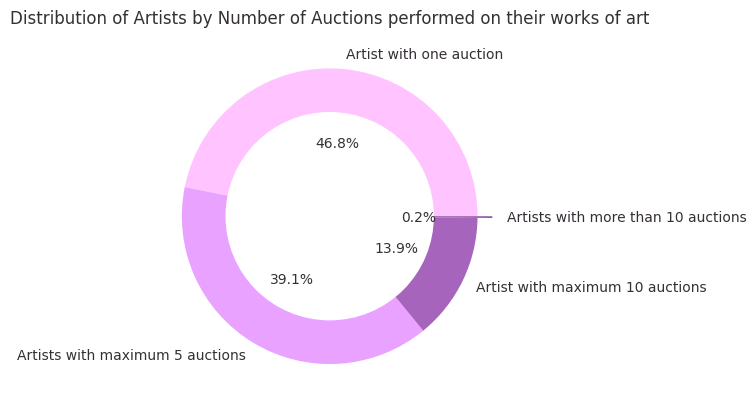

In [ ]:
#create donut chart from data above

import matplotlib.pyplot as plt

# settings
sizes = [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_greater_10]
labels = ['Artist with one auction', 'Artists with maximum 5 auctions', 'Artist with maximum 10 auctions', 'Artists with more than 10 auctions']
colors = ['#FFC3FF','#E9A2FF','#A664BC','#86469C']
explode = [0, 0, 0, 0.1]

# Create a pieplot
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})

# add a circle at the center to transform it into a donut chart
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Distribution of Artists by Number of Auctions performed on their works of art', color='#352f36')

plt.show()


This initial plot indicates that only a fraction of our dataset is substantial enough for meaningful data-driven research. Consequently, we need to narrow our focus to one of the 17 artists. The following code extracts this data.

In [ ]:
#create bar chart of frequency of auctions for artists with more than 10 auctions performed on their works.

#create dictionary with only above 10
greater_10_dict = {}
for key, value in high:
    if value > 10 :
        greater_10_dict[key] = value

data = {'artist': greater_10_dict.keys(), 'number of auctions': greater_10_dict.values()}


greater_than_10_df = pd.DataFrame(data)

greater_than_10_df

,artist,number of auctions
0,Pablo Picasso,9314
1,Andy Warhol,6996
2,NaN,2837
3,Gustav Klimt,424
4,Paul Cezanne,387
5,Willem de Kooning,381
6,Edvard Munch,371
7,Vincent van Gogh,133
8,Mark Rothko,133
9,Charles Eames,17


We visualize this data in a bar chart to observe the distribution differences.

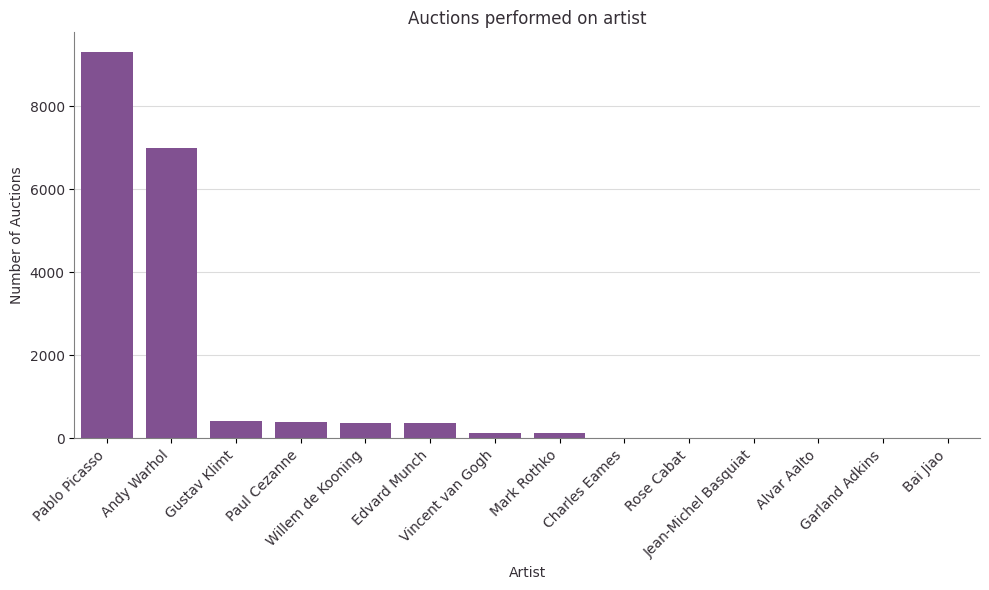

In [ ]:
# Plot artists with more than 10 auctions
plt.figure(figsize=(10, 6))

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

sns.barplot(x='artist', y='number of auctions', data=greater_than_10_df, color='#86469C', zorder=2)  # Set zorder for the bars
plt.xticks(rotation=45, ha='right', color='#352f36') 
plt.yticks(color='#352f36')
plt.title('Auctions performed on artist', color='#352f36')
plt.xlabel('Artist', color='#352f36')
plt.ylabel('Number of Auctions', color='#352f36')
sns.despine()
plt.grid(True, axis='y', linestyle='-', zorder=1)  # Add horizontal grid lines with lower zorder
plt.tight_layout()
plt.show()


We remove the outliers (Pablo Picasso and Andy Warhol) to better visualize the distribution for other artists.

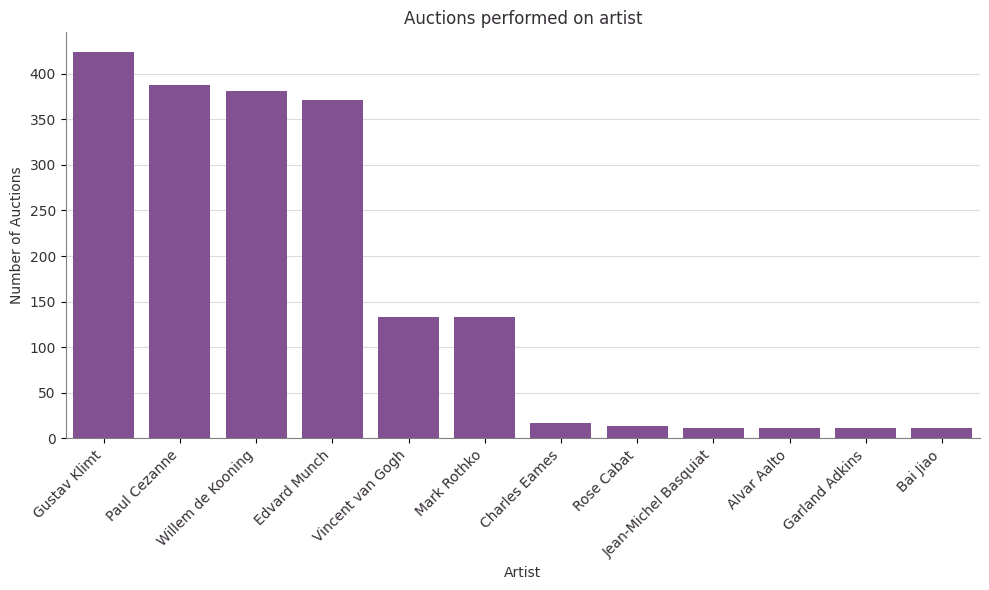

In [ ]:
# Plot without first two

greater_10_df_filtered = greater_than_10_df.iloc[2:]

plt.figure(figsize=(10, 6))

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

sns.barplot(x='artist', y='number of auctions', data=greater_10_df_filtered, color='#86469C', zorder=2)  # Set zorder for the bars
plt.xticks(rotation=45, ha='right', color='#352f36') 
plt.yticks(color='#352f36')
plt.title('Auctions performed on artist', color='#352f36')
plt.xlabel('Artist', color='#352f36')
plt.ylabel('Number of Auctions', color='#352f36')
sns.despine()
plt.grid(True, axis='y', linestyle='-', zorder=1)  # Add horizontal grid lines with lower zorder
plt.tight_layout()
plt.show()

The plot indicates a group of artists whose works have been sold in auctions a similar number of times. Hence, we can conduct an analysis among them to comprehend the variations in data between each artist. Our choice of artists has been taken considering this bar plot, where we can see that the number of Klimt and De Kooning auctions records are quite similar in respect also to the timespan of auction records added onto the dataset. 


In [ ]:
#save as csv
greater_10_df_filtered.to_csv('../docs//data/greater_10_filtered.csv', index=False)


## 1.2 Studying two artists: De Kooning and Klimt
## Times a work has been sold

In this section we analyse the mobility of works of De Kooning and Klimt. 

**Research question**: How many times have works by De Kooning and Klimt been sold, indicating their mobility in the market?

### 1.2.1 De Kooning

In [ ]:
# Count De Kooning frequency in the dataset

liss_dk = []
for column_name in auctions.columns:
    if column_name == "artist":
        for value in auctions[column_name]:
            if value == "Willem de Kooning":
                liss_dk.append(value)
print(len(liss_dk))

381


Here, we're exclusively retrieving results related to the chosen artists. Artworks lacking data about price and sold time have been removed from the dataset, reducing the number of considered examples to 307.

In [ ]:
# Auctions per work of art De Kooning

final_auctions_dk = auctions.loc[auctions["artist"] == "Willem de Kooning", ["artist", "name", "price", "soldtime"]].copy()

final_auctions_dk.dropna(subset=["price", "soldtime"], inplace=True)


# Extract the day from the "soldtime" column
final_auctions_dk["soldtime"] = final_auctions_dk["soldtime"].str.split("-").str[0]

final_auctions_dk.reset_index(drop=True, inplace=True)

# Save the DataFrame to a CSV file
final_auctions_dk.to_csv('auctions_data_DK.csv', index=False)

# Display the modified DataFrame
final_auctions_dk.head()


,artist,name,price,soldtime
0,Willem de Kooning,Untitled,1370000.0,2014
1,Willem de Kooning,Untitled,20450000.0,2014
2,Willem de Kooning,Untitled,1125000.0,2014
3,Willem de Kooning,Untitled XVIII,48690000.0,2014
4,Willem de Kooning,Untitled XXIV,175250000.0,2014


We compute the frequency of each work title to determine the number of times each work has been sold.

In [ ]:
#Check if there are works that have been sold more than once

name_counts = final_auctions_dk.groupby(['artist', 'name']).size().reset_index(name='count')

name_counts_sorted_dk = name_counts.sort_values(by='count', ascending=False)

name_counts_sorted_dk.reset_index(drop=True)

name_counts.head()


,artist,name,count
0,Willem de Kooning,Beach Scene (G.23),1
1,Willem de Kooning,Beach Scene (Graham 23),1
2,Willem de Kooning,Big,1
3,Willem de Kooning,Black And White Rome E,1
4,Willem de Kooning,Calm Digger (Graham 4),1


From this initial overview, it's evident that there are likely multiple works titled "Untitled" (as the probability of one work being sold 90 times in eight years is very low). Unfortunately, our dataset lacks a unique identifier for each work, making it impossible to disambiguate them. 

We proceed to examine the frequency of different transaction counts to understand the rate of data mobility.

In [ ]:
# count the number of works sold in how many times

# Count the occurrences of each count value
count_freq = name_counts_sorted_dk['count'].value_counts().sort_index()

# Create a DataFrame to store the count frequency data
count_data_dk = pd.DataFrame({'times_sold':count_freq.index , 'count': count_freq.values})

count_data_dk = count_data_dk.sort_values(by='times_sold', ascending=True)

# Modify the 'times_sold' column to become a string
count_data_dk['times_sold'] = 'sold ' + count_data_dk['times_sold'].astype(str) + ' times'

count_data_dk


,times_sold,count
0,sold 1 times,111
1,sold 2 times,22
2,sold 3 times,10
3,sold 4 times,1
4,sold 5 times,2
5,sold 6 times,3
6,sold 90 times,1


In [ ]:
# #This code shows the plot of the above mentioned data. 
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.


# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})


# plt.figure(figsize=(10, 6))
# sns.barplot(x='times_sold', y='count', data=count_data_dk, color='#E97D01', zorder = 4)

# plt.title('Frequency of Times a work has been sold', color='#352f36')
# plt.xlabel('Times Sold', color='#352f36')
# plt.ylabel('Number of works', color='#352f36')
# plt.xticks(rotation=45, color='#352f36')
# plt.yticks(color='#352f36')

# # Add exact value on top of each bar
# for index, value in enumerate(count_data_dk['count']):
#     plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='#352f36')

# # Plot the grid lines behind the bars
# plt.grid(True, axis='y', linestyle='-', zorder=0)  # Lower zorder for grid lines
# sns.despine()
# #
# plt.tight_layout()
# plt.show()




### 1.2.2 Klimt

We perform the same analysis on data about Klimt.

In [ ]:
# Count Klimt frequency

liss_k = []
for column_name in auctions.columns:
    if column_name == "artist":
        for value in auctions[column_name]:
            if value == "Gustav Klimt":
                liss_k.append(value)
print(len(liss_k))

424


In [ ]:
# Klimt data

final_auctions_k = auctions[["artist", "name", "price", "soldtime"]].copy()
final_auctions_k= final_auctions_k[final_auctions_k["artist"] == "Gustav Klimt"].copy()

final_auctions_k.reset_index(drop=True, inplace=True)

for idx, row in final_auctions_k.iterrows():
    if pd.isna(row["price"]) and pd.isna(row["soldtime"]):
        final_auctions_k.drop(idx, inplace=True)
        
dayy = []
for i in final_auctions_k['soldtime']:
    string_representation = str(i)
    split_parts = string_representation.split('-')
    day = split_parts[0]
    dayy.append(day)
final_auctions_k['soldtime'] = dayy
        

final_auctions_k.reset_index(drop=True, inplace=True)
final_auctions_k.to_csv('auctions_data_k.csv', index=False)
final_auctions_k

,artist,name,price,soldtime
0,Gustav Klimt,Vorgebeugt sitzende Aktfigur,174600.0,2014
1,Gustav Klimt,"Stehender Frauenakt Mit Erhobenem Linkem Bein,...",225000.0,2014
2,Gustav Klimt,Nach Links Sitzender Halbakt,200000.0,2014
3,Gustav Klimt,Allegory of Agriculture,200000.0,2014
4,Gustav Klimt,MÃ¤dchenbrustbild Von Vorne Mit HÃ¤ubchen (Por...,2691170.0,2014
...,...,...,...,...
251,Gustav Klimt,"Young nude with long, open hair",288000.0,2004
252,Gustav Klimt,Head and shoulders portrait of a lady glancing...,120140.0,2004
253,Gustav Klimt,Female nude bent over,192220.0,2004
254,Gustav Klimt,Lovers,180210.0,2004


In [ ]:
#Check if there are works that have been sold more than once

name_counts = final_auctions_k.groupby(['artist', 'name']).size().reset_index(name='count')

name_counts_sorted_k = name_counts.sort_values(by='count', ascending=False)

name_counts_sorted_k.reset_index(drop=True)

,artist,name,count
0,Gustav Klimt,Lovers,3
1,Gustav Klimt,Male nude,3
2,Gustav Klimt,Nude,3
3,Gustav Klimt,Adele Bloch-Bauer,2
4,Gustav Klimt,Seated nude,2
...,...,...,...
234,Gustav Klimt,Mada Primavesi,1
235,Gustav Klimt,Mannerkopf von vorne,1
236,Gustav Klimt,Mannerruckenakt,1
237,Gustav Klimt,Miss Lieser,1


In [ ]:
# count the number of works sold in how many times

# Count the occurrences of each count value
count_freq = name_counts_sorted_k['count'].value_counts().sort_index()

# Create a DataFrame to store the count frequency data
count_data_k = pd.DataFrame({'times_sold':count_freq.index , 'count': count_freq.values})

count_data_k = count_data_k.sort_values(by='times_sold', ascending=True)

# Modify the 'times_sold' column to become a string
count_data_k['times_sold'] = 'sold ' + count_data_k['times_sold'].astype(str) + ' times'

count_data_k


,times_sold,count
0,sold 1 times,225
1,sold 2 times,11
2,sold 3 times,3


In [ ]:
# #This code shows the plot of the above mentioned data. 
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

# plt.figure(figsize=(10, 6))
# sns.barplot(x='times_sold', y='count', data=count_data_k, color='#26408B', zorder=4)

# plt.title('Frequency of Times a work has been sold', color='#352f36')
# plt.xlabel('Times Sold', color='#352f36')
# plt.ylabel('Number of works', color='#352f36')
# plt.xticks(rotation=45, color='#352f36')
# plt.yticks(color='#352f36')


# # Add exact value on top of each bar
# for index, value in enumerate(count_data_k['count']):
#     plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='#352f36')

# # Remove right and top border
# sns.despine(right=True, top=True)

# plt.grid(True, axis='y', linestyle='-', zorder=0)
# plt.tight_layout()
# plt.show()


### 1.2.3 Compare data

To determine which artist's works are sold more times, we compare the number of art pieces that have been sold a certain number of times for each artist.

**Research questions**: Whose works are sold more times?

In [ ]:
#Combine data

# Left merge df_dk and df_k on 'times_sold' column
soldtime_merge_df = pd.merge(count_data_dk, count_data_k, on='times_sold', how='left')

# Fill NaN values with 0
soldtime_merge_df = soldtime_merge_df.fillna(0)

# Rename the 'count' columns
soldtime_merge_df = soldtime_merge_df.rename(columns={'count_x': 'de_kooning_count', 'count_y': 'klimt_count'})

# Convert count columns to integer data type
soldtime_merge_df['de_kooning_count'] = soldtime_merge_df['de_kooning_count'].astype(int)
soldtime_merge_df['klimt_count'] = soldtime_merge_df['klimt_count'].astype(int)

soldtime_merge_df


,times_sold,de_kooning_count,klimt_count
0,sold 1 times,111,225
1,sold 2 times,22,11
2,sold 3 times,10,3
3,sold 4 times,1,0
4,sold 5 times,2,0
5,sold 6 times,3,0
6,sold 90 times,1,0


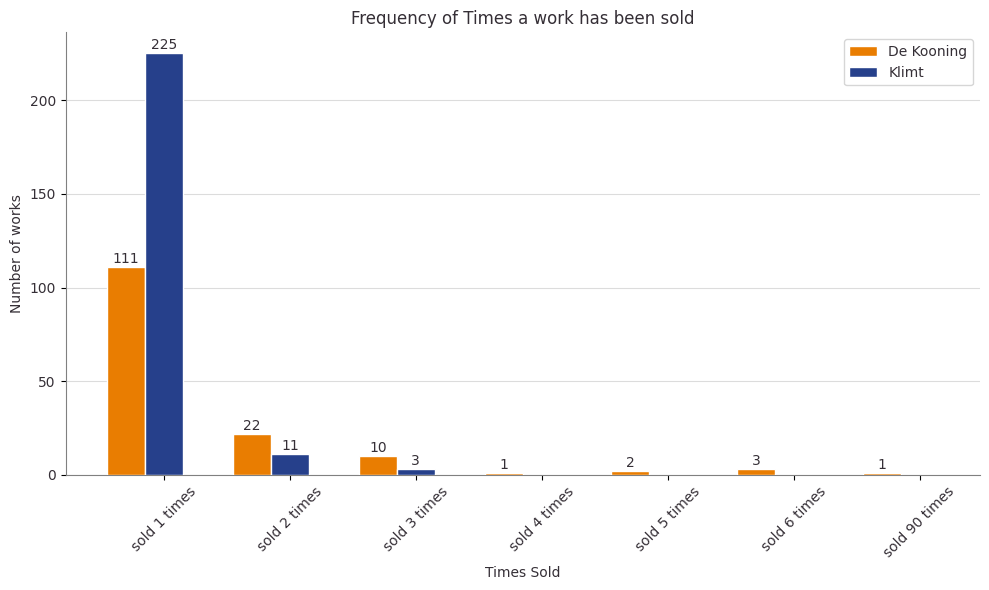

In [ ]:
# set width of bars
barWidth = 0.3

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})
 
# set heights of bars
bars1 = soldtime_merge_df['de_kooning_count']
bars2 = soldtime_merge_df['klimt_count']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='#E97D01', width=barWidth, edgecolor='white', label='De Kooning', zorder=4)
plt.bar(r2, bars2, color='#26408B', width=barWidth, edgecolor='white', label='Klimt', zorder=4)

for i, (dk_count, kl_count) in enumerate(zip(soldtime_merge_df['de_kooning_count'], soldtime_merge_df['klimt_count'])):
    if dk_count > 0:
        plt.text(i, dk_count + 0.5, str(dk_count), ha='center', va='bottom', color='#352f36')
    if kl_count > 0:
        plt.text(i + barWidth, kl_count + 0.5, str(kl_count), ha='center', va='bottom', color= '#352f36')
 
# Add xticks on the middle of the group bars
plt.title('Frequency of Times a work has been sold', color='#352f36')
plt.xlabel('Times Sold', color='#352f36')
plt.ylabel('Number of works', color='#352f36')
plt.yticks(color='#352f36')
plt.xticks([r + barWidth for r in range(len(bars1))], soldtime_merge_df['times_sold'], rotation=45, color='#352f36')

plt.grid(True, axis='y', linestyle='-', zorder=0)

# Remove right and top border
sns.despine(right=True, top=True)

plt.tight_layout()
 
# Create legend & Show graphic
legend = plt.legend()

# Set the color of the legend labels
for text in legend.get_texts():
    text.set_color('#352f36')

plt.show()

**Result**: This analysis highlights that although Klimt has more works sold, De Kooning's works tend to change ownership more frequently.

In [ ]:
#save as csv
soldtime_merge_df.to_csv('../docs/data/soldtime_merge_df.csv', index=False)


## 1.3 Sellings per year

In this section, we evaluate the distribution of auctions selling works of our two artists per year.

**Research question**: How many auctions for each artist have been performed per year?
### 1.3.1 De Kooning

In [ ]:
# Count the values in the 'soldtime' column
soldtime_counts_dk = final_auctions_dk['soldtime'].value_counts()

# Convert the Series to a DataFrame if needed
soldtime_counts_df = soldtime_counts_dk.reset_index()
soldtime_counts_df.columns = ['soldtime', 'count']

# Sort the DataFrame by the 'soldtime' column
soldtime_counts_df_sorted_dk = soldtime_counts_df.sort_values(by='soldtime')

# Display the sorted DataFrame
soldtime_counts_df_sorted_dk

,soldtime,count
1,2008,48
6,2009,17
5,2010,34
2,2011,45
3,2012,41
0,2013,82
4,2014,40


In [ ]:
# #This code shows the plot of the above mentioned data.
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.


# # Plot the timeline

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

# plt.figure(figsize=(10, 6))

# # Plot horizontal grid lines behind the line plot
# plt.grid(True, axis='y', linestyle='-', zorder=0)

# sns.lineplot(x="soldtime", y="count", data=soldtime_counts_df_sorted_dk, color='#E97D01') 

# plt.title('Sales per year', color='#352f36')
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Number of sales', color='#352f36')

# # Remove right and top border
# sns.despine(right=True, top=True)

# plt.yticks(color='#352f36')
# plt.xticks(color='#352f36')
# #
# plt.tight_layout()
# plt.show()


### 1.3.2 Klimt

In [ ]:
# Count the values in the 'soldtime' column
soldtime_counts_k = final_auctions_k['soldtime'].value_counts()

# Convert the Series to a DataFrame if needed
soldtime_counts_df = soldtime_counts_k.reset_index()
soldtime_counts_df.columns = ['soldtime', 'count']

# Sort the DataFrame by the 'soldtime' column
soldtime_counts_df_sorted_k = soldtime_counts_df.sort_values(by='soldtime')

# Display the sorted DataFrame
soldtime_counts_df_sorted_k

,soldtime,count
3,2004,21
0,2005,61
2,2006,32
1,2007,51
7,2008,15
6,2009,17
4,2010,18
8,2011,9
5,2012,17
10,2013,7


In [ ]:
# #This code shows the plot of the above mentioned data.
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.

# # Plot the timeline

# # Set the style and color of the axes
# sns.set_style({'axes.edgecolor': 'gray', 'grid.color': '#dcdcdc'})

# plt.figure(figsize=(10, 6))

# # Plot horizontal grid lines behind the line plot
# plt.grid(True, axis='y', linestyle='-', zorder=0)

# sns.lineplot(x="soldtime", y="count", data=soldtime_counts_df_sorted_dk, color='#26408B') 

# plt.title('Sales per year', color='#352f36')
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Number of sales', color='#352f36')

# # Remove right and top border
# sns.despine(right=True, top=True)

# plt.yticks(color='#352f36')
# plt.xticks(color='#352f36')

# plt.tight_layout()
# plt.show()

### 1.3.3 Compare data

Creating and displaying the change in the number of sales per year.


In [ ]:
# Convert 'soldtime' columns to int64 if they are not already
soldtime_counts_df_sorted_dk['soldtime'] = soldtime_counts_df_sorted_dk['soldtime'].astype('int64')
soldtime_counts_df_sorted_k['soldtime'] = soldtime_counts_df_sorted_k['soldtime'].astype('int64')

# Right merge the DataFrames on the 'soldtime' column
selling_per_year = pd.merge(soldtime_counts_df_sorted_dk, soldtime_counts_df_sorted_k, on='soldtime', how='right')

# Rename the count columns
selling_per_year.rename(columns={'count_x': 'de kooning count', 'count_y': 'klimt count'}, inplace=True)

# Replace NaN values with 0
selling_per_year.fillna(0, inplace=True)

# Convert the count columns to int64
selling_per_year['de kooning count'] = selling_per_year['de kooning count'].astype('int64')
selling_per_year['klimt count'] = selling_per_year['klimt count'].astype('int64')

# Sort by 'soldtime'
selling_per_year.sort_values(by='soldtime', inplace=True)

# Display the merged and sorted DataFrame
selling_per_year

,soldtime,de kooning count,klimt count
0,2004,0,21
1,2005,0,61
2,2006,0,32
3,2007,0,51
4,2008,48,15
5,2009,17,17
6,2010,34,18
7,2011,45,9
8,2012,41,17
9,2013,82,7


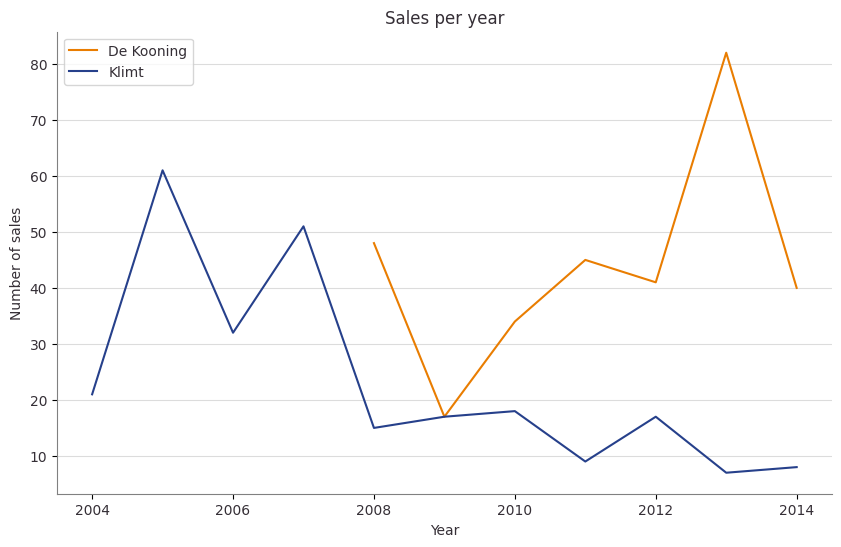

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure and axes
plt.figure(figsize=(10, 6))

# Filter out rows where "de kooning count" is not equal to 0
de_kooning_filtered = selling_per_year[selling_per_year['de kooning count'] != 0]

# Filter out rows where "klimt count" is not equal to 0
klimt_filtered = selling_per_year[selling_per_year['klimt count'] != 0]

# Plot "de kooning count"
if not de_kooning_filtered.empty:
    sns.lineplot(x="soldtime", y="de kooning count", data=de_kooning_filtered, color='#E97D01', zorder=4, label='De Kooning')

# Plot "klimt count" if "klimt count" is not empty
if not klimt_filtered.empty:
    sns.lineplot(x="soldtime", y="klimt count", data=klimt_filtered, color='#26408B', zorder=4, label='Klimt')

# Add labels and legend
plt.title('Sales per year', color='#352f36')
plt.xlabel('Year', color='#352f36')
plt.ylabel('Number of sales', color='#352f36')
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Create legend & Show graphic
plt.legend()

# Set the color of the legend labels
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('#352f36')

# Remove right and top border
sns.despine(right=True, top=True)

plt.grid(True, axis='y', linestyle='-', zorder=0)

# Show the plot
plt.show()


We observe that in the common time span (2008-2014), Klimt has experienced a decrease in sales, while the opposite trend can be observed for De Kooning. However, it's worth noting that in the last year considered (2014), De Kooning's sales were halved compared to the previous year.

In [ ]:
selling_per_year.to_csv('../docs/data/selling_per_year.csv', index=False)

## 1.4 Price of sellings

In this section we study the variation of price in time.

**Research question**: How does the prices change in time?
### 1.4.1 De Kooning

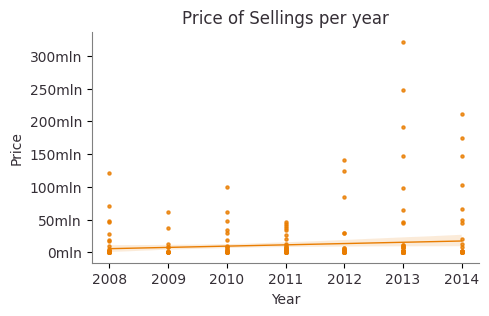

In [ ]:
# Plot sellings at time and price De Kooning
import matplotlib.ticker as ticker

# Convert 'soldtime' and 'price' columns to numeric data types if they are not already
final_auctions_dk['soldtime'] = pd.to_numeric(final_auctions_dk['soldtime'], errors='coerce')
final_auctions_dk['price'] = pd.to_numeric(final_auctions_dk['price'], errors='coerce')

# Drop rows with NaN values if any
final_auctions_dk = final_auctions_dk.dropna(subset=['soldtime', 'price'])

# Plot the scatter plot with regression line
plt.figure(figsize=(5, 3))
sns.regplot(x='soldtime', y='price', data=final_auctions_dk, color='#E97D01', scatter_kws={'s': 5}, line_kws={'linewidth': 1})

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
plt.gca().yaxis.set_major_formatter(formatter)

# Set the labels and title
plt.xlabel('Year', color='#352f36')
plt.ylabel('Price', color='#352f36')
plt.title('Price of Sellings per year', color='#352f36')
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Remove left and top border
sns.despine(right=True, top=True)

# Show the plot
plt.show()


Presented like this, it's challenging to grasp the precise values for each layer. Therefore, we round the data to the nearest 10 million.

In [ ]:
# Round the 'price' values to the nearest million
rounded_prices = (final_auctions_dk['price'] // 10000000) * 10000000

# Create a new DataFrame with 'soldtime', 'rounded_prices', and 'count'
rounded_prices_df_dk = final_auctions_dk.groupby(['soldtime', rounded_prices]).size().reset_index(name='count')

# Rename columns
rounded_prices_df_dk.rename(columns={rounded_prices.name: 'rounded_prices'}, inplace=True)

# Sort the DataFrame by 'soldtime'
rounded_prices_df_dk.sort_values(by='soldtime', inplace=True)

# Display the new DataFrame
rounded_prices_df_dk.head()





,soldtime,rounded_prices,count
0,2008,0.0,41
1,2008,10000000.0,2
2,2008,20000000.0,1
3,2008,40000000.0,2
4,2008,70000000.0,1


In [ ]:
# #This code shows the plot of the above mentioned data.
# #To make the notebook lighter we live it as not automatically runned
# #To show it de comment the cell.

# # Plot grouped count 

# # Define the two colors
# color1 = '#FCAC23'  # Yellow
# color2 = '#B53302'  # Red


# # Create a custom colormap gradient
# cmap = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])


# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_dk, legend=True, palette=cmap, sizes=(50,200))


# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)

# # Set the labels and title
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Price', color='#352f36')
# plt.title('Price of Sellings per year', color='#352f36')
# plt.xticks(color='#352f36')
# plt.yticks(color='#352f36')

# # Set the color of the legend labels
# legend = plt.legend(title = 'Number of sales',  loc='upper left')
# for text in legend.get_texts():
#     text.set_color('#352f36')


# # Show the plot
# plt.show()




### 1.4.2 Klimt

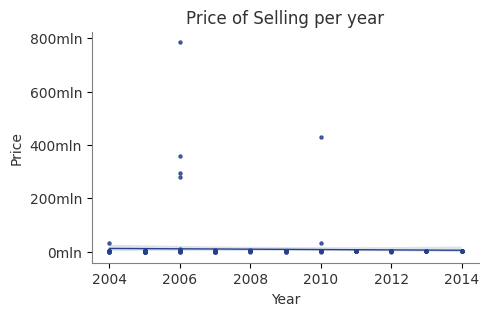

In [ ]:
# plot sellings at time and price Klimt

import matplotlib.ticker as ticker

# Convert 'soldtime' and 'price' columns to numeric data types if they are not already
final_auctions_k['soldtime'] = pd.to_numeric(final_auctions_k['soldtime'], errors='coerce')
final_auctions_k['price'] = pd.to_numeric(final_auctions_k['price'], errors='coerce')

# Drop rows with NaN values if any
final_auctions_k = final_auctions_k.dropna(subset=['soldtime', 'price'])

# Plot the scatter plot with regression line
plt.figure(figsize=(5, 3))
sns.regplot(x='soldtime', y='price', data=final_auctions_k, color='#26408B', scatter_kws={'s': 5}, line_kws={'linewidth': 1})

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
plt.gca().yaxis.set_major_formatter(formatter)

# Set the labels and title
plt.xlabel('Year', color='#352f36')
plt.ylabel('Price', color='#352f36')
plt.title('Price of Selling per year', color='#352f36')
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Remove left and top border
sns.despine(right=True, top=True)

# Show the plot
plt.show()



as for de Kooning, we now show de distribution of values to make more explicit the distribution.

In [ ]:
# Round the 'price' values to the nearest million
rounded_prices = (final_auctions_k['price'] // 10000000) * 10000000

# Create a new DataFrame with 'soldtime', 'rounded_prices', and 'count'
rounded_prices_df_k = final_auctions_k.groupby(['soldtime', rounded_prices]).size().reset_index(name='count')

# Rename columns
rounded_prices_df_k.rename(columns={rounded_prices.name: 'rounded_prices'}, inplace=True)

# Sort the DataFrame by 'soldtime'
rounded_prices_df_k.sort_values(by='soldtime', inplace=True)

# Display the new DataFrame
rounded_prices_df_k.head()

,soldtime,rounded_prices,count
0,2004,0.0,20
1,2004,30000000.0,1
2,2005,0.0,61
3,2006,0.0,27
4,2006,10000000.0,1


In [ ]:
# # Define the two colors
# color3 = '#81B1D5'  # Light blue
# color4 = '#0F084B'  # Dark blue


# # Create a custom colormap gradient
# cmap = LinearSegmentedColormap.from_list('custom_gradient', [color3, color4])


# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_k, legend=True, palette=cmap, sizes=(50,200))


# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)

# # Set the labels and title
# plt.xlabel('Year', color='#352f36')
# plt.ylabel('Price', color='#352f36')
# plt.title('Price of Sellings per year', color='#352f36')
# plt.xticks(color='#352f36')
# plt.yticks(color='#352f36')

# # Set the color of the legend labels
# legend = plt.legend(title = 'Number of sales')
# for text in legend.get_texts():
#     text.set_color('#352f36')


# # Show the plot
# plt.show()


### 1.4.1 Compare data

We now compare the data from the two artists.

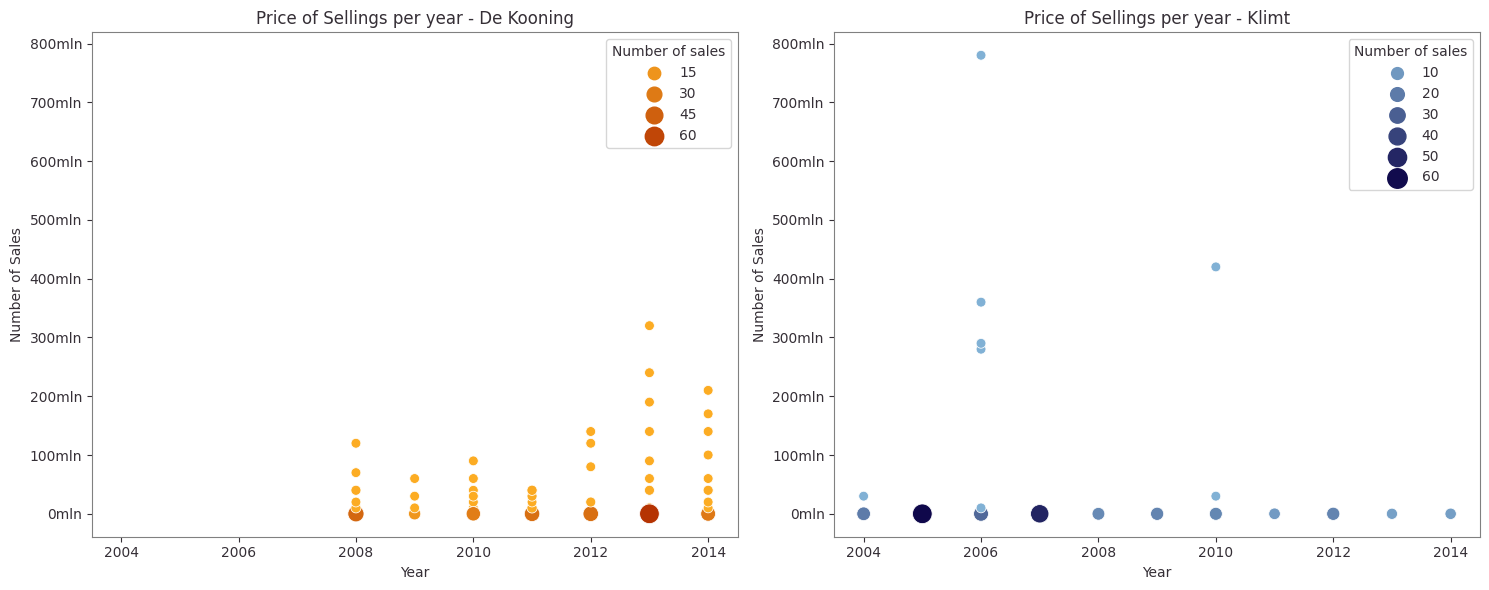

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

# Define the two colors
color1 = '#FCAC23'  # Yellow
color2 = '#B53302'  # Red

# Create a custom colormap gradient
cmap_orange = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])

# Define the two colors for the custom gradient
color3 = '#81B1D5'  # Light blue
color4 = '#0F084B'  # Dark blue

# Create a custom colormap gradient
cmap_blue = LinearSegmentedColormap.from_list('custom_gradient', [color3, color4])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for rounded_prices_df_dk
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_dk, ax=axs[0], legend=True, palette=cmap_orange, sizes=(50,200))
axs[0].set_title('Price of Sellings per year - De Kooning', color='#352f36')
axs[0].set_xlabel('Year', color='#352f36')
axs[0].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[0].tick_params(axis='x', colors='#352f36')
axs[0].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[0].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[0].yaxis.set_major_formatter(formatter)


# Plot for rounded_prices_df_k
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_k, ax=axs[1], legend=True, palette=cmap_blue, sizes=(50,200))
axs[1].set_title('Price of Sellings per year - Klimt', color='#352f36')
axs[1].set_xlabel('Year', color='#352f36')
axs[1].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[1].tick_params(axis='x', colors='#352f36')
axs[1].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[1].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[1].yaxis.set_major_formatter(formatter)

# Match x-axis limits of the second subplot to the first subplot
axs[0].set_xlim(axs[1].get_xlim())

# Match y-axis limits of the second subplot to the first subplot
axs[0].set_ylim(axs[1].get_ylim())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From this initial comparison, it appears that Klimt had significant market interest between 2005 and 2007, while the peak year for De Kooning was 2013, marked by numerous low-price auctions alongside a few high-priced ones.

This analysis shows us that the price for both Klimt and De Kooning works are pretty similar, and that interest in De Kooning is way higher.

## 1.5 Studying the mean
Here we study the distribution of the median

### 1.5.1 De Kooning

In [ ]:
#mean price per year de Kooning
pd.options.display.float_format = '{:.2f}'.format

# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_dk = final_auctions_dk.groupby('soldtime')['price'].mean()


# Assuming 'mean_price_per_year_dk' is the Series containing mean price per year
mean_price_per_year_dk_df = mean_price_per_year_dk.reset_index()

# Rename the columns
mean_price_per_year_dk_df.columns = ['soldtime', 'mean']
# Print the mean price for each year
mean_price_per_year_dk_df

,soldtime,mean
0,2008,7798806.04
1,2009,7603057.65
2,2010,9788578.82
3,2011,7128407.11
4,2012,10849152.44
5,2013,15078419.76
6,2014,21186242.25


In [ ]:
# ##This code shows the plot of the above mentioned data.
# ##To make the notebook lighter we live it as not automatically runned
# ##To show it de comment the cell.

# # Plot the variation of mean price per year
# plt.figure(figsize=(10, 6))
# mean_price_per_year_dk.plot(kind='line', marker='o', color='#E97D01')

# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)

# plt.title('Mean of Price per Year', color='#352f36')  # Change title color
# plt.xlabel('Year', color='#352f36')  # Change xlabel color
# plt.ylabel('Mean of Price', color='#352f36')  # Change ylabel color
# plt.xticks(color='#352f36')  # Change xticks color
# plt.yticks(color='#352f36')  # Change yticks color
# plt.grid(axis='y')  # Show only horizontal grid
# sns.despine(right=True, top=True)  # Remove right and top border

# plt.tight_layout()
# plt.show()
# #

### 1.5.2 Klimt

In [ ]:
#median price per year Klimt
pd.options.display.float_format = '{:.2f}'.format


# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_k = final_auctions_k.groupby('soldtime')['price'].median()


# Assuming 'mean_price_per_year_k' is the Series containing mean price per year
mean_price_per_year_k_df = mean_price_per_year_k.reset_index()

# Rename the columns
mean_price_per_year_k_df.columns = ['soldtime', 'mean']
# Print the mean price for each year
mean_price_per_year_k_df

,soldtime,mean
0,2004,180210.00
1,2005,216270.00
2,2006,391455.00
3,2007,551400.00
4,2008,297770.00
5,2009,291190.00
6,2010,330920.00
7,2011,630620.00
8,2012,274550.00
9,2013,475000.00


In [ ]:
# ##This code shows the plot of the above mentioned data.
# ##To make the notebook lighter we live it as not automatically runned
# ##To show it de comment the cell.

# # Plot the variation of mean price per year
# plt.figure(figsize=(10, 6))
# mean_price_per_year_k.plot(kind='line', marker='o', color='#26408B')

# # Format y-axis ticks
# formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) if x < 1000000 else '{:,.0f}'.format(x/1000000) + 'mln')
# plt.gca().yaxis.set_major_formatter(formatter)


# plt.title('Mean of Price per Year', color='#352f36')  # Change title color
# plt.xlabel('Year', color='#352f36')  # Change xlabel color
# plt.ylabel('Mean of Price', color='#352f36')  # Change ylabel color
# plt.xticks(color='#352f36')  # Change xticks color
# plt.yticks(color='#352f36')  # Change yticks color
# plt.grid(axis='y')  # Show only horizontal grid
# sns.despine(right=True, top=True)  # Remove right and top border

# plt.tight_layout()
# plt.show()

### 1.5.3 Compare Data

In [ ]:
combined_mean_price_per_year = mean_price_per_year_k_df.merge(mean_price_per_year_dk_df, on='soldtime', suffixes=('_k', '_dk'))
combined_mean_price_per_year

,soldtime,mean_k,mean_dk
0,2008,297770.00,7798806.04
1,2009,291190.00,7603057.65
2,2010,330920.00,9788578.82
3,2011,630620.00,7128407.11
4,2012,274550.00,10849152.44
5,2013,475000.00,15078419.76
6,2014,218885.00,21186242.25


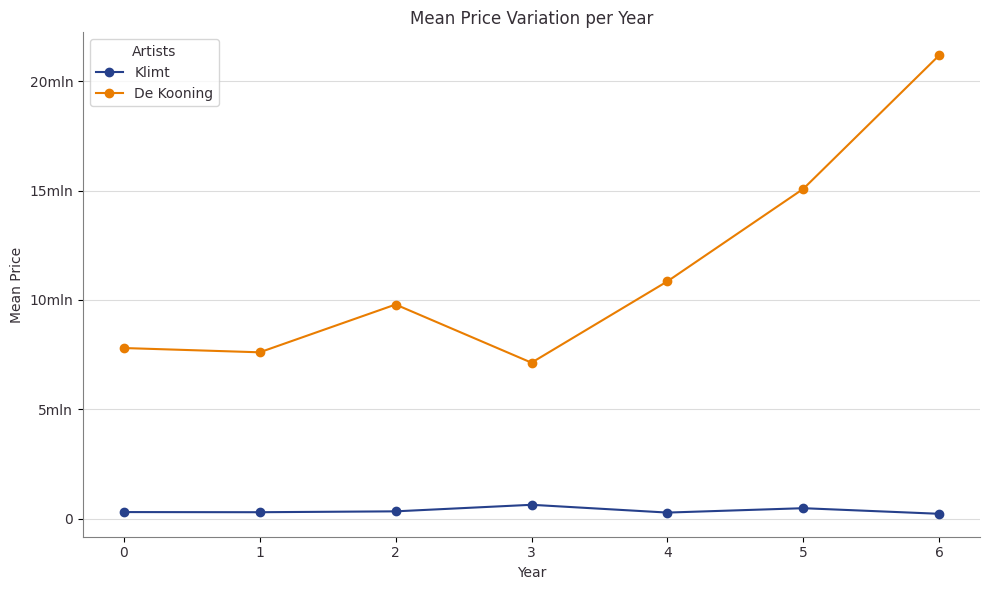

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the mean price variation per year for Klimt
plt.plot(combined_mean_price_per_year.index, combined_mean_price_per_year['mean_k'], marker='o', color='#26408B', label='Klimt')

# Plot the mean price variation per year for De Kooning
plt.plot(combined_mean_price_per_year.index, combined_mean_price_per_year['mean_dk'], marker='o', color='#E97D01', label='De Kooning')

# Format y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) if x < 1000000 else '{:,.0f}'.format(x/1000000) + 'mln')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Mean Price Variation per Year', color='#352f36')  # Change title color
plt.xlabel('Year', color='#352f36')  # Change xlabel color
plt.ylabel('Mean Price', color='#352f36')  # Change ylabel color
plt.xticks(color='#352f36')  # Change xticks color
plt.yticks(color='#352f36')  # Change yticks color
plt.grid(axis='y')  # Show only horizontal grid
sns.despine(right=True, top=True)  # Remove right and top border

# Set legend labels and colors
legend = plt.legend(loc='upper left', title='Artists')
plt.setp(legend.get_title(), color='#352f36')  # Set legend title color
for text in legend.get_texts():
    text.set_color('#352f36')  # Set legend label color

plt.tight_layout()
plt.show()



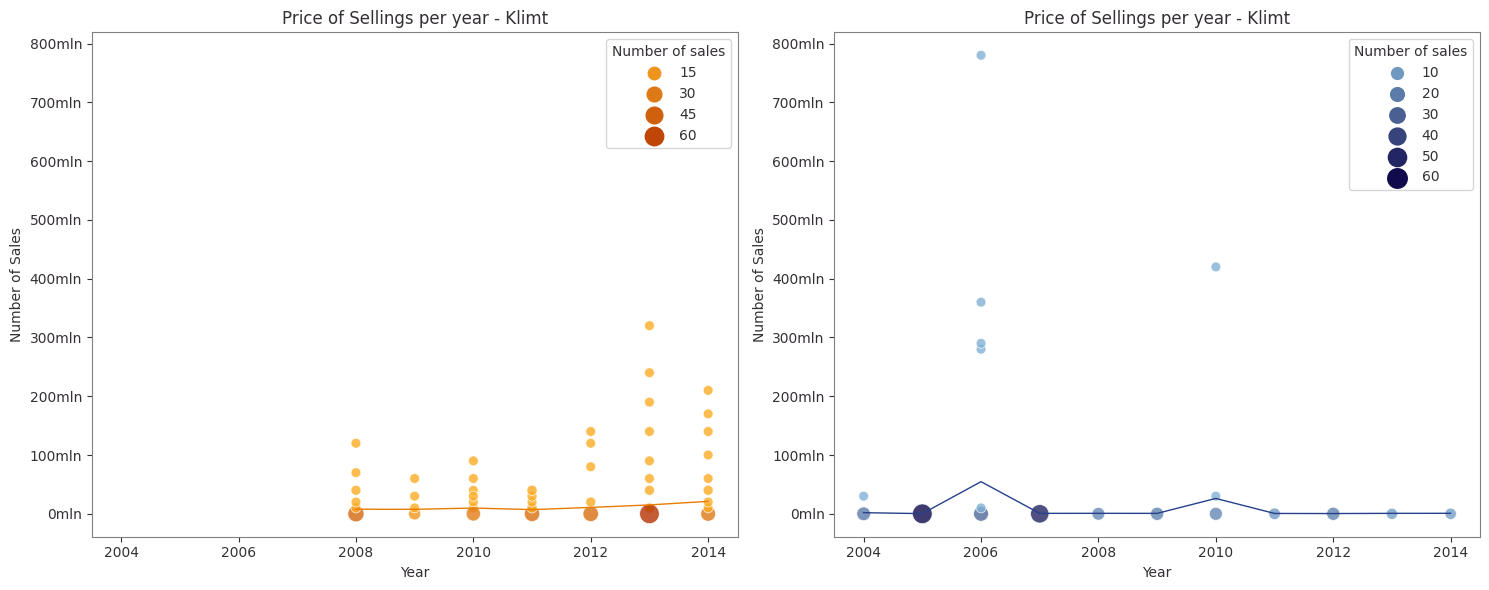

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Define the two colors for the custom gradient
color1 = '#FCAC23'  # Yellow
color2 = '#B53302'  # Red
color3 = '#81B1D5'  # Light blue
color4 = '#0F084B'  # Dark blue

# Create custom colormaps
cmap_orange = LinearSegmentedColormap.from_list('custom_gradient_orange', [color1, color2])
cmap_blue = LinearSegmentedColormap.from_list('custom_gradient_blue', [color3, color4])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for rounded_prices_df_dk
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_dk, ax=axs[0], legend=True, palette=cmap_orange, sizes=(50,200), alpha=0.8)
axs[0].set_title('Price of Sellings per year - Klimt', color='#352f36')
axs[0].set_xlabel('Year', color='#352f36')
axs[0].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[0].tick_params(axis='x', colors='#352f36')
axs[0].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[0].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Plot the line plot for mean price per year for final_auctions_dk
mean_price_per_year_dk = final_auctions_dk.groupby('soldtime')['price'].mean()
axs[0].plot(mean_price_per_year_dk.index, mean_price_per_year_dk.values, color='#E97D01', linestyle='-', linewidth=1)

# Plot for rounded_prices_df_k
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=rounded_prices_df_k, ax=axs[1], legend=True, palette=cmap_blue, sizes=(50,200), alpha=0.8)
axs[1].set_title('Price of Sellings per year - Klimt', color='#352f36')
axs[1].set_xlabel('Year', color='#352f36')
axs[1].set_ylabel('Number of Sales', color='#352f36')

# Customize ticks color
axs[1].tick_params(axis='x', colors='#352f36')
axs[1].tick_params(axis='y', colors='#352f36')

# Customize legend text color
legend = axs[1].legend(title='Number of sales')
for text in legend.get_texts():
    text.set_color('#352f36')

# Set legend title color
legend.get_title().set_color('#352f36')

# Plot the line plot for mean price per year for final_auctions_k
mean_price_per_year_k = final_auctions_k.groupby('soldtime')['price'].mean()
axs[1].plot(mean_price_per_year_k.index, mean_price_per_year_k.values, color='#26408B', linestyle='-', linewidth=1)

# Match x-axis limits of the second subplot to the first subplot
axs[0].set_xlim(axs[1].get_xlim())

# Match y-axis limits of the second subplot to the first subplot
axs[0].set_ylim(axs[1].get_ylim())

# Format y-axis ticks

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[0].yaxis.set_major_formatter(formatter)

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'mln')
axs[1].yaxis.set_major_formatter(formatter)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
rounded_prices_df_dk.to_csv('../docs/data/rounded_count_dk.csv', index=False)
mean_price_per_year_dk.to_csv('../docs/data/mean_price_per_year_dk.csv', index=False)
rounded_prices_df_k.to_csv('../docs/data/rounded_count_k.csv', index=False)
mean_price_per_year_k.to_csv('../docs/data/mean_price_per_year_k.csv', index=False)


?????????????????????????????????????????????????????????????????????????????????????????qui mostro il numero di vendite per anno e la media di prezzo (la dimensione della palla). Dici che sarebbe meglio fare i guadagni totali?

# 2. Bibliography

## 2.1 Data Cleaning
### 2.1.1 data bnf
#### 2.1.1.1 De Kooning


Since accessing the sparql endpoint of data.bnf using python returns an empty html page, we performed the following query using the web endpoint  <a href="https://data.bnf.fr/sparql/">data.bnf</a>:
```
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT * 
WHERE {
  ?work dct:title ?title ;
        dct:publisher ?publisher;
        dct:date ?date;
        rdfs:seeAlso ?uri ;
        bnf-onto:isbn ?isbn;
        
  FILTER (bif:contains(?title, "De_Kooning"))}

```

The first query works at FRBR Work level, not allowing to extract directly the author of the work, because it's not an information contained at this level. After that a CSV containing dataset was downloaded and analyzed. 

The following query has been performed also:


```
PREFIX rdarelationships: <http://rdvocab.info/RDARelationshipsWEMI/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT distinct ?work ?title ?creatorname ?date ?isbn
WHERE {
  ?work dct:title ?title;
        dct:creator ?creator.
		?creator foaf:name ?creatorname.
  ?work dct:date ?date.
  ?work rdarelationships:expressionOfWork ?expression.
?manifestation rdarelationships:expressionManifested ?expression.
?manifestation bnf-onto:isbn ?isbn.  
  FILTER (bif:contains(?title, "De_Kooning"))}
```

This query works at the FRBR Manifestation level, it allows to gather all data needed for our needs but unfortunately the number of manifestations which have associated an author are a limited number. For this reason, we decided to stick with the query with more results, even though this could mean sacrificing some important metadata that could be used for analysis.


In [ ]:
import pandas as pd
bnf_dk = pd.read_csv("databnf_DK.csv")
pd.set_option('display.max_rows', None)
bnf_dk.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45692271m#about,Le rire de De Kooning,"Bordeaux : Olympique , 2019",2019,https://catalogue.bnf.fr/ark:/12148/cb45692271m,978-2-9557550-6-8
1,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714845817
2,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160
3,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714845814
4,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714873169


In [ ]:
#counting De Kooning occurrences in the title of the dataframe
liss = []
for column_name in bnf_dk.columns:
    if column_name == "title":
        for value in bnf_dk[column_name]:
            if "de Kooning" in value or "De Kooning" in value:
                liss.append(value)
print(len(liss))

row_count = bnf_dk.shape[0]

70


We are altering the structure of the identifier (ISBN) here, as it will later need to be standardized for comparison with results obtained from the Google API. The Google API provides various identifiers, not just ISBNs, so this standardization ensures that potential duplicates in the dataset which will combine data from data.bnf and Google can be detected only when a direct ISBN comparison is possible.

In [ ]:
for column_name in bnf_dk.columns:
    if column_name == "isbn":
        for i, value in enumerate(bnf_dk[column_name]):
            if "-" in value:
                # Replacing hyphens with empty string
                bnf_dk.at[i, column_name] = value.replace("-", "")
bnf_dk.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45692271m#about,Le rire de De Kooning,"Bordeaux : Olympique , 2019",2019,https://catalogue.bnf.fr/ark:/12148/cb45692271m,9782955755068
1,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714845817
2,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160
3,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714845814
4,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714873169


#### 2.1.2.1 Klimt

In this case the query performed is this:
```PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT * 
WHERE {
  ?work dct:title ?title ;
        dct:publisher ?publisher;
        dct:date ?date;
        rdfs:seeAlso ?uri ;
        bnf-onto:isbn ?isbn
  FILTER (bif:contains(?title, "Klimt"))}
  ```

 done on the web endpoint and then the CSV was downloaded. 

In [ ]:
bnf_k = pd.read_csv("databnf_KLI.csv")
pd.set_option('display.max_rows', None)
bnf_k.head()


,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,0878468528
1,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,9780878468522
2,http://data.bnf.fr/ark:/12148/cb35356100b#about,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,https://catalogue.bnf.fr/ark:/12148/cb35356100b,0-7148-1600-0
3,http://data.bnf.fr/ark:/12148/cb37494522j#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,https://catalogue.bnf.fr/ark:/12148/cb37494522j,0-7148-1600-0
4,http://data.bnf.fr/ark:/12148/cb39124684p#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,https://catalogue.bnf.fr/ark:/12148/cb39124684p,0-7148-2967-6


In [ ]:
for column_name in bnf_k.columns:
    if column_name == "isbn":
        for i, value in enumerate(bnf_k[column_name]):
            if "-" in value:
                # Replacing hyphens with empty string
                bnf_k.at[i, column_name] = value.replace("-", "")
bnf_k.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,0878468528
1,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,9780878468522
2,http://data.bnf.fr/ark:/12148/cb35356100b#about,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,https://catalogue.bnf.fr/ark:/12148/cb35356100b,0714816000
3,http://data.bnf.fr/ark:/12148/cb37494522j#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,https://catalogue.bnf.fr/ark:/12148/cb37494522j,0714816000
4,http://data.bnf.fr/ark:/12148/cb39124684p#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,https://catalogue.bnf.fr/ark:/12148/cb39124684p,0714829676


### 2.1.2 Query on Google Books Api
We used an HTTP request to query the Google Books API. The results produced are not completely coherent with the request, so after fetching the information, a further filtering was needed
#### 2.1.2.1 De Kooning

In [ ]:
import requests
import json

def fetch_books(query, max_results=40):
    base_url = "https://www.googleapis.com/books/v1/volumes"
    start_index = 0
    all_results = []

    while True:
        params = {
            "q": query,
            "startIndex": start_index,
            "maxResults": max_results
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if not items:
                break
            all_results.extend(items)
            start_index += max_results
        else:
            print("Failed to retrieve data. Status code:", response.status_code)
            break

    return all_results

books_dk = fetch_books("De Kooning")

# Saving JSON data to a file
with open("dkbooks.json", "w") as json_file:
    json.dump(books_dk, json_file, indent=4)

print("JSON data saved to dkbooks.json")

JSON data saved to dkbooks.json


In [ ]:
import json

# Load JSON data from file
with open("dkbooks.json", "r") as json_file:
    books_data_dk = json.load(json_file)

# Extract relevant fields from each book item
books_list_dk = []
for book in books_data_dk:
    book_info = {
        "Title": book["volumeInfo"].get("title", "N/A"),
        "Subtitle": book["volumeInfo"].get("subtitle", "N/A"),
        "Authors": ", ".join(book["volumeInfo"].get("authors", ["N/A"])),
        "Publisher": book["volumeInfo"].get("publisher", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "isbn": book["volumeInfo"].get("industryIdentifiers", [{}])[0].get("identifier", "N/A"),  # Retrieving ISBN
    }
    books_list_dk.append(book_info)

# Create DataFrame
books_df_dk = pd.DataFrame(books_list_dk)
books_df_dk.replace('N/A', np.nan, inplace= True)

# Display DataFrame
books_df_dk.head()


,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,"De Kooning, dipinti, disegni, sculture",NaN,Willem De Kooning,NaN,1985,UOM:39015015825683
1,De Kooning,NaN,NaN,NaN,1985,OCLC:12250843
2,Willem De Kooning,late paintings,"Willem De Kooning, Museo Carlo Bilotti",Mondadori Electa,2006,UOM:39015066851935
3,De Kooning,NaN,"Willem De Kooning, Gabriella Drudi",NaN,1972,UOM:39015045652768
4,De Kooning,A Retrospective,"Willem De Kooning, John Elderfield, Lauren Mah...",The Museum of Modern Art,2011,9780870707971


In [ ]:
#checking how many times De Kooning appears in the title
liss = []
for column_name in books_df_dk.columns:
    if column_name == "Title":
        for value in books_df_dk[column_name]:
            if "de Kooning" in value or "De Kooning" in value:
                liss.append(value)
print(len(liss))


145


Filtering has been done considering the title and in particular the surname of the author in order to avoid results related to his wife that were showing up consistenly. 

In [ ]:

books_dk = books_df_dk[books_df_dk["Title"].str.contains("de Kooning", case=False) & ~books_df_dk["Title"].str.contains("Elaine de Kooning", case=False)].copy()

books_dk.reset_index(drop=True, inplace=True)

books_dk.head()

,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,"De Kooning, dipinti, disegni, sculture",NaN,Willem De Kooning,NaN,1985,UOM:39015015825683
1,De Kooning,NaN,NaN,NaN,1985,OCLC:12250843
2,Willem De Kooning,late paintings,"Willem De Kooning, Museo Carlo Bilotti",Mondadori Electa,2006,UOM:39015066851935
3,De Kooning,NaN,"Willem De Kooning, Gabriella Drudi",NaN,1972,UOM:39015045652768
4,De Kooning,A Retrospective,"Willem De Kooning, John Elderfield, Lauren Mah...",The Museum of Modern Art,2011,9780870707971


In [ ]:
# Merge the two DataFrames on the 'ISBN' column
df_combined_dk= pd.merge(bnf_dk, books_dk, on='isbn', how='inner')

# Display the new DataFrame with rows where ISBN is found in both DataFrames
df_combined_dk


,work,title,publisher,date,uri,isbn,Title,Subtitle,Authors,Publisher,PublishedDate
0,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160,Willem de Kooning,A Way of Living,Judith Zilczer,Phaidon Press,2017-05-22
1,http://data.bnf.fr/ark:/12148/cb347640459#about,Willem De Kooning : Whitney museum of American...,"Paris : Centre Georges-Pompidou , 1984",1984,https://catalogue.bnf.fr/ark:/12148/cb347640459,2858502552,De Kooning,,"Claire Stoullig, Catherine Bompuis, Akademie d...",NaN,1984
2,http://data.bnf.fr/ark:/12148/cb37526494b#about,"Willem de Kooning : drawings, paintings, sculp...",New York : Whitney museum of American art ; Mu...,1983,https://catalogue.bnf.fr/ark:/12148/cb37526494b,0393018407,Willem de Kooning,"Drawings, Paintings, Sculpture, [mostra Itiner...","Paul Cummings, Willem De Kooning",NaN,1983
3,http://data.bnf.fr/ark:/12148/cb45288067c#about,"Willem De Kooning, Zao Wou-Ki : [exposition Lé...",New York : Lévy Gorvy,2017,https://catalogue.bnf.fr/ark:/12148/cb45288067c,1944379126,De Kooning - Zao Wou-KI,NaN,NaN,Dominique Levy Gallery,2017-03-28
4,http://data.bnf.fr/ark:/12148/cb42265321b#about,Willem de Kooning : the artist's materials,"Los Angeles : Getty conservation institute , c...",2010,https://catalogue.bnf.fr/ark:/12148/cb42265321b,9781606060216,Willem de Kooning,The Artist's Materials,Susan Lake,Getty Publications,2010
5,http://data.bnf.fr/ark:/12148/cb34982520m#about,"Willem de Kooning, recent paintings, 1983-1986...","London : Anthony d'Offay gallery , 1986",1986,https://catalogue.bnf.fr/ark:/12148/cb34982520m,094756408X,Willem de Kooning,"Recent Paintings, 1983-1986",Willem De Kooning,Anthony D'Offay Gallery,1986-01-01
6,http://data.bnf.fr/ark:/12148/cb347686735#about,"De Kooning : petit journal de l'exposition, 28...","Paris : Centre Georges Pompidou , 1984",1984,https://catalogue.bnf.fr/ark:/12148/cb347686735,285850234X,De Kooning,petit journal de l'exposition : Musee national...,"Musée national d'art moderne (Paris), Whitney ...",NaN,1984
7,http://data.bnf.fr/ark:/12148/cb38841654h#about,"Willem de Kooning : tracing the figure, [exhib...",Los Angeles : Museum of contemporary art ; Pri...,2002,https://catalogue.bnf.fr/ark:/12148/cb38841654h,069109618X,Willem de Kooning,Tracing the Figure,"Willem De Kooning, Cornelia H. Butler, Paul Sc...",Princeton University Press,2002
8,http://data.bnf.fr/ark:/12148/cb356992193#about,Willem De Kooning,"Paris : l'Échoppe , 1994",1994,https://catalogue.bnf.fr/ark:/12148/cb356992193,2840680297,Willem De Kooning,NaN,Edwin Denby,NaN,1994


This part creates a complete dataframe of records gathering information from both data.bnf and Google books API while dropping duplicates based on ISBN and merging together title and subtitle. This last step was done to allow a future comparison with exhibition catalogues. Moreover, in this case the dataset contains both data regarding books and exhibition classes, two types of publications that are furtherly distinguished and analyzed later on. 

In [ ]:
# Rename the 'Title' column in df2 to 'title'
books_dk.rename(columns={'Title': 'title'}, inplace=True)
books_dk.rename(columns={'PublishedDate': 'date'}, inplace=True)
books_dk.rename(columns={'Publisher': 'publisher'}, inplace=True)
# Concatenate the DataFrames vertically
combined_df = pd.concat([bnf_dk, books_dk], ignore_index=True)

# Drop duplicates based on 'isbn' column
final_books_dk = combined_df.drop_duplicates(subset='isbn')
final_books_dk = combined_df.drop_duplicates(subset=['title', 'publisher', 'date'], keep='first')
# Reset index of the new DataFrame
final_books_dk.reset_index(drop=True, inplace=True)
final_books_dk.drop(columns=['work', 'uri'], inplace=True)
index_column = final_books_dk.columns.get_loc('Subtitle')

# Move the column to position 2
new_column_order = list(final_books_dk.columns)
new_column_order.insert(1, new_column_order.pop(index_column))
final_books_dk = final_books_dk[new_column_order]

for i, date_value in enumerate(final_books_dk['date']):
    # Convert integer to string before splitting
    date_str = str(date_value)
    # Split the date string by '-'
    date_components = date_str.split('-')[0]
    if '*' in date_components:
        date_components = date_components.replace('*', '')  # Update here
    # Update the 'date' column with the list of components
    final_books_dk.at[i, 'date'] = date_components
    
for i in final_books_dk['Subtitle']:
    if pd.isna(i):
        final_books_dk['Subtitle'].replace({pd.NA: ''}, inplace=True)

# Merge the values of 'title' and 'Subtitle' columns
final_books_dk['title'] = final_books_dk['title'] + '. ' + final_books_dk['Subtitle']
final_books_dk.drop(columns=['Subtitle'], inplace=True)


final_books_dk.to_csv('bibliographic_data_DK.csv', index=False)
final_books_dk.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18472\1877912511.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_books_dk.drop(columns=['work', 'uri'], inplace=True)


,title,publisher,date,isbn,Authors
0,Le rire de De Kooning.,"Bordeaux : Olympique , 2019",2019,9782955755068,NaN
1,A way of living : the art of Willem De Kooning.,"London : Phaidon Press Limited , 2017",2014,0714845817,NaN
2,"Hartung et les peintres lyriques : Schneider, ...",Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN
3,Willem de Kooning : drawing seeing-seeing draw...,"New York : Arena , 1998",1998,0965728080,NaN
4,"Les irascibles : Pollock, De Kooning, Rothko e...","Paris : le Cherche midi , DL 2023",2023,9782749176703,NaN


#### 2.1.2.2 Klimt

In [ ]:
import requests
import json

def fetch_books(query, max_results=40):
    base_url = "https://www.googleapis.com/books/v1/volumes"
    start_index = 0
    all_results = []

    while True:
        params = {
            "q": query,
            "startIndex": start_index,
            "maxResults": max_results
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if not items:
                break
            all_results.extend(items)
            start_index += max_results
        else:
            print("Failed to retrieve data. Status code:", response.status_code)
            break

    return all_results

books_k = fetch_books("Klimt")

# Saving JSON data to a file
with open("klimt_books.json", "w") as json_file:
    json.dump(books_k, json_file, indent=4)

print("JSON data saved to klimt_books.json")

JSON data saved to klimt_books.json


In [ ]:
import json

# Load JSON data from file
with open("klimt_books.json", "r") as json_file:
    books_data_k = json.load(json_file)

# Extract relevant fields from each book item
books_list_k = []
for book in books_data_k:
    book_info = {
        "Title": book["volumeInfo"].get("title", "N/A"),
        "Subtitle": book["volumeInfo"].get("subtitle", "N/A"),
        "Authors": ", ".join(book["volumeInfo"].get("authors", ["N/A"])),
        "Publisher": book["volumeInfo"].get("publisher", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "isbn": book["volumeInfo"].get("industryIdentifiers", [{}])[0].get("identifier", "N/A"),  # Retrieving ISBN
    }
    books_list_k.append(book_info)

# Create DataFrame
books_df_k = pd.DataFrame(books_list_k)
books_df_k.replace('N/A', np.nan, inplace= True)

# Display DataFrame
books_df_k.head()

,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,Klimt,la secessione e l'Italia,NaN,NaN,2021,8857246574
1,Gustav Klimt,NaN,Gustav Klimt,NaN,1981,8820204649
2,Gustav Klimt. Tutti i dipinti,NaN,Tobias G. Natter,NaN,2018,383656291X
3,Klimt,NaN,"Gustav Klimt, Cecilia Bernardini",NaN,1980,UCSC:32106008329085
4,L'opera completa di Klimt,NaN,"Gustav Klimt, Johannes Dobai, Sergio Coradeschi",NaN,1978,PSU:000032538878


In [ ]:
#checking how many times "Klimt" appears in the title column
liss = []
for column_name in books_df_k.columns:
    if column_name == "Title":
        for value in books_df_k[column_name]:
            if "Klimt" in value or "Klimt" in value:
                liss.append(value)
print(len(liss))

206


In [ ]:
books_k = books_df_k[books_df_k["Title"].str.contains("Klimt", case=False)]

books_k.reset_index(drop=True, inplace=True)

books_k.head()


,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,Klimt,la secessione e l'Italia,NaN,NaN,2021,8857246574
1,Gustav Klimt,NaN,Gustav Klimt,NaN,1981,8820204649
2,Gustav Klimt. Tutti i dipinti,NaN,Tobias G. Natter,NaN,2018,383656291X
3,Klimt,NaN,"Gustav Klimt, Cecilia Bernardini",NaN,1980,UCSC:32106008329085
4,L'opera completa di Klimt,NaN,"Gustav Klimt, Johannes Dobai, Sergio Coradeschi",NaN,1978,PSU:000032538878


In [ ]:
# Merge the two DataFrames on the 'ISBN' column
df_combined_k= pd.merge(bnf_k, books_k, on='isbn', how='inner')

# Display the new DataFrame with rows where ISBN is found in both DataFrames
df_combined_k


,work,title,publisher,date,uri,isbn,Title,Subtitle,Authors,Publisher,PublishedDate
0,http://data.bnf.fr/ark:/12148/cb45640630m#about,Klimt lost,Wien : Czernin Verlag,2018,https://catalogue.bnf.fr/ark:/12148/cb45640630m,3707606414,Klimt Lost,Reihe Klimt Villa,"Niko Wahl, Marion Krammer",NaN,2018-04-25
1,http://data.bnf.fr/ark:/12148/cb46858502q#about,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,https://catalogue.bnf.fr/ark:/12148/cb46858502q,9791259580344,Klimt e i maestri «segreti» della Ricci Oddi. ...,NaN,E. Pontiggia,NaN,2021
2,http://data.bnf.fr/ark:/12148/cb46855667v#about,"Klimt : la secessione e l'Italia, [mostra al P...","Milano : Skira , 2021",2021,https://catalogue.bnf.fr/ark:/12148/cb46855667v,8857246574,Klimt,la secessione e l'Italia,NaN,NaN,2021
3,http://data.bnf.fr/ark:/12148/cb43818271g#about,"Klimt : alle origini di un mito, [mostra, Mila...","Milano : 24 ore cultura , impr. 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43818271g,8866481939,Klimt,alle origini di un mito,Alfred Weidinger,24 Ore Cultura,2014
4,http://data.bnf.fr/ark:/12148/cb43818271g#about,"Klimt : alle origini di un mito, [mostra, Mila...","Milano : 24 ore cultura , impr. 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43818271g,8866481939,Klimt,alle origini di un mito,Alfred Weidinger,24 Ore Cultura,2014
5,http://data.bnf.fr/ark:/12148/cb442786023#about,"Klimt : up close and personal, paintings, lett...","Wien : Brandstätter , cop. 2012",2012,https://catalogue.bnf.fr/ark:/12148/cb442786023,3850336298,Klimt,"Up Close and Personal : Paintings, Letters, In...","Gustav Klimt, Tobias Günter Natter, Franz Smol...",Christian Brandstatter,2012
6,http://data.bnf.fr/ark:/12148/cb43812128m#about,"L'ossessione nordica : Böcklin, Klimt, Munch ...","Venezia : Marsilio , 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43812128m,8831717847,"L'ossessione nordica. Klimt, Böcklin, Munch e ...",NaN,"Giandomenico Romanelli, A. Tiddia",NaN,2014
7,http://data.bnf.fr/ark:/12148/cb472430726#about,"Klimt e l'arte italiana : [mostra, Museo d'art...","Cinisello Balsamo, Milano : Silvana editoriale",2023,https://catalogue.bnf.fr/ark:/12148/cb472430726,8836654703,Klimt e l'arte italiana. Ediz. illustrata,NaN,"Beatrice Avanzi, V. Sgarbi",NaN,2023
8,http://data.bnf.fr/ark:/12148/cb40941041p#about,"Schiele, Klimt, Kokoschka e gli amici viennesi...","Milano : Skira ; Trento : MART, Museo di arte ...",2006,https://catalogue.bnf.fr/ark:/12148/cb40941041p,8876249508,"Schiele, Klimt, Kokoschka e gli amici viennesi...",NaN,"Tobias Günter Natter, Tomas Sharman, Thomas Tr...",NaN,2006


In [ ]:
# Rename the 'Title' column in df2 to 'title'
books_k.rename(columns={'Title': 'title'}, inplace=True)
books_k.rename(columns={'PublishedDate': 'date'}, inplace=True)
books_k.rename(columns={'Publisher': 'publisher'}, inplace=True)
# Concatenate the DataFrames vertically
combined_df = pd.concat([bnf_k, books_k], ignore_index=True)

# Drop duplicates based on 'isbn' column
final_books_k = combined_df.drop_duplicates(subset='isbn')
final_books_k = combined_df.drop_duplicates(subset=['title', 'publisher', 'date'], keep='first')
# Reset index of the new DataFrame
final_books_k.reset_index(drop=True, inplace=True)
final_books_k.drop(columns=['work', 'uri'], inplace=True)
index_column = final_books_k.columns.get_loc('Subtitle')

# Move the column to position 2
new_column_order = list(final_books_k.columns)
new_column_order.insert(1, new_column_order.pop(index_column))
final_books_k = final_books_k[new_column_order]

for i, date_value in enumerate(final_books_k['date']):
    # Convert integer to string before splitting
    date_str = str(date_value)
    # Split the date string by '-'
    date_components = date_str.split('-')[0]
    if '*' in date_components:
        date_components = date_components.replace('*', '')  # Update here
    # Update the 'date' column with the list of components
    final_books_k.at[i, 'date'] = date_components
    
for i in final_books_k['Subtitle']:
    if pd.isna(i):
        final_books_k['Subtitle'].replace({pd.NA: ''}, inplace=True)

# Merge the values of 'title' and 'Subtitle' columns
final_books_k['title'] = final_books_k['title'] + '. ' + final_books_k['Subtitle']
final_books_k.drop(columns=['Subtitle'], inplace=True)

final_books_k.to_csv('bibliographic_data_KLI.csv', index=False)
# Display the new DataFrame with unique rows based on ISBN and consistent column name 'title'
final_books_k.head()


C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3625924875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_k.rename(columns={'Title': 'title'}, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3625924875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_k.rename(columns={'PublishedDate': 'date'}, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3625924875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,title,publisher,date,isbn,Authors
0,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN
1,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,0714816000,NaN
2,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,0714816000,NaN
3,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,0714829676,NaN
4,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2015",2015,0714868787,NaN


## 2.2. Bibliography visualization
### 2.2.1 Pubblications per year
Here, we analyze the number of publications about the authors per year.
**Research question**: How many publication about the author per year?

#### 2.2.1.1 De Kooning


In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.


# final_books_dk = final_books_dk.sort_values(by="date")

# plt.figure(figsize=(10, 6))
# sns.histplot(data=final_books_dk, x="date", color='#E97D01', kde=True, zorder = 4)

# plt.title("Distribution of Publication per Years", color='#352f36')  # Change title color
# plt.xlabel("Year", color='#352f36')  # Change xlabel color
# plt.ylabel("Number of Publications", color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# plt.grid(axis='y', linestyle='-', alpha=0.7, zorder = 0)  # Add horizontal grid
# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()  # Adjust layout to prevent label overlap
# plt.show()

#### 2.2.1.2 Klimt

In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.


# plt.figure(figsize=(10, 6))
# sns.histplot(data=final_books_k, x="date", color='#26408B', kde=True, zorder = 4)

# plt.title("Distribution of Publication per Years", color='#352f36')  # Change title color
# plt.xlabel("Year", color='#352f36')  # Change xlabel color
# plt.ylabel("Number of Publications", color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# plt.grid(axis='y', linestyle='-', alpha=0.7, zorder = 0)  # Add horizontal grid
# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()  # Adjust layout to prevent label overlap
# plt.show()


#### 2.2.1.3 Comparing Data

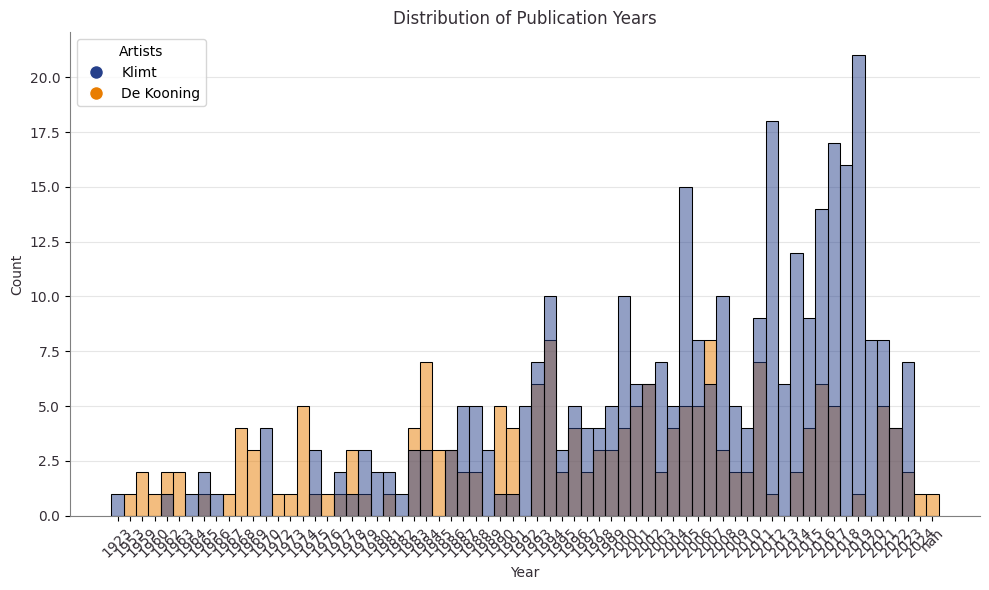

In [ ]:
# create histogram of publication per year
from matplotlib.lines import Line2D
# Concatenate the dataframes and add a 'category' column to differentiate between them
run_final_books_k = final_books_k.copy()
run_final_books_dk = final_books_dk.copy()
run_final_books_k['category'] = 'Klimt'
run_final_books_dk['category'] = 'De Kooning'
combined_df = pd.concat([run_final_books_k, run_final_books_dk])

# Sort the combined dataframe by date
combined_df = combined_df.sort_values(by="date")

# Plot the combined histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="date", hue="category", palette={'Klimt': '#26408B', 'De Kooning': '#E97D01'}, zorder=4)
plt.title("Distribution of Publication Years", color='#352f36')
plt.xlabel("Year", color='#352f36')
plt.ylabel("Count", color='#352f36')
plt.xticks(rotation=45, color='#352f36')  # Rotate the x-axis tick labels by 45 degrees
plt.yticks(color='#352f36')

plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=0)

sns.despine(right=True, top=True)

plt.tight_layout()  # Adjust layout to prevent label overlap

# Add custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#26408B', markersize=10, label='Klimt'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#E97D01', markersize=10, label='De Kooning')
]
plt.legend(handles=legend_elements, loc='upper left', title='Artists')
plt.show()




It's evident that Klimt garnered more interest starting from the 1990s. De Kooning's attention, on the other hand, remained highly variable.

In [ ]:
combined_df.to_csv('../docs/data/comparison_publication_per_year.csv')


# 3. Exhibition
## 3.1 Data Cleaning

This section checks how many bibliographic records are actually in the exhibition catalogues. Since no type of publication or genre was specified/extracted from data, we manually recognized exhibition catalogues by extracting specific keywords from the title. 

### 3.1.1 De Kooning

In [ ]:
# Create a mask for rows containing specified keywords in 'title', 'subtitle', or 'description' columns
mask = final_books_dk['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue |catalogo|exposition|retrospective|Ausstellung', case=False, na=False) 

# Create the exhibitions DataFrame containing rows where keywords are present
exhibitions_dataframe_dk = final_books_dk[mask]

# Remove the rows where keywords are present from the original DataFrame
dfbooks_dk = final_books_dk[~mask]

# Reset index of the original DataFrame
dfbooks_dk.reset_index(drop=True, inplace=True)

# Reset index of the exhibitions DataFrame
exhibitions_dataframe_dk.reset_index(drop=True, inplace=True)

print("\nExhibitions DataFrame:")
exhibitions_dataframe_dk.head()



Exhibitions DataFrame:


,title,publisher,date,isbn,Authors
0,"Hartung et les peintres lyriques : Schneider, ...",Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN
1,Willem de Kooning : drawing seeing-seeing draw...,"New York : Arena , 1998",1998,0965728080,NaN
2,École de New York : expressionnisme abstrait a...,"[Nice] : Nice musées , impr. 2005",2005,2913548695,NaN
3,"Action/abstraction : Pollock, de Kooning, and ...","New York : the Jewish museum , cop. 2008",2008,9780300122152,NaN
4,Burri : lo spazio di materia - tra Europa e US...,Città di Castello : Fondazione Palazzo Albizzi...,2016,8894063984,NaN


Spacy library has been used in order to perform Name Entity Recognition over the titles of the exhibition catalogues, to extract exhibition locations. Retrieving this kind of data could be useful to understand where or in which specific venues exhibitions have taken place. In this case we have used the ‘en_core_web_sm’ dataset because it was the most accurate one among those that we tried to use. In fact, even though dataset data is multilingual, Spacy’s multilingual dataset did not perform well on our titles. 

In [ ]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_sm")


# Process Text and Extract Location Names
def extract_location(text):
    doc = nlp(text)
    locations = [entity.text for entity in doc.ents if entity.label_ == 'GPE']
    return locations

# Apply the extract_location function to the 'title' and 'Subtitle' columns and store the result in a new column 'locations'
exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk.apply(lambda row: extract_location(row['title']), axis=1)

# Convert the list of extracted locations into a comma-separated string
exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk['Exhibit locations'].apply(lambda x: ', '.join(x))

exhibitions_dataframe_dk.to_csv('exhibitions_data_DK.csv', index=False)
exhibitions_dataframe_dk.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18472\1738927528.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk.apply(lambda row: extract_location(row['title']), axis=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\1738927528.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk['Exhibit locations'].apply(lambda x: ', '.join(x))


,title,publisher,date,isbn,Authors,Exhibit locations
0,"Hartung et les peintres lyriques : Schneider, ...",Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN,"Gottlieb, De Kooning, Degottex, Mathieu, Polke..."
1,Willem de Kooning : drawing seeing-seeing draw...,"New York : Arena , 1998",1998,0965728080,NaN,"New York, Andover, Mass., Ohio, Columbus"
2,École de New York : expressionnisme abstrait a...,"[Nice] : Nice musées , impr. 2005",2005,2913548695,NaN,Nice
3,"Action/abstraction : Pollock, de Kooning, and ...","New York : the Jewish museum , cop. 2008",2008,9780300122152,NaN,"New York, Saint Louis, Buffalo, N.Y."
4,Burri : lo spazio di materia - tra Europa e US...,Città di Castello : Fondazione Palazzo Albizzi...,2016,8894063984,NaN,"Afro, Andre, Arman, Beuys, Capograssi, Castell..."


In [ ]:
total_rows = len(final_books_dk)

# Count rows where 'title', 'subtitle', or 'description' contain specified keywords
keyword_rows = final_books_dk[final_books_dk['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False)]

# Get the count of rows containing the specified keywords
keyword_rows_count_dk = len(keyword_rows)

keyword_rows_not_count_dk = total_rows - keyword_rows_count_dk

percentage_keyword_rows_k = (keyword_rows_count_dk / total_rows) * 100

percentage_not_keyword_rows_k = ((keyword_rows_count_dk) /total_rows)* 100

data = {
    'key': ['not exhibition', 'exhibition'],
    'count': [keyword_rows_not_count_dk, keyword_rows_count_dk],
    'percentage': [percentage_not_keyword_rows_k, percentage_keyword_rows_k]
}

total_count = keyword_rows_not_count_dk + keyword_rows_count_dk
total_percentage = 100

total_row = pd.DataFrame({'key': ['Total'], 'count': [total_count], 'percentage': [total_percentage]})

# Create the DataFrame
count_exhib_percentage_dk = pd.DataFrame(data)

# Concatenate the total row DataFrame with the existing DataFrame
count_exhib_percentage_dk = pd.concat([count_exhib_percentage_dk, total_row], ignore_index=True)
count_exhib_percentage_dk


,key,count,percentage
0,not exhibition,145,17.14
1,exhibition,30,17.14
2,Total,175,100.00


### 3.1.2 Klimt

In [ ]:
total_rows = len(final_books_k)

# Count rows where 'title', 'subtitle', or 'description' contain specified keywords
keyword_rows = final_books_k[final_books_k['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False)]

# Get the count of rows containing the specified keywords
keyword_rows_count_k = len(keyword_rows)

keyword_rows_not_count_k = total_rows - keyword_rows_count_k

percentage_keyword_rows_k = (keyword_rows_count_k / total_rows) * 100

percentage_not_keyword_rows_k = ((keyword_rows_count_k) /total_rows)* 100

data = {
    'key': ['not exhibition', 'exhibition'],
    'count': [keyword_rows_not_count_k, keyword_rows_count_k],
    'percentage': [percentage_not_keyword_rows_k, percentage_keyword_rows_k]
}

total_count = keyword_rows_not_count_k + keyword_rows_count_k
total_percentage = 100

total_row = pd.DataFrame({'key': ['Total'], 'count': [total_count], 'percentage': [total_percentage]})

# Create the DataFrame
count_exhib_percentage_k = pd.DataFrame(data)

# Concatenate the total row DataFrame with the existing DataFrame
count_exhib_percentage_k = pd.concat([count_exhib_percentage_k, total_row], ignore_index=True)
count_exhib_percentage_k

,key,count,percentage
0,not exhibition,286,11.18
1,exhibition,36,11.18
2,Total,322,100.00


In [ ]:
# Assuming df is your original DataFrame

# Create a mask for rows containing specified keywords in 'title', 'subtitle', or 'description' columns
mask = final_books_k['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue |catalogo|exposition|retrospective|Ausstellung', case=False, na=False) 

# Create the exhibitions DataFrame containing rows where keywords are present
exhibitions_dataframe_k = final_books_k[mask]

# Remove the rows where keywords are present from the original DataFrame
dfbooks_k = final_books_k[~mask]

# Reset index of the original DataFrame
dfbooks_k.reset_index(drop=True, inplace=True)

# Reset index of the exhibitions DataFrame
exhibitions_dataframe_k.reset_index(drop=True, inplace=True)
exhibitions_dataframe_k.to_csv('exhibitions_data_KLI.csv', index=False)

# Display the exhibitions DataFrame containing rows where keywords are present
print("\nExhibitions DataFrame:")
exhibitions_dataframe_k.head()


Exhibitions DataFrame:


,title,publisher,date,isbn,Authors
0,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN
1,"Gustav Klimt : papiers érotiques, [exposition,...",[Paris] : Gallimard : Fondation Dina Vierny-Mu...,2005,2070118053,NaN
2,"Il simbolismo : da Moreau a Gauguin a Klimt, m...","Ferrara : Ferrara arte , impr. 2007",2007,8889793066,NaN
3,Heiliger Frühling : Gustav Klimt und die Anfän...,"Wien ; München : C. Brandstätter , 1999",1999,3854478569,NaN
4,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,9791259580344,NaN


In [ ]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_sm")

def extract_location(text):
    doc = nlp(text)
    locations = [entity.text for entity in doc.ents if entity.label_ == 'GPE']
    return locations


# Apply the extract_location function to the 'title' and  columns and store the result in a new column 'locations'
exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k.apply(lambda row: extract_location(row['title'] ), axis=1)

# Convert the list of extracted locations into a comma-separated string
exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k['Exhibit locations'].apply(lambda x: ', '.join(x))

exhibitions_dataframe_k.to_csv('exhibitions_data_KLI.csv', index=False)
exhibitions_dataframe_k.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18472\4180117119.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k.apply(lambda row: extract_location(row['title'] ), axis=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\4180117119.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k['Exhibit locations'].apply(lambda x: ', '.join(x))


,title,publisher,date,isbn,Authors,Exhibit locations
0,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN,"Vienna, Boston"
1,"Gustav Klimt : papiers érotiques, [exposition,...",[Paris] : Gallimard : Fondation Dina Vierny-Mu...,2005,2070118053,NaN,Paris
2,"Il simbolismo : da Moreau a Gauguin a Klimt, m...","Ferrara : Ferrara arte , impr. 2007",2007,8889793066,NaN,"Ferrara, Ferrara, giugno-16"
3,Heiliger Frühling : Gustav Klimt und die Anfän...,"Wien ; München : C. Brandstätter , 1999",1999,3854478569,NaN,"Farbe, Ausstellung"
4,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,9791259580344,NaN,"Piacenza, Galleria, Ricci Oddi"


## 3.2 Visualization


### 3.2.2 Exhibitions per year

Here, we observe the number of exhibitions per year for one artist.

**Research question**: How many exhibitons per year of each
#### 3.2.1.1 De Kooning


In [ ]:
# Assuming 'date' is the column name and exhibitions_dataframe_k is your DataFrame
date_counts_dk = exhibitions_dataframe_dk.groupby('date').size().reset_index(name='count')
date_counts_dk = date_counts_dk.sort_values(by='date')

# Display the DataFrame
date_counts_dk.head()

,date,count
0,1968,1
1,1969,1
2,1974,1
3,1976,1
4,1983,1


In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.

# #Plot exhhibition over time
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=date_counts_dk, x='date', y='count', color='#E97D01')
# plt.title('Exhibitions Count Over Time', color='#352f36')  # Change title color
# plt.xlabel('Date', color='#352f36')  # Change xlabel color
# plt.ylabel('Count', color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()
# plt.show()


#### 3.2.1.2 Klimt

In [ ]:
# Assuming 'date' is the column name and exhibitions_dataframe_k is your DataFrame
date_counts_k = exhibitions_dataframe_k.groupby('date').size().reset_index(name='count')
date_counts_k = date_counts_k.sort_values(by='date')

# Display the DataFrame
date_counts_k.head()

,date,count
0,1965,1
1,1966,1
2,1970,1
3,1984,1
4,1994,1


In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.


# plt.figure(figsize=(10, 6))
# sns.lineplot(data=date_counts_k, x='date', y='count', color='#26408B')
# plt.title('Exhibitions Count Over Time', color='#352f36')  # Change title color
# plt.xlabel('Date', color='#352f36')  # Change xlabel color
# plt.ylabel('Count', color='#352f36')  # Change ylabel color
# plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
# plt.yticks(color='#352f36')  # Change yticks color

# sns.despine(right=True, top=True)  # Remove top and right margin

# plt.tight_layout()
# plt.show()


#### 3.2.1.3 Comparing Data

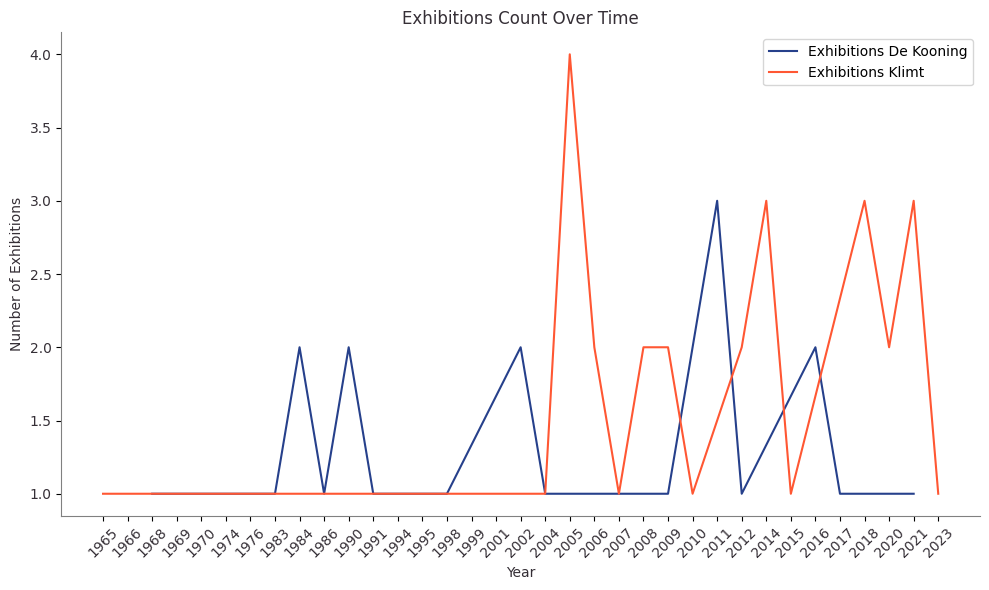

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Outer merge the DataFrames on the 'date' column
merged_df = pd.merge(date_counts_dk, date_counts_k, on='date', how='outer')

# Rename the count columns
merged_df.rename(columns={'count_x': 'Exhibitions De Kooning', 'count_y': 'Exhibitions Klimt'}, inplace=True)

# Sort by 'date'
merged_df.sort_values(by='date', inplace=True)

sns.lineplot(data=merged_df, x='date', y='Exhibitions De Kooning', color='#26408B', label='Exhibitions De Kooning')
sns.lineplot(data=merged_df, x='date', y='Exhibitions Klimt', color='#FF5733', label='Exhibitions Klimt')

plt.title('Exhibitions Count Over Time', color='#352f36')  # Change title color
plt.xlabel('Year', color='#352f36')  # Change xlabel color
plt.ylabel('Number of Exhibitions', color='#352f36')  # Change ylabel color
plt.xticks(rotation=45, color='#352f36')  # Change xticks color and rotation
plt.yticks(color='#352f36')  # Change yticks color

sns.despine(right=True, top=True)  # Remove top and right margin

plt.legend()
plt.tight_layout()
plt.show()



The available data is quite limited, making it challenging to extract meaningful insights.

In [ ]:
merged_df.to_csv('../docs/data/comparison_exhibition_per_year.csv')

### 3.2.1 Distribtion of exhibition catalogue over materials

Here, we examine how many of our extracted data from the web pertain to exhibitions catalogue.

**Research question**: What is the distribution and the percentage of data extracted that are catlogues?

#### 3.2.2.1 De Kooning

In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.

# Plot the percentage of exhibition in data extracted online
# # settings
# sizes = [keyword_rows_count_dk, keyword_rows_not_count_dk]
# labels = ['Exhibitions', 'Not Exhibition']
# colors = ['#B53302','#E97D01']
# # explode = [0, 0.1]
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5)

# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in online data - De Kooning', color = '#352f36')

# plt.show()

#### 3.2.2.2 Klimt

In [ ]:
##This code shows the plot of the above mentioned data.
##To make the notebook lighter we live it as not automatically runned
##To show it de comment the cell.

# Plot the percentage of exhibition in data extracted online
# # settings
# sizes = [keyword_rows_count_k, keyword_rows_not_count_k]
# labels = ['Exhibitions', 'Not Exhibition']
# colors = ['#0F084B','#26408B']
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in online data - Klimt', color = '#352f36')

# plt.show()

#### 3.2.2.3 Comparing Data

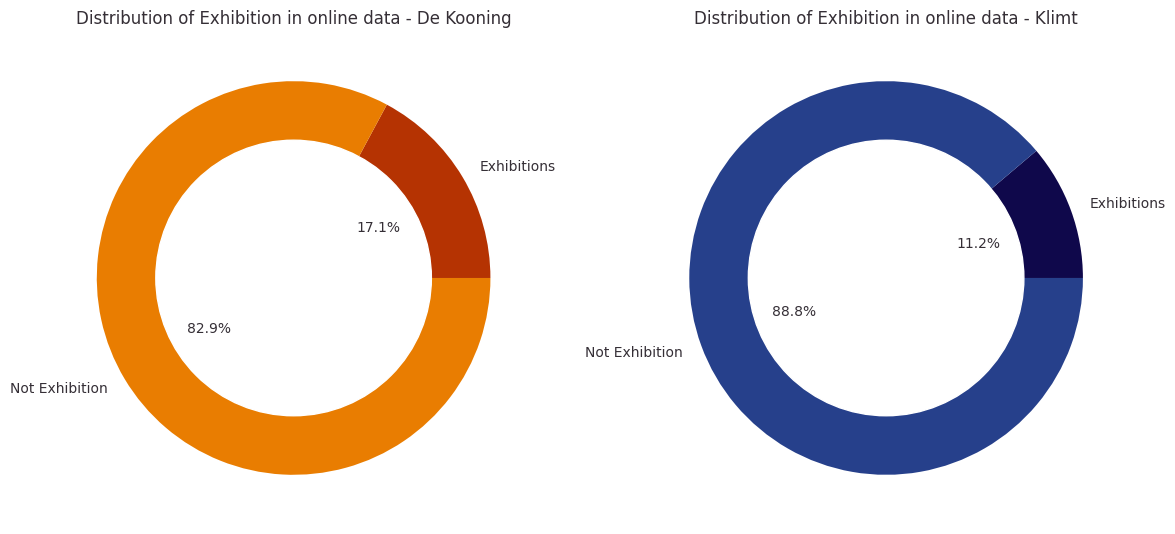

In [ ]:
# Plot the percentage of exhibition in data extracted online

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for De Kooning
sizes_dk = [keyword_rows_count_dk, keyword_rows_not_count_dk]
labels_dk = ['Exhibitions', 'Not Exhibition']
colors_dk = ['#B53302', '#E97D01']
axes[0].pie(sizes_dk, labels=labels_dk, colors=colors_dk, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[0].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[0].set_title('Distribution of Exhibition in online data - De Kooning', color='#352f36')

# Plot for Klimt
sizes_k = [keyword_rows_count_k, keyword_rows_not_count_k]
labels_k = ['Exhibitions', 'Not Exhibition']
colors_k = ['#0F084B', '#26408B']
axes[1].pie(sizes_k, labels=labels_k, colors=colors_k, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[1].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[1].set_title('Distribution of Exhibition in online data - Klimt', color='#352f36')

plt.tight_layout()
plt.show()


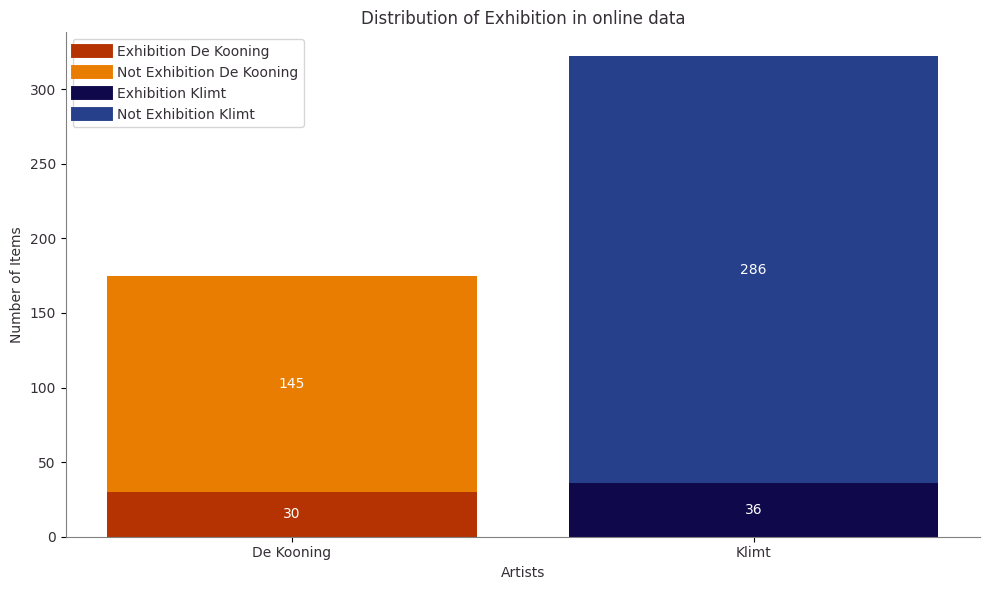

In [ ]:
# Define data
categories = ['De Kooning', 'Klimt']
exhibition_counts = [keyword_rows_count_dk, keyword_rows_count_k]
not_exhibition_counts = [keyword_rows_not_count_dk, keyword_rows_not_count_k]

# Define colors
exhibition_colors = ['#B53302', '#0F084B']
not_exhibition_colors = ['#E97D01', '#26408B']

# Create stacked bar plot
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(categories))

# Plot the bars for 'Exhibition'
bars_exhibition = plt.bar(index, exhibition_counts, color=exhibition_colors, label='Exhibition')

# Plot the bars for 'Not Exhibition' on top of 'Exhibition'
bars_not_exhibition = plt.bar(index, not_exhibition_counts, color=not_exhibition_colors, bottom=exhibition_counts, label='Not Exhibition')

# Add value labels for each bar
for i in range(len(categories)):
    plt.text(index[i], exhibition_counts[i] / 2, str(exhibition_counts[i]), color='white', ha='center', va='center')
    plt.text(index[i], exhibition_counts[i] + not_exhibition_counts[i] / 2, str(not_exhibition_counts[i]), color='white', ha='center', va='center')

plt.xlabel('Artists', color='#352f36')  # Change xlabel color
plt.ylabel('Number of Items', color='#352f36')  # Change ylabel color
plt.title('Distribution of Exhibition in online data', color='#352f36')  # Change title color
plt.xticks(index, categories, color='#352f36')  # Change xticks color
plt.yticks(color='#352f36')  # Change yticks color

# Create custom legend for both sets of bars
legend_elements = [
    Line2D([0], [0], color='#B53302', lw=10, label='Exhibition De Kooning'),
    Line2D([0], [0], color='#E97D01', lw=10, label='Not Exhibition De Kooning'),
    Line2D([0], [0], color='#0F084B', lw=10, label='Exhibition Klimt'),
    Line2D([0], [0], color='#26408B', lw=10, label='Not Exhibition Klimt')
]
legend = plt.legend(handles=legend_elements, loc='upper left')
for text in legend.get_texts():
    text.set_color('#352f36')  # Set legend label color

# Remove top and right margin
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()


The relatively consistent amount of data prompts us to consider that some patterns or insights might emerge despite the limitations.

### 3.2.3 Publication and Exhibitions per Year
Here we explore the relationship between data coming from section bibliography and exhibitions
**Research question**: How many publication and Exhibition per year?

In [ ]:
# Exhibitions per year

exhibtion_date_count = date_counts_dk.sort_values(by="date")
exhibtion_date_count.head()

,date,count
0,1968,1
1,1969,1
2,1974,1
3,1976,1
4,1983,1


In [ ]:
final_books_dk

import pandas as pd

# Drop rows with 'nan' strings in the 'date' column
final_books_dk = final_books_dk[final_books_dk['date'] != 'nan']

# Convert the "date" column to integers
final_books_dk['date'] = final_books_dk['date'].astype(int)

# Count the values in the 'date' column
date_counts = final_books_dk['date'].value_counts().reset_index()

# Rename the columns
date_counts.columns = ['date', 'count']

publication_date_count = date_counts.sort_values(by="date")
publication_date_count.head()


,date,count
45,1953,1
35,1959,2
42,1960,1
30,1962,2
37,1963,2


In [ ]:
# merge publication_date_count and exhibition_date count
# Merge the DataFrames on the 'year' column
# Convert columns to integers if they are not already
publication_date_count['date'] = publication_date_count['date'].astype(int)
exhibtion_date_count['date'] = exhibtion_date_count['date'].astype(int)

# Merge the DataFrames on the 'year' column
merged_data = pd.merge(publication_date_count, exhibtion_date_count, on='date', suffixes=('_publication', '_exhibition'), how='inner')

# Drop rows with any NaN values
merged_data = merged_data.dropna()


merged_data


,date,count_publication,count_exhibition
0,1968,4,1
1,1969,3,1
2,1974,5,1
3,1976,1,1
4,1983,4,1
5,1984,7,2
6,1986,3,1
7,1990,5,2
8,1991,4,1
9,1994,8,1


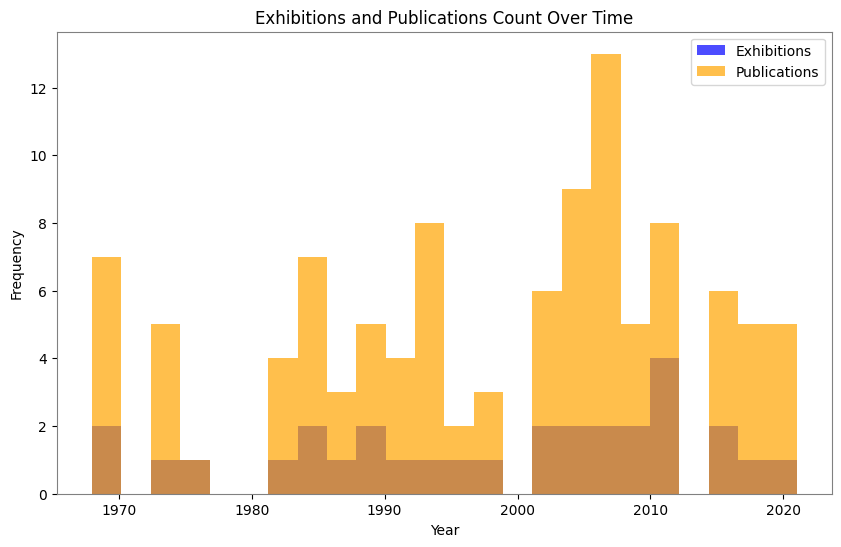

In [ ]:
# RICONTROLLA
# Plotting histograms for count of exhibitions and count of publications on the same graph
plt.figure(figsize=(10, 6))

# Plot histogram for count of exhibitions
plt.hist(merged_data['date'], bins=merged_data['date'].nunique(), weights=merged_data['count_exhibition'], color='blue', alpha=0.7, label='Exhibitions')

# Plot histogram for count of publications
plt.hist(merged_data['date'], bins=merged_data['date'].nunique(), weights=merged_data['count_publication'], color='orange', alpha=0.7, label='Publications')

plt.title('Exhibitions and Publications Count Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

plt.show()


There appears to be no clear correlation between the frequency of exhibitions and publications over time.

# 4. De Kooning - a "ground truth" case

It exists a web site of De Kooning storing many data about this author, between this also exhibitions and publications. Therefore, we decided to use it as a "Ground truth", a dataset that can be compared with the data extracted from the web to see how much they and our approach can be trusted.
## 4.1 Data Mining
### Complete list of De Kooning's one-man exibitions. 
In our research we considered also the number of exibitions and the venue of the exibitions as parameters in order to check whether the reputation of the artist has changed over the years. However, no complete dataset on artists' exhibitions was found. In order to get an idea on how many exibitions have been covered on catalogues, and, in particular, how many exhibitions are traced by bibliographic records on BnF and Gallica, we needed a "ground truth" to state if those sources of information could be somehow comprehensive. 

The case study is Willem de Kooning, since all data about exibitions are uploaded on the website of the Willem de Kooning Foundation. 
The result of the webscraping are shown here, with a total of 131 exhibitions, 81 possess a catalogue. 

In bibliography_DK.ipynb extraction from SPARQL endpoint of BnF and Google Books API has been done in order to get all bibliographic records on De Kooning - 31 of them are records on exhibitions. So 39% of exibitions with catalogue are present in that dataset, 23% of the total exhibitions are covered. There's also the need to say that the bibliographic records extracted do not concern only one-man shows, so they include further shows that are not present in the dataset reported here below. 


### 4.1.1 Exhibition

In [ ]:
import requests 
from bs4 import BeautifulSoup as bs 

URLs = [
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1940',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1950',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1960',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1970',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1980',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1990',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/2000',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/2010'
] 

titles_list = []

for url in URLs: 
    req = requests.get(url) 
    soup = bs(req.text, 'html.parser') 
    
    titles = soup.find_all('p', class_="unit_title spacing_03") 
    
    for title in titles:
        titles_list.append(title.text.strip().replace("\xa0\n", ";").replace("\xa0", ";").replace('\n',';'))


titles_list

['de Kooning;Charles Egan Gallery, New York, New York, (4/12/1948 to 5/12/1948), no catalogue.',
 'Willem de Kooning;Charles Egan Gallery, New York, New York, (4/1/1951 to 4/30/1951), no catalogue.',
 'Willem de Kooning:  Paintings on the Theme of the Woman;Sidney Janis Gallery, New York, New York, (3/16/1953 to 4/11/1953), no catalogue.',
 'Retrospective (de Kooning, 1935-53);Organized by School of the Museum of Fine Arts, Boston, Massachusetts, (4/21/1953 to 7/3/1953), catalogue.',
 'Recent Oils by Willem de Kooning;Martha Jackson Gallery, New York, New York, (11/9/1955 to 12/3/1955), catalogue.',
 'Willem de Kooning:  Recent Paintings;Sidney Janis Gallery, New York, New York, (4/2/1956 to 4/28/1956), no catalogue.',
 'Willem de Kooning;Sidney Janis Gallery, New York, New York, (5/4/1959 to 6/1/1959), no catalogue.',
 'Willem de Kooning;Paul Kantor Gallery, Beverly Hills, California, (4/3/1961 to 4/29/1961), catalogue.',
 'Recent Paintings by Willem de Kooning;Sidney Janis Gallery, N

In [ ]:
replacements = {
    "Inc.": "Inc.",
    "and": "and",
    "Science": "Science",
    "Ontario": "",
    "The": "The",
    "Palazzo": "Palazzo",
    "Droll": "Droll",
    "Fourcade": " Fourcade",
    "University": "University",
    "Ishibashi": "Ishibashi",
    "Smithsonian": "Smithsonian",
    "Millbrook": "Millbrook",
    "Seattle": " Seattle",
    "World": "World",
    "Carnegie": "Carnegie",
    "Akademie ": "Akademie ",
    "Berkeley": "Berkeley",
    "Wellesley": "Wellesley",
    "Mitchell-Innes": "Mitchell-Innes",
    "Art": "Art",
    "Colorado": "Colorado"
}

new_list = []

# Iterate through each string in the original list
for item in titles_list:
    # Replace ';(' with ' ('
    item = item.replace(';(', ' (')
    
    # Find the index of the first occurrence of "catalogue." or "brochure."
    catalogue_index = item.find("catalogue.")
    brochure_index = item.find("brochure.")
    
    # Determine the index of the first occurrence among "catalogue." and "brochure."
    if catalogue_index != -1 and brochure_index != -1:
        first_occurrence_index = min(catalogue_index, brochure_index)
    elif catalogue_index != -1:
        first_occurrence_index = catalogue_index
    elif brochure_index != -1:
        first_occurrence_index = brochure_index
    else:
        first_occurrence_index = len(item)
    
    # Slice the string up to the first occurrence
    item = item[:first_occurrence_index + len("catalogue.")]
    
    parts = item.split(';')

    if len(parts) == 2:
        second_part = parts[1]
        # Iterate through each keyword in the replacements dictionary
        for keyword, replacement in replacements.items():
            if ", " in second_part and keyword in second_part:
                # Get the index of the keyword
                keyword_index = second_part.index(keyword)
                # Get the index of the last ", " before the keyword
                comma_index = second_part.rfind(", ", 0, keyword_index)
                # Replace ", " with " " before the keyword
                if comma_index != -1:  # Ensure ", " was found before the keyword
                    second_part = second_part[:comma_index] + " " + second_part[comma_index + 2:]
                # Replace the keyword with the corresponding replacement
                second_part = second_part.replace(keyword, replacement)
        # Split the second part (after ';') by ','
        second_parts = second_part.split(',')
        # Remove the third element if the length is greater than 5
        if len(second_parts) > 5:
            del second_parts[1]
        # Create a sublist with the first part and the second parts
        sublist = [parts[0]] + second_parts
        # Append the sublist to the new list
        new_list.append(sublist)

print(new_list)


[['de Kooning', 'Charles Egan Gallery', ' New York', ' New York', ' (4/12/1948 to 5/12/1948)', ' no catalogue.'], ['Willem de Kooning', 'Charles Egan Gallery', ' New York', ' New York', ' (4/1/1951 to 4/30/1951)', ' no catalogue.'], ['Willem de Kooning:  Paintings on the Theme of the Woman', 'Sidney Janis Gallery', ' New York', ' New York', ' (3/16/1953 to 4/11/1953)', ' no catalogue.'], ['Retrospective (de Kooning, 1935-53)', 'Organized by School of the Museum of Fine Arts', ' Boston', ' Massachusetts', ' (4/21/1953 to 7/3/1953)', ' catalogue.'], ['Recent Oils by Willem de Kooning', 'Martha Jackson Gallery', ' New York', ' New York', ' (11/9/1955 to 12/3/1955)', ' catalogue.'], ['Willem de Kooning:  Recent Paintings', 'Sidney Janis Gallery', ' New York', ' New York', ' (4/2/1956 to 4/28/1956)', ' no catalogue.'], ['Willem de Kooning', 'Sidney Janis Gallery', ' New York', ' New York', ' (5/4/1959 to 6/1/1959)', ' no catalogue.'], ['Willem de Kooning', 'Paul Kantor Gallery', ' Beverly H

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initialize empty lists for each column
exhibition = []
venue = []
city = []
state = []
date = []
catalogue = []

# Populate the lists from the data in x
for i in new_list:
    if len(i) >= 6:
        exhibition.append(i[0])
        venue.append(i[1])
        city.append(i[2])
        state.append(i[3])
        date.append(i[4])
        catalogue.append(i[5])


exhibition_one_date_df_website = pd.DataFrame(columns=["Exhibition_name", "Venue", "City", 'State', 'date', 'catalogue'])

exhibition_one_date_df_website['Exhibition_name'] = exhibition
exhibition_one_date_df_website['Venue'] = venue
exhibition_one_date_df_website['City'] = city
exhibition_one_date_df_website['State'] = state
exhibition_one_date_df_website['date'] = date
exhibition_one_date_df_website['catalogue'] = catalogue

for i, item in enumerate(exhibition_one_date_df_website['catalogue']): #modificato oggi
    if "." in item:
        x = item.split('.')
        exhibition_one_date_df_website.at[i, 'catalogue'] = x[0]

exhibition_one_date_df_website.head()

,Exhibition_name,Venue,City,State,date,catalogue
0,de Kooning,Charles Egan Gallery,New York,New York,(4/12/1948 to 5/12/1948),no catalogue
1,Willem de Kooning,Charles Egan Gallery,New York,New York,(4/1/1951 to 4/30/1951),no catalogue
2,Willem de Kooning: Paintings on the Theme of ...,Sidney Janis Gallery,New York,New York,(3/16/1953 to 4/11/1953),no catalogue
3,"Retrospective (de Kooning, 1935-53)",Organized by School of the Museum of Fine Arts,Boston,Massachusetts,(4/21/1953 to 7/3/1953),catalogue
4,Recent Oils by Willem de Kooning,Martha Jackson Gallery,New York,New York,(11/9/1955 to 12/3/1955),catalogue


In [ ]:
import pandas as pd

for i, item in enumerate(exhibition_one_date_df_website['date']):

    parts = item.strip('()').split(' to ')
    modified_dates = []
    for date_str in parts:
        if "??/??" in date_str:
            month_and_year = date_str.split('/')[-1]  # Extract month and year
            modified_date = "01/01/" + month_and_year  # Replace day with "01"
            modified_dates.append(modified_date)
        elif '??' in date_str:
            month_and_year = date_str.split('/')[0] + '/01/' + date_str.split('/')[-1]
            modified_dates.append(month_and_year)
        else:
            modified_dates.append(date_str)
    exhibition_one_date_df_website.at[i, 'date'] = ' to '.join(modified_dates)
    

def extract_starting_range(date_str):
    # Split the date range string by ' to ' or '-'
    dates = date_str.strip('( )').split(' to ')
    if len(dates) == 1:  # If ' to ' is not found, try splitting by '-'
        dates = date_str.strip('( )').split('\u2013')
    if len(dates) < 2:
        return None  
    
    starting_date = dates[0]
    
    # Convert the starting date to datetime format and extract the date part
    return pd.to_datetime(starting_date, errors='coerce').date()


def extract_ending_range(date_str):
    dates = date_str.strip('( )').split(' to ')
    if len(dates) == 1:  # If ' to ' is not found, try splitting by '-'
        dates = date_str.strip('( )').split('\u2013')
    if len(dates) < 2:
        return None  
    ending_date = dates[1]
    
    # Convert the ending date to datetime format and extract the date part
    return pd.to_datetime(ending_date, errors='coerce').date()

exhibition_df_website = exhibition_one_date_df_website.copy()
# Apply the function to the 'date' column to create a new column with datetime objects
exhibition_df_website['startingdate'] = exhibition_df_website['date'].apply(extract_starting_range)
exhibition_df_website['endingdate'] = exhibition_df_website['date'].apply(extract_ending_range)



exhibition_df_website.reset_index(drop=True, inplace=True)

# df.drop('date', axis=1, inplace=True)

# Display the filtered DataFrame
exhibition_df_website.head()



,Exhibition_name,Venue,City,State,date,catalogue,startingdate,endingdate
0,de Kooning,Charles Egan Gallery,New York,New York,(4/12/1948 to 5/12/1948,no catalogue,1948-04-12,1948-05-12
1,Willem de Kooning,Charles Egan Gallery,New York,New York,(4/1/1951 to 4/30/1951,no catalogue,1951-04-01,1951-04-30
2,Willem de Kooning: Paintings on the Theme of ...,Sidney Janis Gallery,New York,New York,(3/16/1953 to 4/11/1953,no catalogue,1953-03-16,1953-04-11
3,"Retrospective (de Kooning, 1935-53)",Organized by School of the Museum of Fine Arts,Boston,Massachusetts,(4/21/1953 to 7/3/1953,catalogue,1953-04-21,1953-07-03
4,Recent Oils by Willem de Kooning,Martha Jackson Gallery,New York,New York,(11/9/1955 to 12/3/1955,catalogue,1955-11-09,1955-12-03


### 4.1.2 Monograph

In [ ]:
import requests 
from bs4 import BeautifulSoup as bs 

URLs = [
    'https://www.dekooning.org/the-artist/bibliography/monographs/1950',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1960',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1970',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1980',
    'https://www.dekooning.org/the-artist/bibliography/monographs/1990',
    'https://www.dekooning.org/the-artist/bibliography/monographs/2000',
    'https://www.dekooning.org/the-artist/bibliography/monographs/2010',
    'https://www.dekooning.org/the-artist/bibliography/monographs/2020'
] 

titles_li = []

for url in URLs: 
    req = requests.get(url) 
    soup = bs(req.text, 'html.parser') 
    
    titles = soup.find_all('div', class_="unit_copy spacing_03") 
    
    for title in titles:
        titles_li.append(title.text.strip().replace("\xa0\n", ";").replace("\xa0", ";").replace('\n',';').replace('\t', '').replace(':;;', ': ').replace(";;With", " With")) 

titles_li



['Greenberg, Clement.;;de Kooning, 1935-53.;;Exh. cat.;;Boston: School of the Museum of Fine Arts,;;1953.',
 'Recent Oils by Willem de Kooning. With a foreword by Kenneth B. Sawyer.;;Exh. cat.;;New York: Martha Jackson Gallery,;;1955.',
 'Hess, Thomas B.;;Willem de Kooning.;;The Great American Artists Series.;;New York: George Braziller,;;1959.',
 'Janis, Harriet, and Rudi Blesh.;;de Kooning.;;New York: Grove Press,;;1960.',
 'Odets, Clifford.;;Willem de Kooning.;;Exh. cat.;;Beverly Hills: Paul Kantor Gallery,;;1961.',
 'Hess, Thomas B.;;Recent Paintings by Willem de Kooning.;;Exh. cat.;;New York: Sidney Janis Gallery,;;1962.',
 "Goodman, Merle.;;'Woman' Drawings by Willem de Kooning.;;Exh. cat.;;Buffalo: James Goodman Gallery,;;1964.",
 'Willem de Kooning: Retrospective, Drawings, 1936-1963.;;Exh. cat.;;New York: Allan Stone Gallery,;;1964.',
 'Ashton, Dore, and Willem de Kooning.;;Willem de Kooning.;;Exh. cat.;;Northampton: Smith College Museum of Art,;;1965.',
 'de Kooning/Cornell.;

In [ ]:
import re
new_li = []

# Iterate through each string in the original list
for item in titles_li:

# Split the string 'item' using either ';;' or ', 1' as the delimiter
    parts = re.split(r';;|; ;', item)

    new_li.append(parts)

print(new_li)

[['Greenberg, Clement.', 'de Kooning, 1935-53.', 'Exh. cat.', 'Boston: School of the Museum of Fine Arts,', '1953.'], ['Recent Oils by Willem de Kooning. With a foreword by Kenneth B. Sawyer.', 'Exh. cat.', 'New York: Martha Jackson Gallery,', '1955.'], ['Hess, Thomas B.', 'Willem de Kooning.', 'The Great American Artists Series.', 'New York: George Braziller,', '1959.'], ['Janis, Harriet, and Rudi Blesh.', 'de Kooning.', 'New York: Grove Press,', '1960.'], ['Odets, Clifford.', 'Willem de Kooning.', 'Exh. cat.', 'Beverly Hills: Paul Kantor Gallery,', '1961.'], ['Hess, Thomas B.', 'Recent Paintings by Willem de Kooning.', 'Exh. cat.', 'New York: Sidney Janis Gallery,', '1962.'], ['Goodman, Merle.', "'Woman' Drawings by Willem de Kooning.", 'Exh. cat.', 'Buffalo: James Goodman Gallery,', '1964.'], ['Willem de Kooning: Retrospective, Drawings, 1936-1963.', 'Exh. cat.', 'New York: Allan Stone Gallery,', '1964.'], ['Ashton, Dore, and Willem de Kooning.', 'Willem de Kooning.', 'Exh. cat.', '

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initialize empty lists for each column
author = []
title = []
type = []
publisher = []
date = []

# Populate the lists from the data in x
for i in new_li:
    if len(i) == 5:
        author.append(i[0])
        title.append(i[1])
        if 'Exh.' in  i[2]  or 'PhD ' in i[2] or 'Series' in i[2]:
            type.append(i[2])
        else:
            type.append('')
        publisher.append(i[3])
        date.append(i[4])
    elif len(i) ==4:
        if 'de Kooning' in i[1]:
            author.append(i[0])
            title.append(i[1])
            type.append('')
            publisher.append(i[2])
            date.append(i[3])
        elif 'de Kooning' in i[0] :
            author.append('')
            title.append(i[0])
            type.append(i[1])
            publisher.append(i[2])
            date.append(i[3])
        
        

# Create DataFrame
pubblication_df_website = pd.DataFrame({"author": author, "title": title, "type": type, 'publisher': publisher, 'date': date})
pubblication_df_website['publisher'] = pubblication_df_website['publisher'].str.split(',').str[0]
pubblication_df_website['date'] = pubblication_df_website['date'].str.extract(r'(\d{4})')

pubblication_df_website.head()


,author,title,type,publisher,date
0,"Greenberg, Clement.","de Kooning, 1935-53.",Exh. cat.,Boston: School of the Museum of Fine Arts,1953
1,,Recent Oils by Willem de Kooning. With a forew...,Exh. cat.,New York: Martha Jackson Gallery,1955
2,"Hess, Thomas B.",Willem de Kooning.,The Great American Artists Series.,New York: George Braziller,1959
3,"Janis, Harriet, and Rudi Blesh.",de Kooning.,,New York: Grove Press,1960
4,"Odets, Clifford.",Willem de Kooning.,Exh. cat.,Beverly Hills: Paul Kantor Gallery,1961


## 4.2 Visualization
In this section we try to see the actual representativeness of the data extracted from the web for what concers the publications and the exhibition catalogues of De Kooning. The specific **reserch quesetions** will be:

- How many Exhibitions catalogue are in the web site? How much this value differs from the data obtained?


### 4.2.1 Different coverage of Data

We already calculated the value of data on web

In [ ]:
#This code shows the plot of the above mentioned data.
#To make the notebook lighter we live it as not automatically runned
#To show it de comment the cell.

# # Plot the percentage of exhibition in data extracted online
# # settings
# sizes = [keyword_rows_count_dk, keyword_rows_not_count_dk]
# labels = ['Exhibitions', 'Not Exhibition']
# colors = ['#B53302','#E97D01']
# # explode = [0, 0.1]
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5)

# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in online data - De Kooning', color = '#352f36')

# plt.show()

We perform the same calculation on data coming from the web site

In [ ]:
# Percentage of  catalogue in bibliographic data
# Filter rows where 'type' is 'exh.cat'
exh_cat_df = pubblication_df_website[pubblication_df_website['type'] == 'Exh. cat.']

# Count of all other rows
other_count = len(pubblication_df_website) - len(exh_cat_df)

# Create a new DataFrame with counts
exhibition_in_bibl_count_df = pd.DataFrame({'type': ['Exh. cat.', 'others'], 'count': [len(exh_cat_df), other_count]})

# Display the result DataFrame
exhibition_in_bibl_count_df

,type,count
0,Exh. cat.,102
1,others,42


In [ ]:
# Exhibitions in web
exhibitions_in_site = exhibition_in_bibl_count_df['count'][0]
other_in_site = exhibition_in_bibl_count_df['count'][1]

exhibitions_in_site

102

In [ ]:
#This code shows the plot of the above mentioned data.
#To make the notebook lighter we live it as not automatically runned
#To show it de comment the cell.

# # settings
# sizes = [exhibitions_in_site, other_in_site]
# labels = ['Exhibitions cat. in website', 'Other texts']
# colors = ['#B53302','#E97D01']
# # explode = [0, 0.1]
# # Create a pieplot
# plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})

# # add a circle at the center to transform it in a donut chart
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Distribution of Exhibition in Foundation data', color = '#352f36')

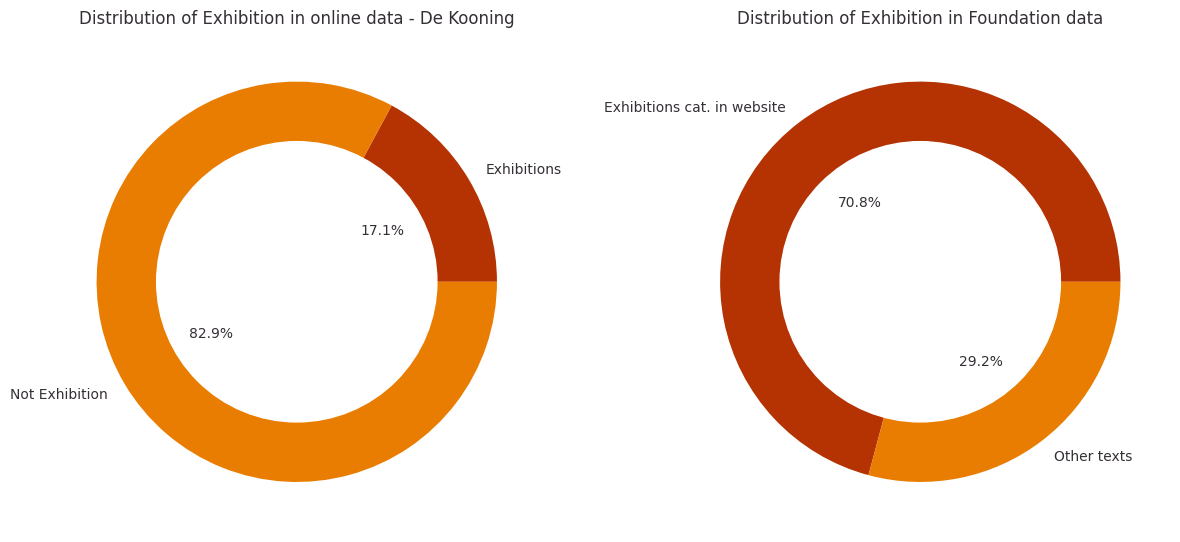

In [ ]:
# Plot the percentage of exhibition in data extracted online

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for De Kooning
sizes_dk = [keyword_rows_count_dk, keyword_rows_not_count_dk]
labels_dk = ['Exhibitions', 'Not Exhibition']
colors_dk = ['#B53302', '#E97D01']
axes[0].pie(sizes_dk, labels=labels_dk, colors=colors_dk, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[0].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[0].set_title('Distribution of Exhibition in online data - De Kooning', color='#352f36')

# Plot for Klimt
sizes_k = sizes = [exhibitions_in_site, other_in_site]
labels_k = ['Exhibitions cat. in website', 'Other texts']
colors_k = ['#B53302', '#E97D01']
axes[1].pie(sizes_k, labels=labels_k, colors=colors_k, autopct='%1.1f%%', startangle=0, pctdistance=0.5, textprops={'color': '#352f36'})
axes[1].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[1].set_title('Distribution of Exhibition in Foundation data', color='#352f36')

plt.tight_layout()
plt.show()

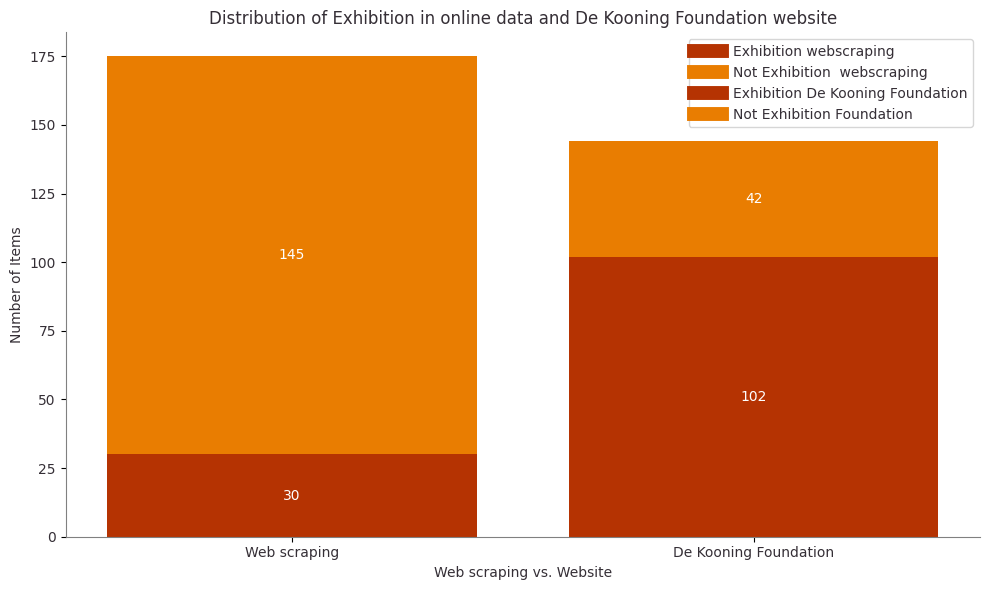

In [ ]:
# Define data
categories = ['Web scraping', 'De Kooning Foundation']
exhibition_counts = [keyword_rows_count_dk, exhibitions_in_site]
not_exhibition_counts = [keyword_rows_not_count_dk, other_in_site]

# Define colors
exhibition_colors = ['#B53302', '#B53302']
not_exhibition_colors = ['#E97D01', '#E97D01']

# Create stacked bar plot
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(categories))

# Plot the bars for 'Exhibition'
bars_exhibition = plt.bar(index, exhibition_counts, color=exhibition_colors, label='Exhibition')

# Plot the bars for 'Not Exhibition' on top of 'Exhibition'
bars_not_exhibition = plt.bar(index, not_exhibition_counts, color=not_exhibition_colors, bottom=exhibition_counts, label='Not Exhibition')

# Add value labels for each bar
for i in range(len(categories)):
    plt.text(index[i], exhibition_counts[i] / 2, str(exhibition_counts[i]), color='white', ha='center', va='center')
    plt.text(index[i], exhibition_counts[i] + not_exhibition_counts[i] / 2, str(not_exhibition_counts[i]), color='white', ha='center', va='center')

plt.xlabel('Web scraping vs. Website', color='#352f36')  # Change xlabel color
plt.ylabel('Number of Items', color='#352f36')  # Change ylabel color
plt.title('Distribution of Exhibition in online data and De Kooning Foundation website', color='#352f36')  # Change title color
plt.xticks(index, categories, color='#352f36')  # Change xticks color
plt.yticks(color='#352f36')  # Change yticks color

# Create custom legend for both sets of bars
legend_elements = [
    Line2D([0], [0], color='#B53302', lw=10, label='Exhibition webscraping'),
    Line2D([0], [0], color='#E97D01', lw=10, label='Not Exhibition  webscraping'),
    Line2D([0], [0], color='#B53302', lw=10, label='Exhibition De Kooning Foundation'),
    Line2D([0], [0], color='#E97D01', lw=10, label='Not Exhibition Foundation')
]
legend = plt.legend(handles=legend_elements, loc='upper right')
for text in legend.get_texts():
    text.set_color('#352f36')  # Set legend label color

# Remove top and right margin
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()


The disparity in distribution and proportion of our data suggests that our web scraping method may not be effective, as not all exhibition catalogues contain the word or similar terms in their title.

### 4.2.2 Pubblication per year

In [ ]:
#publications per year in website
# Get the count of each unique year
count_series = pubblication_df_website['date'].value_counts()

# Convert the Series to a DataFrame
pubblication_per_year_website_df = count_series.reset_index()

# Rename the columns to 'year' and 'count'
pubblication_per_year_website_df.columns = ['date', 'count']

# Sort the DataFrame by the 'year' column
result_df = pubblication_per_year_website_df.sort_values(by='date')

result_df.reset_index(drop=True, inplace=True)
pubblication_per_year_website_df.head()


,date,count
0,1995,6
1,1978,6
2,2006,5
3,1975,5
4,1984,5


In [ ]:
# Exhibitions with catalogue per year

# Drop rows where 'date' column has value 'Exh. cat'
new_publication_df_website = pubblication_df_website[pubblication_df_website['type'] != 'Exh. cat.']
new_publication_df_website

# Get the count of each unique year
count_series = new_publication_df_website['date'].value_counts()

# Convert the Series to a DataFrame
result_df_no_cat = count_series.reset_index()

# Rename the columns to 'year' and 'count'
result_df_no_cat.columns = ['date', 'count']

# Sort the DataFrame by the 'year' column
result_df_no_cat = result_df_no_cat.sort_values(by='date')

result_df_no_cat

result_df_no_cat.reset_index(drop=True, inplace=True)

result_df_no_cat

,date,count
0,1959,1
1,1960,1
2,1971,1
3,1972,2
4,1973,2
5,1975,1
6,1976,1
7,1982,1
8,1983,1
9,1985,2


In [ ]:
# Exhibition in website per year
# Concatenate 'startingdate' and 'endingdate' columns to create a single column containing all dates

timeline_df = exhibition_df_website.copy()
timeline_df['startingdate'] = pd.to_datetime(timeline_df['startingdate'])
timeline_df['endingdate'] = pd.to_datetime(timeline_df['endingdate'])
timeline_df['diff'] = timeline_df['endingdate'] - timeline_df['startingdate']

all_dates = pd.concat([timeline_df['startingdate'], timeline_df['endingdate']])

# Extract the year from each date
all_years = pd.to_datetime(all_dates).dt.year

# Count the occurrences of each year
year_counts = all_years.value_counts().sort_index()

# Convert year_counts Series to DataFrame
year_counts_df = pd.DataFrame({'Year': year_counts.index, 'count': year_counts.values})



year_counts_df.head()

,Year,count
0,1948.00,2
1,1951.00,2
2,1953.00,4
3,1955.00,2
4,1956.00,2


## 4.3 Correlation ground truth
- Is there a correlation between publication and exhibition in our data

In [ ]:
# compare exhibition and pubblication 
import pandas as pd

# Ensure 'date' column in df_1 is integer
result_df_no_cat['date'] = result_df_no_cat['date'].astype(int)

# Ensure 'Year' column in df_2 is integer
year_counts_df['Year'] = year_counts_df['Year'].astype(int)

# Merge the dataframes with suffixes
merged_df_no_cat = pd.merge(result_df_no_cat, year_counts_df, how='outer', left_on='date', right_on='Year', suffixes=('_df1', '_df2'))

# Substitute values in 'date' column with values from 'Year' column
merged_df_no_cat['date'] = merged_df_no_cat['date'].fillna(merged_df_no_cat['Year'])

# Convert the 'date' column back to integer type
merged_df_no_cat['date'] = merged_df_no_cat['date'].astype(int)

# Sort values based on date
merged_df_no_cat.sort_values(by='date', inplace=True)

# Drop the 'Year' column as it's no longer needed
merged_df_no_cat.drop(columns=['Year'], inplace=True)

merged_df_no_cat.fillna(0, inplace=True)

merged_df_no_cat.head()


,date,count_df1,count_df2
30,1948,0.00,2.00
31,1951,0.00,2.00
32,1953,0.00,4.00
33,1955,0.00,2.00
34,1956,0.00,2.00


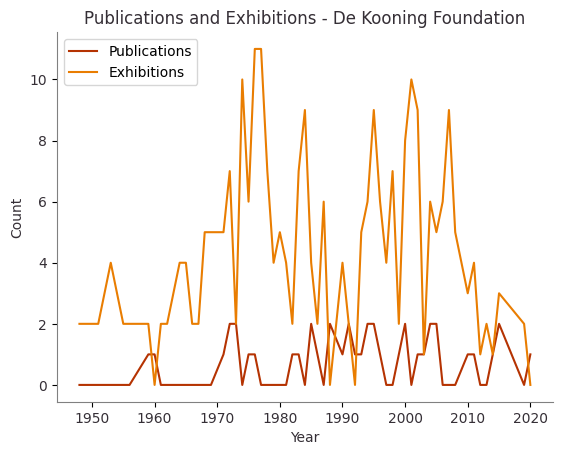

In [ ]:
# Plot line for count_df1
plt.plot(merged_df_no_cat['date'], merged_df_no_cat['count_df1'], label='Publications', color='#B53302')

# Plot line for count_df2
plt.plot(merged_df_no_cat['date'], merged_df_no_cat['count_df2'], label='Exhibitions', color='#E97D01')

# Add labels and title
plt.xlabel('Year', color='#352f36')
plt.ylabel('Count', color='#352f36')
plt.title('Publications and Exhibitions - De Kooning Foundation', color='#352f36')

# Add legend
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change color of ticks
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')

# Show plot
plt.show()


In [ ]:
# compare exhibition and pubblication 
import pandas as pd

# Ensure 'date' column in df_1 is integer
result_df['date'] = result_df['date'].astype(int)

# Ensure 'Year' column in df_2 is integer
year_counts_df['Year'] = year_counts_df['Year'].astype(int)

# Merge the dataframes with suffixes
merged_df = pd.merge(result_df, year_counts_df, how='outer', left_on='date', right_on='Year', suffixes=('_df1', '_df2'))

# Substitute values in 'date' column with values from 'Year' column
merged_df['date'] = merged_df['date'].fillna(merged_df['Year'])

# Convert the 'date' column back to integer type
merged_df['date'] = merged_df['date'].astype(int)

# Sort values based on date
merged_df.sort_values(by='date', inplace=True)

# Drop the 'Year' column as it's no longer needed
merged_df.drop(columns=['Year'], inplace=True)

merged_df.fillna(0, inplace=True)

merged_df.head()

,date,count_df1,count_df2
56,1948,0.00,2.00
57,1951,0.00,2.00
0,1953,1.00,4.00
1,1955,1.00,2.00
58,1956,0.00,2.00


# 5. Conclusion

## 5.1 Comparing number of exhibitions, number of publications and mean of prices per year

In [ ]:
# 1. df auction data

mean_price_per_year_dk_df.head()

,soldtime,mean
0,2008,7798806.04
1,2009,7603057.65
2,2010,9788578.82
3,2011,7128407.11
4,2012,10849152.44


In [ ]:
# 2. df n of publication and exhibitions

merged_df_no_cat.head()

,date,count_df1,count_df2
30,1948,0.00,2.00
31,1951,0.00,2.00
32,1953,0.00,4.00
33,1955,0.00,2.00
34,1956,0.00,2.00


In [ ]:
# 3. merge df

# Convert necessary columns to integers
mean_price_per_year_dk_df['soldtime'] = mean_price_per_year_dk_df['soldtime'].astype(int)
merged_df_no_cat['date'] = merged_df_no_cat['date'].astype(int)

# Perform the merge
merged_data = pd.merge(mean_price_per_year_dk_df, merged_df_no_cat, left_on='soldtime', right_on='date', how='left')
merged_data = merged_data.drop(columns=['date'])

# Fill NaN values with 0
merged_data = merged_data.fillna(0)

merged_data['count_df1_left'] = -merged_data['count_df1']
merged_data['count_df2_left'] = 0

merged_data


# soldtime	mean	count	count_df1	              count_df2	          count_df1_left	count_df2_left
# Age	                    Male, Male_Width       Female,Female_Width       Male_Left              Female_Left

,soldtime,mean,count_df1,count_df2,count_df1_left,count_df2_left
0,2008,7798806.04,0.00,5.00,-0.00,0
1,2009,7603057.65,0.00,0.00,-0.00,0
2,2010,9788578.82,1.00,3.00,-1.00,0
3,2011,7128407.11,1.00,4.00,-1.00,0
4,2012,10849152.44,0.00,1.00,-0.00,0
5,2013,15078419.76,0.00,2.00,-0.00,0
6,2014,21186242.25,1.00,1.00,-1.00,0


C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3984483335.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar_1 = plt.colorbar(sm_1)
C:\Users\danie\AppData\Local\Temp\ipykernel_18472\3984483335.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar_2 = plt.colorbar(sm_2)


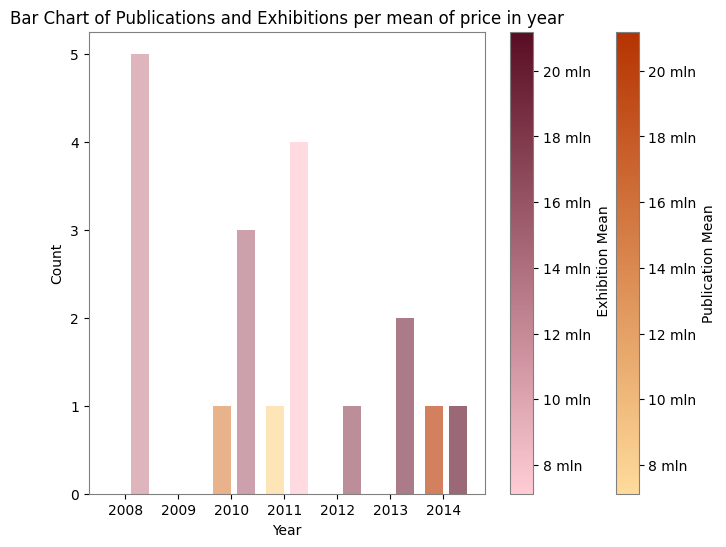

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame with the columns mentioned
# df = your_dataframe_here

# Create a custom colormap based on the 'mean' values
colors_1 = ['#FEDB9B', '#F4C385', '#E9AB6F', '#DF9359', '#D47B44', '#CA632E', '#BF4B18', '#B53302'] # Define colors for the gradient
cmap_1 = LinearSegmentedColormap.from_list('custom_cmap_1', colors_1)

colors_2 = ['#FFCCD5', '#E7B1BB', '#D095A2', '#B87A88', '#A05F6F', '#884455', '#71283C', '#590D22']
cmap_2 = LinearSegmentedColormap.from_list('custom_cmap_2', colors_2)

# Sort 'mean' values and associate each with a color
sorted_mean_values = sorted(merged_data["mean"])
color_map_1 = {}
for i in range(len(sorted_mean_values)):
    color_map_1[sorted_mean_values[i]] = colors_1[i]

color_map_2 = {}
for i in range(len(sorted_mean_values)):
    color_map_2[sorted_mean_values[i]] = colors_2[i]

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the width of the bars
bar_width = 0.35

# Iterate through each data point
for i, sold_time in enumerate(merged_data['soldtime']):
    # Get the mean value for the current sold time
    mean_value = merged_data.loc[i, 'mean']
    # Get the color from the color_map
    color_1 = color_map_1[mean_value]
    color_2 = color_map_2[mean_value]
    # Plot count_df1
    bar1 = plt.bar(sold_time, merged_data.loc[i, 'count_df1'], width=bar_width, alpha=0.7, label='count_df1', color=color_1)
    
    # Plot count_df2 next to count_df1 with an additional offset for space
    bar2 = plt.bar(sold_time + bar_width + 0.1, merged_data.loc[i, 'count_df2'], width=bar_width, alpha=0.7, label='count_df2', color=color_2)

# Create ScalarMappable objects for colormap
sm_1 = ScalarMappable(cmap=cmap_1)
sm_1.set_array(merged_data['mean'])  # Set the range of values for the colormap

sm_2 = ScalarMappable(cmap=cmap_2)
sm_2.set_array(merged_data['mean'])  # Set the range of values for the colormap

# Add colorbars
cbar_1 = plt.colorbar(sm_1)
cbar_1.set_label('Publication Mean')

cbar_2 = plt.colorbar(sm_2)
cbar_2.set_label(' Exhibition Mean')

# Define function to format tick labels
def format_millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f mln' % (x*1e-6)

# Set formatter for colorbar tick labels to display numbers in millions
cbar_1.ax.yaxis.set_major_formatter(FuncFormatter(format_millions))
cbar_2.ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Chart of Publications and Exhibitions per mean of price in year')

# Adjust x-axis ticks if necessary
plt.xticks(merged_data['soldtime'] + bar_width / 2, merged_data['soldtime'])

# Show plot
plt.show()


## 5.2 Conclusions

Our conclusions indicate that there is no correlation between publication, exhibition, and auctions based on our data analysis. Possible reasons for this could include:
- Insufficient data: The analysis may have been conducted with an inadequate amount of data. Both quantitative and qualitative data in larger quantities may be required to draw more accurate conclusions.
- Incorrect variables: It's possible that the variables chosen for analysis are not the most appropriate for measuring reputation in the art world. Reconsidering the selection of variables may be necessary.
- Lack of actual correlation: even if the chosen variables are correct, it's plausible that there simply isn't a significant correlation between publication, exhibition, and auction success in terms of an artist's reputation. This suggests that these aspects of an artist's career may operate independently of each other when it comes to determining reputation.

Other parameters that could have been taken into consideration are:
- Buyers and sellers in the auction records if they’re contained in the original dataset.
- The art historians that have talked about the artist and if they have influenced the other variables in some way
- Venues in which the artworks are present, in particular considering also the prestige of the venue. 
- Expand the research considering scientific articles and not only monographs or exhibition catalogues. 
